### Telecom churn prediction:
**Faseela K Karim**

## **Introduction**

Telecom customer churn prediction is the process of identifying customers who are likely to stop using a company's services. In the telecom sector, customer churn can be a significant problem, as it can lead to lost revenue and decreased customer satisfaction. By predicting which customers are likely to churn, companies can take proactive steps to retain those customers, such as offering discounts or improving customer service. Data cleaning is an important step in this process, as it helps to ensure that the data used to make these predictions is accurate and reliable.
 Data cleaning is an important step in the data analysis process, as it involves identifying and correcting errors and inconsistencies in the data. This is especially important in the case of customer churn prediction in the telecom sector, where accurate data can help companies understand the factors that contribute to customer churn and take steps to prevent it.

During data cleaning, it is important to fill null values with appropriate values based on the distribution of the column data. This may involve filling null values with the mode value or filling null values in the ratio of different categories in the column. In some cases, if a column has only two categories and one category has a very high percentage while the other category has a very small percentage, it may be appropriate to drop the column.

Additionally, it is important to do univariate analysis and EDA by checking column distribution using boxplot and histogram for continuous value columns, and countplot for categorical columns.







## Table of Contents
1. [Custom functions](#custom-functions)
2. [Distribution and Explanation of continous value columns with missing values](#filling-missing)
3. [Distribution and Explanation of other continous variables](#other-cont)
4. [Categorical columns](#category)
5. [Conclusion](#conclusion)
6. [References](#ref)



In [3]:
#import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
%matplotlib inline

In [70]:
# #connecting to ggogle drive
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# #uploading the dataset
# df=pd.read_csv('/content/drive/My Drive/capstone/Telecom_customer churn.csv')

In [4]:
#load data
df=pd.read_csv('data/Telecom_customer churn.csv')

In [5]:
#display all columns
pd.set_option('display.max_columns', None)
df.head()

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0   23.9975    219.25       22.500   0.2475         0.00          0.0   
1   57.4925    482.75       37.425   0.2475        22.75          9.1   
2   16.9900     10.25       16.990   0.0000         0.00          0.0   
3   38.0000      7.50       38.000   0.0000         0.00          0.0   
4   55.2300    570.50       71.980   0.0000         0.00          0.0   

   vceovr_Mean  datovr_Mean  roam_Mean  change_mou  change_rev  drop_vce_Mean  \
0          0.0          0.0        0.0     -157.25    -18.9975       0.666667   
1          9.1          0.0        0.0      532.25     50.9875       8.333333   
2          0.0          0.0        0.0       -4.25      0.0000       0.333333   
3          0.0          0.0        0.0       -1.50      0.0000       0.000000   
4          0.0          0.0        0.0       38.50      0.0000       9.666667   

   drop_dat_Mean  blck_vce_Mean  blck_dat_Mean  unan_vce_Mean  unan_dat_Mean  \
0            0.0       0.666667            0.0       6.333333            0.0   
1            0.0       1.000000            0.0      61.333333            0.0   
2            0.0       0.000000            0.0       2.666667            0.0   
3            0.0       0.000000            0.0       0.000000            0.0   
4            0.0       0.666667            0.0      77.000000            0.0   

   plcd_vce_Mean  plcd_dat_Mean  recv_vce_Mean  recv_sms_Mean  comp_vce_Mean  \
0      52.333333            0.0      42.333333            0.0      45.000000   
1     263.333333            0.0      69.000000            0.0     193.333333   
2       9.000000            0.0       0.333333            0.0       6.000000   
3       3.666667            0.0       1.333333            0.0       3.666667   
4     222.333333            0.0      94.666667            0.0     137.000000   

   comp_dat_Mean  custcare_Mean  ccrndmou_Mean  cc_mou_Mean  inonemin_Mean  \
0            0.0       0.000000       0.000000     0.000000      18.000000   
1            0.0       1.666667       6.333333     5.463333      53.000000   
2            0.0       0.000000       0.000000     0.000000       0.333333   
3            0.0       0.000000       0.000000     0.000000       1.333333   
4            0.0       8.666667      15.000000    11.076667      66.000000   

   threeway_Mean  mou_cvce_Mean  mou_cdat_Mean  mou_rvce_Mean  \
0       0.000000      90.643333            0.0      97.176667   
1       0.333333     189.396667            0.0      55.280000   
2       0.000000       5.426667            0.0       0.000000   
3       0.000000       8.410000            0.0       0.413333   
4       0.000000     285.233333            0.0     106.330000   

   owylis_vce_Mean  mouowylisv_Mean  iwylis_vce_Mean  mouiwylisv_Mean  \
0         0.000000         0.000000         0.000000         0.000000   
1        46.333333        24.216667         6.333333         3.696667   
2         0.000000         0.000000         0.000000         0.000000   
3         0.333333         0.256667         0.000000         0.000000   
4        14.666667        10.816667         0.666667         0.366667   

   peak_vce_Mean  peak_dat_Mean  mou_peav_Mean  mou_pead_Mean  opk_vce_Mean  \
0      58.000000            0.0     132.600000            0.0     24.000000   
1      83.666667            0.0      75.333333            0.0    157.000000   
2       5.000000            0.0       5.193333            0.0      1.000000   
3       1.333333            0.0       3.380000            0.0      3.666667   
4      97.333333            0.0     173.476667            0.0     90.333333   

   opk_dat_Mean  mou_opkv_Mean  mou_opkd_Mean  drop_blk_Mean  attempt_Mean  \
0           0.0      55.220000            0.0       1.333333     52.333333   
1           0.0     169.343333            0.0       9.333333    263.333333   
2           0.0       0.233333            0.0       0.333333      9.000000   
3           0.0       5.45000

In [72]:
#shape of data frame
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.')

There are 100000 rows and 100 columns in the dataset.


Let's visualize some of the data to get an idea of what we are working with.

In [73]:
#info of dataframe,like number of null values, datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

There are 100 columns in the dataset, `churn` is the target column in the dataset.

In [74]:
# Checking for nulls
df.isnull().sum().any()

True

Null values are present, so we need to take appropriate steps to deal with the null values

Check for the duplicate rows and columns

In [75]:
# Checking for duplicates
# Columns 
print(f'Duplicated columns: {df.T.duplicated().any()}')
# Rows 
print(f'Duplicated rows: {df.duplicated().any()}')

Duplicated columns: False
Duplicated rows: False


In [76]:
# Summary statistics 
df.describe().T

count          mean           std           min         25%  \
rev_Mean      99643.0  5.871998e+01     46.291677 -6.167500e+00       33.26   
mou_Mean      99643.0  5.135599e+02    525.168140  0.000000e+00      150.75   
totmrc_Mean   99643.0  4.617914e+01     23.623489 -2.691500e+01       30.00   
da_Mean       99643.0  8.888279e-01      2.177619  0.000000e+00        0.00   
ovrmou_Mean   99643.0  4.107225e+01     97.296150  0.000000e+00        0.00   
...               ...           ...           ...           ...         ...   
income        74564.0  5.783112e+00      2.182132  1.000000e+00        4.00   
numbcars      50634.0  1.567563e+00      0.625456  1.000000e+00        1.00   
forgntvl      98268.0  5.797411e-02      0.233696  0.000000e+00        0.00   
eqpdays       99999.0  3.919323e+02    256.482193 -5.000000e+00      212.00   
Customer_ID  100000.0  1.050000e+06  28867.657797  1.000001e+06  1025000.75   

                      50%         75%           max  
rev_Mean     4.819500e+01       70.75  3.843262e+03  
mou_Mean     3.555000e+02      703.00  1.220675e+04  
totmrc_Mean  4.499000e+01       59.99  4.099900e+02  
da_Mean      2.475000e-01        0.99  1.593900e+02  
ovrmou_Mean  2.750000e+00       42.00  4.320750e+03  
...                   ...         ...           ...  
income       6.000000e+00        7.00  9.000000e+00  
numbcars     1.000000e+00        2.00  3.000000e+00  
forgntvl     0.000000e+00        0.00  1.000000e+00  
eqpdays      3.420000e+02      530.00  1.823000e+03  
Customer_ID  1.050000e+06  1075000.25  1.100000e+06  

[79 rows x 8 columns]

check the target column 'churn' to know the distribution of data.

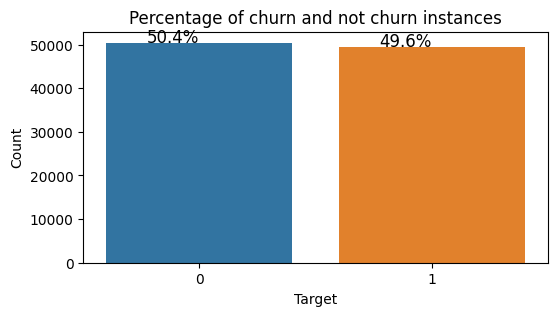

In [77]:
#count plot of churn
plt.figure(figsize=(6, 3))
ax=sns.countplot(x='churn', data=df, order=df['churn'].value_counts().index)
total = len(df['churn'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 2
  y = p.get_height()
  ax.annotate(percentage, (x, y), ha='right', va='baseline', fontsize=12)

    # Set plot labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Percentage of churn and not churn instances')
plt.show()



We can see churn and not churn are nearly equal in number.Not churn instance is 50.4% and churn instance is 49.6%.

In [78]:
#save the data frame to a new variable.
df_new=df

Some functions are defined below ,which we will use for plotting histogram,boxplot, countplot of the columns as well as to fill the missing values in the columns.
`chck_miss_value_cont_col` , `plot_cont_col_IQR`, `chck_miss_value_category_col`,`plot_cont_category_col`,`filling_missing_value_based_ratio_cat`. The description of each function is available in the functuon doc string.

**Custom functions**<a name="custom-functions"></a>

**1)chck_miss_value_cont_col**

In [79]:
def chck_miss_value_cont_col(col_name):
    """
    This function calculates and prints the total number of missing values and
    the percentage of missing values in the specified column with continuous values.

    Parameters:
    col_name (str): The name of the column in the DataFrame for which to check missing values.

    Returns:
    None: The function prints the missing values count and percentage but does not return any value.
    """
    # Find number of missing values in the column
    missing_values = df[col_name].isna().sum()
    print(f"Number of missing values in {col_name} column: {missing_values}")
    print(f"Percentage  of missing values in {col_name} column: {missing_values * 100 / 100000}")


**2)plot_cont_col_IQR**

This function helps to plot a histogram within the Interquartile Range (IQR) range, which provides a better understanding of the data distribution. This is especially useful when there are many outliers in the column, as identified by the boxplot.

In [80]:
def plot_cont_col_IQR(col_name, nbins):
    """
    This function creates a boxplot and a histogram with the interquartile range (IQR) for a specified continuous column.
    The histogram displays the mean, median, and mode with vertical lines.

    Parameters:
    col_name (str): The name of the column in the DataFrame for which to create the plots.
    nbins (int): The number of bins for the histogram.

    Returns:
    None: The function displays the plots but does not return any value.
    """
    column = col_name  # Replace with the desired column name
    x = df[column].dropna()
    plt.subplots(1, 2, figsize=(15, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col_name])
    # Set the titles and labels
    plt.title(f'Boxplot of {col_name}')

    # Calculate quartiles and bounds
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create histogram
    plt.subplot(1, 2, 2)
    plt.xlim(lower_bound, upper_bound)
    plt.hist(x, bins=nbins, range=(lower_bound, upper_bound))

    # Set titles and labels
    plt.title(f'Histogram of {col_name} ')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Add median and mean lines
    plt.axvline(x.mean(), c='red', label='Mean')
    plt.axvline(x.mode().values[0], c='orange', label='Mode')
    plt.axvline(x.median(), c='yellow', label='Median')

    plt.legend()
    plt.tight_layout()
    plt.show()


**3)chck_miss_value_category_col**

In [81]:
def chck_miss_value_category_col(col_name):
    """
    This function checks for missing values and provides information about unique values and their counts and percentages in a categorical column.

    Parameters:
    col_name (str): The name of the categorical column in the DataFrame to be analyzed.

    Returns:
    None: The function prints the information but does not return any value.
    """
    # Check unique values of the column
    val = df[col_name].unique()
    print(f"unique values in column {col_name} : {val}")

    # Find the number of missing values in the column
    missing_values = df[col_name].isna().sum()
    print(f"Number of missing values in {col_name}: {missing_values}")
    print(f"percentage of missing values in {col_name}: {missing_values * 100 / 100000}")

    # Display the count and percentage of each category in the column
    print(f'count of each category in the column {col_name} :{df[col_name].value_counts()}')
    print(f'percentage of each category in the column {col_name} :{df[col_name].value_counts() * 100 / 100000}')



**4)plot_cont_category_col**

In [82]:
def plot_cont_category_col(col_name, fig_w, fig_h, list_of_categories):
    """
    This function creates a count plot for a given categorical column, displaying the percentage of each category and coloring by churn.

    Parameters:
    col_name (str): The name of the categorical column in the DataFrame to be plotted.
    fig_w (int): The width of the figure in inches.
    fig_h (int): The height of the figure in inches.
    list_of_categories (list): A list of strings containing the custom x-axis labels to be displayed.

    Returns:
    None: The function plots the count plot but does not return any value.
    """
    # Create countplot
    plt.figure(figsize=(fig_w, fig_h))
    ax = sns.countplot(x=col_name, data=df, order=df[col_name].value_counts().index, hue='churn')

    # Get existing x-axis labels
    existing_labels = [tick.get_text() for tick in ax.get_xticklabels()]

    # Concatenate existing labels with list_of_categories
    concatenated_labels = [f"{existing} ({custom})" for existing, custom in zip(existing_labels, list_of_categories)]

    # Replace x-axis labels with concatenated_labels
    ax.set_xticklabels(concatenated_labels)

    # Calculate percentages
    total = len(df[col_name])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='right', va='baseline', fontsize=12)

    # Set plot labels and title
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title(f'Percentage of Each Category in {col_name} column')
    plt.show()


**5)filling_missing_value_based_ratio_cat**

In [83]:

def filling_missing_value_based_ratio_cat(col_name):
    """
    This function fills the missing values in a given categorical column based on the ratio of each category present in the column.

    Parameters:
    col_name (str): The name of the categorical column in the DataFrame to fill missing values.

    Returns:
    None: The function fills the missing values in the DataFrame but does not return any value.
    """
    # Step 1: Calculate the number of missing values
    missing_values_count = df[col_name].isnull().sum()

    # Step 2: Extract unique categories from the column and calculate their probabilities
    unique_categories = df[col_name].dropna().unique()
    category_counts = df[col_name].value_counts()
    total_counts = category_counts.sum()
    probabilities = category_counts / total_counts

    # Step 3: Generate values based on the unique categories and their probabilities
    fill_values = np.random.choice(unique_categories, size=missing_values_count, p=probabilities)

    # Step 4: Fill the missing values in the DataFrame with the generated values
    df.loc[df[col_name].isnull(), col_name] = fill_values



## **Distribution and Explanation of continous value columns with missing values**: <a name="filling-missing"></a>


1) **rev_Mean**

The `rev_Mean` column typically represents the average monthly revenue generated from a customer. This can include subscription fees, usage charges, overage fees, or any other form of revenue that the company earns from the customer. Monitoring revenue patterns can help identify customers who may be at risk of churning, as declining or erratic revenue can indicate dissatisfaction with the service or a possible switch to a competing provider.

In [84]:
#check the missing values in the column
chck_miss_value_cont_col('rev_Mean')

Number of missing values in rev_Mean column: 357
Percentage  of missing values in rev_Mean column: 0.357


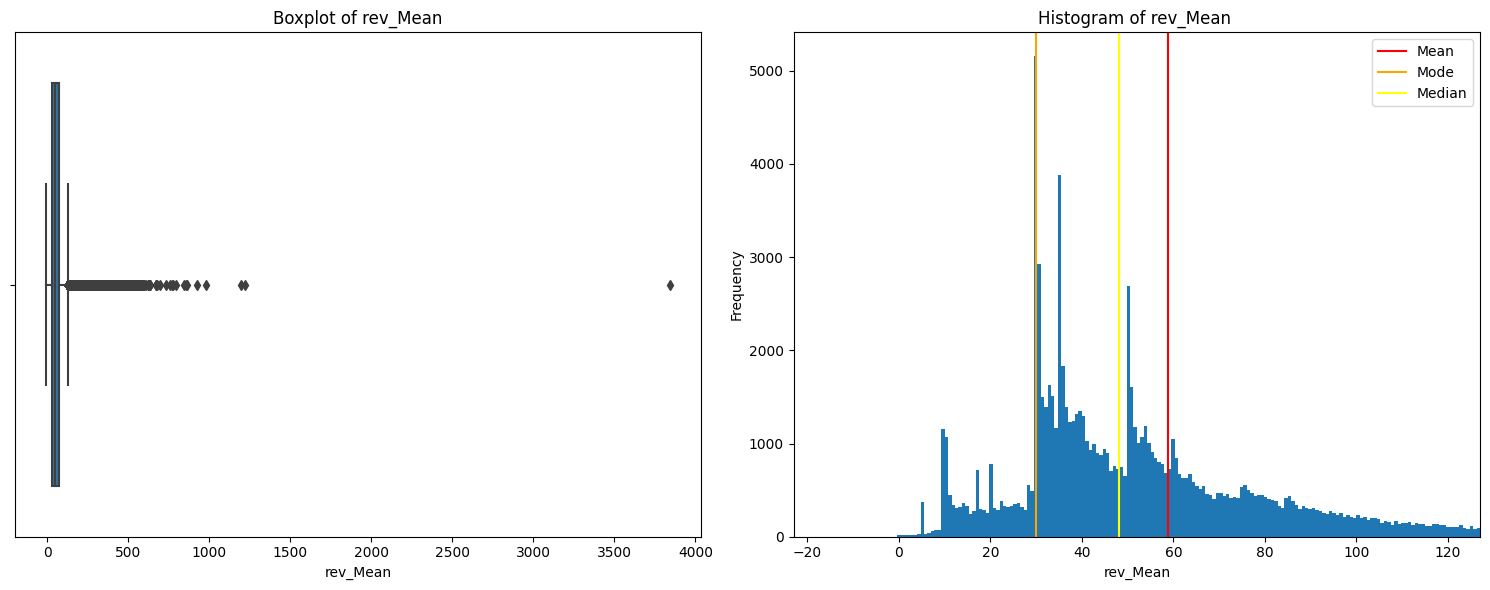

In [85]:
#boxplot and histogram of the column , plotted using the function 'plot_cont_col_IQR' which is defined in the beginning
plot_cont_col_IQR('rev_Mean',200)

The box plot reveals numerous outliers in the data. To gain a better understanding of the distribution without being influenced by these outliers, the histogram is plotted within the interquartile range (IQR).

Since the histogram has a multimodal distribution with three peaks, it's essential to choose a method that best preserves the original data pattern. Two possible methods to fill the data is given below.

- Mean Imputation: we can fill the null values with the mean. However, this might not be the best choice since the distribution is not symmetric and from the boxplot we can see that the data has ouliers.

- Median Imputation: Using the median  to fill the null values is a more robust approach, as it is less sensitive to outliers or skewed data. This method can better preserve the overall distribution shape.

So here we can use `median imputation`.

In [86]:
#fill the null value with median
df['rev_Mean'] = df['rev_Mean'].fillna(df['rev_Mean'].median())

**2**)**mou_Mean**

The mou_Mean column typically represents the average monthly minutes of use for a customer. It is an important feature to consider when analyzing customer behavior and predicting churn, as significant changes in the usage patterns may indicate that a customer is considering switching to another service provider or discontinuing the service.

In [87]:
#checking the missing values in the column
chck_miss_value_cont_col('mou_Mean')

Number of missing values in mou_Mean column: 357
Percentage  of missing values in mou_Mean column: 0.357


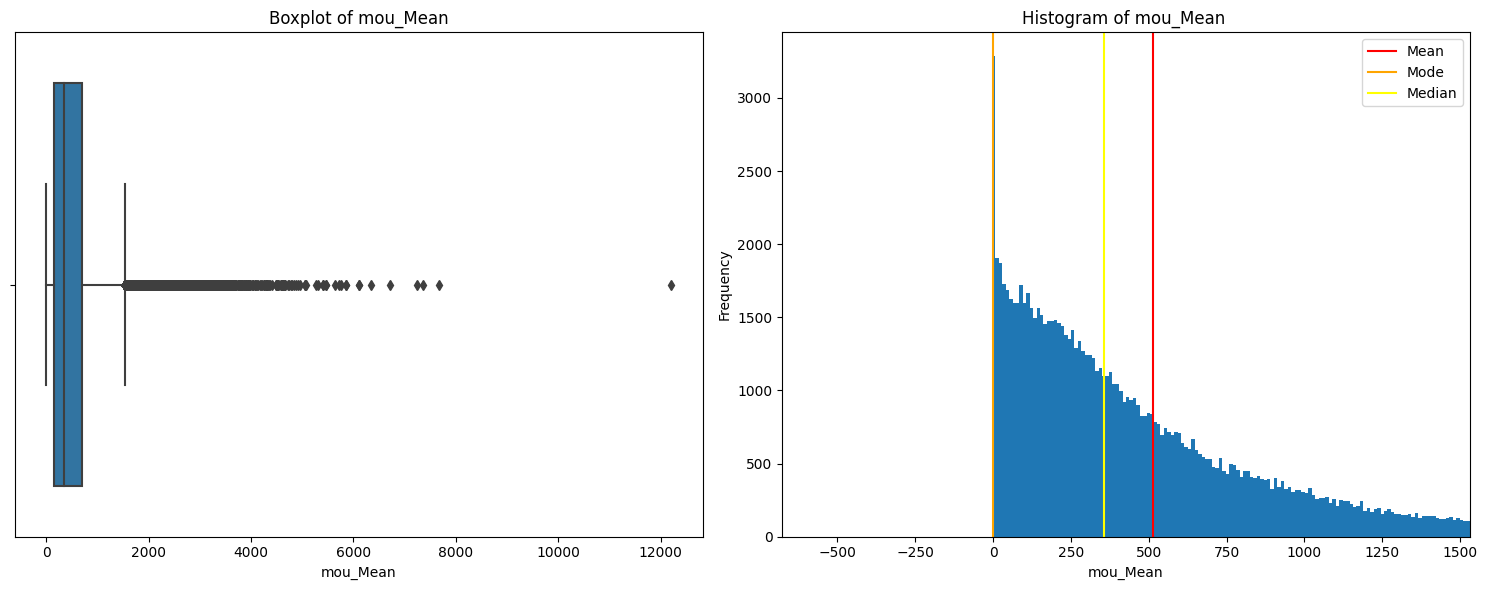

In [88]:
#plot histogram and boxplot
plot_cont_col_IQR('mou_Mean',200)

In this case, we can consider using the median to fill the missing values. The median is less sensitive to outliers and extreme values compared to the mean, making it a better choice for skewed distributions.Also box plot shows ouliers in data.

In [89]:
#filling the missing values
df['mou_Mean'] = df['mou_Mean'].fillna(df['mou_Mean'].median())

**3**)**totmrc_Mean** 

The totmrc_Mean column represents the mean total monthly recurring charge for a customer. This is the average monthly fee that a customer pays for the service, excluding any additional fees like overage charges, taxes, or one-time payments. This column can be important in churn prediction, as customers with higher monthly recurring charges might be more likely to cancel their service if they find a better deal or become unsatisfied with the service they receive.

In [90]:
#check the missing values
chck_miss_value_cont_col('totmrc_Mean')

Number of missing values in totmrc_Mean column: 357
Percentage  of missing values in totmrc_Mean column: 0.357


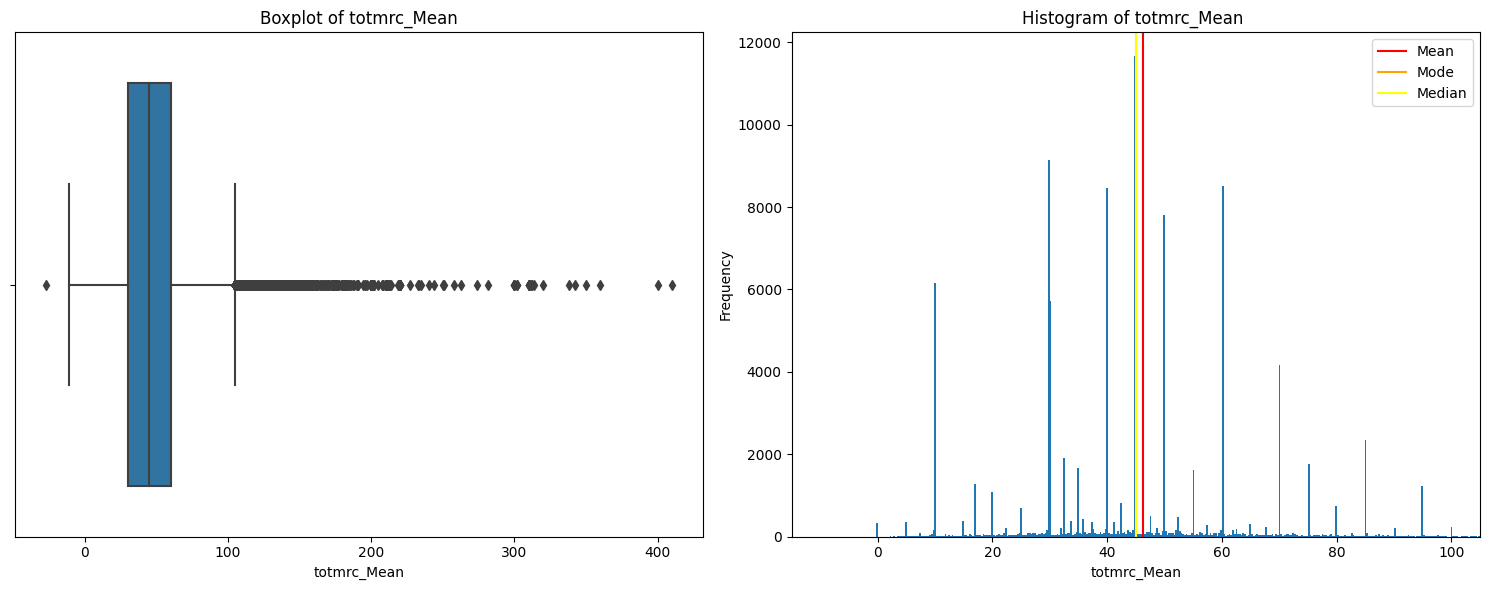

In [91]:
#plot histogram and boxplot
plot_cont_col_IQR('totmrc_Mean',400)

the distribution of the totmrc_Mean column has a bell curve shape with a lot of discrete points, we can use the mean or median to fill in the missing values. Both the mean and median are similar in value, so either one should work well as a representative measure of central tendency for the dataset.Here we can replace the null value with  median considering the outliers in the boxplot.

In [92]:
#fill the null values with median
df['totmrc_Mean'] = df['totmrc_Mean'].fillna(df['totmrc_Mean'].median())

**4)da_Mean Analysis**

The da_Mean column in the dataset represents the average data usage by a customer over a specific period, such as a month or billing cycle. This could include the amount of data consumed for various activities like browsing, streaming, or downloading. Analyzing data usage patterns can provide insights into customer behavior and help identify potential churn risks or opportunities for upselling data plans.

In [93]:
#check for the missing values
chck_miss_value_cont_col('da_Mean')


Number of missing values in da_Mean column: 357
Percentage  of missing values in da_Mean column: 0.357


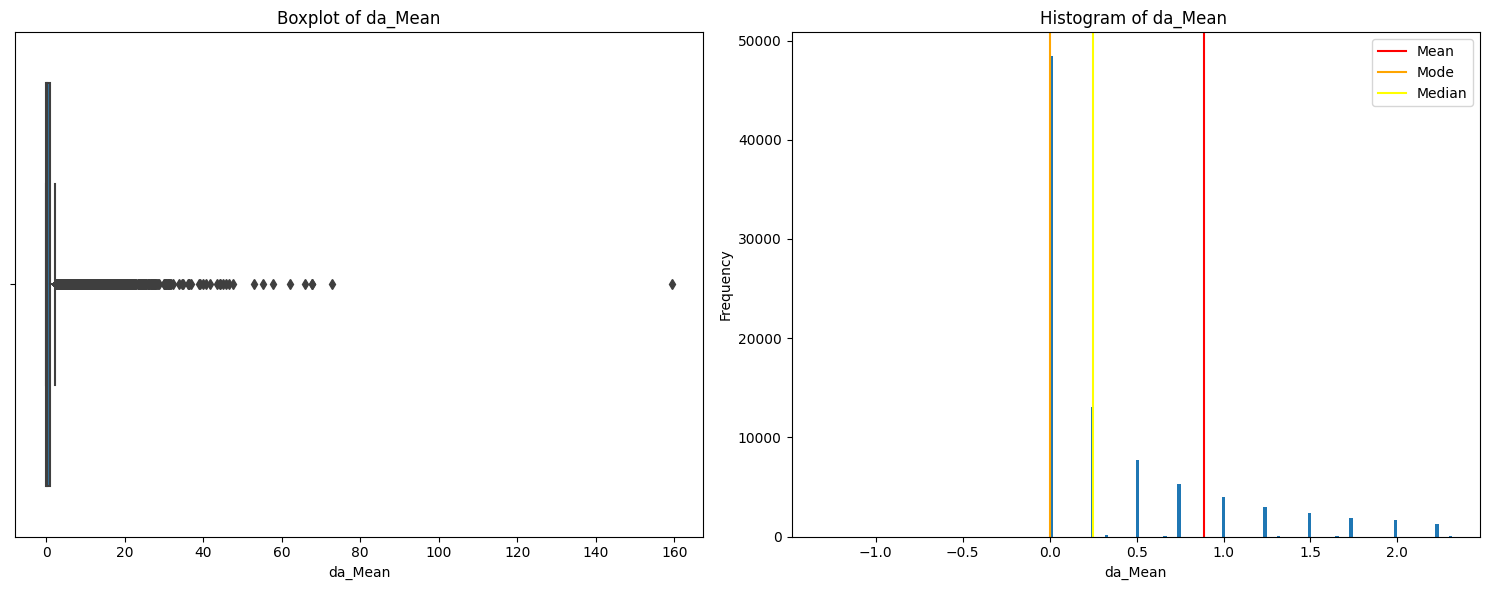

In [94]:
#plot histogram and boxplot
plot_cont_col_IQR('da_Mean',200)

The graph shows discrete peaks at certain values. It is because the value represent the average data usage and it will not be a wide range of number but rather it will be discrete figures.
This peaks  could indicate that customers' data usage patterns tend to cluster around specific levels. Some possible reasons for these discrete peaks are:

- Data plan limits: Customers with similar data plans might have usage patterns that align with their plan's limits, causing data usage to cluster around specific values.

- Usage habits: Certain activities, such as streaming a video, might consume a specific amount of data. Customers who frequently engage in these activities may exhibit similar data usage patterns, leading to peaks in the histogram.

- Billing cycles:da_Mean column represents the average data usage per billing cycle, the peaks could be associated with the billing cycle's duration, as customers may adjust their usage to avoid overage charges.

- Device capabilities: Customers with similar devices may have similar data usage patterns due to device capabilities, such as supported data speeds, causing data usage to cluster around specific values.

- Promotions or bundled services: If a telecom provider offers promotions or bundled services with specific data allowances, customers might adjust their usage to take advantage of these offerings, resulting in peaks at certain data usage levels.








The median is less sensitive to outliers and extreme values compared to the mean, and it would be a more robust measure to fill the missing values here also.

In [95]:
#fill the missing value with median
df['da_Mean'] = df['da_Mean'].fillna(df['da_Mean'].median())

**5)ovrmou_Mean Analysis**

The ovrmou_Mean column represents the average number of overage minutes used by a customer.overage minutes are the minutes used beyond the allotted minutes in a customer's plan. This value helps to understand customers' usage patterns and could potentially indicate dissatisfaction with their current plan or the potential to switch to a different plan or service provider.

In [96]:
#check the missing values in the column
chck_miss_value_cont_col('ovrmou_Mean')

Number of missing values in ovrmou_Mean column: 357
Percentage  of missing values in ovrmou_Mean column: 0.357


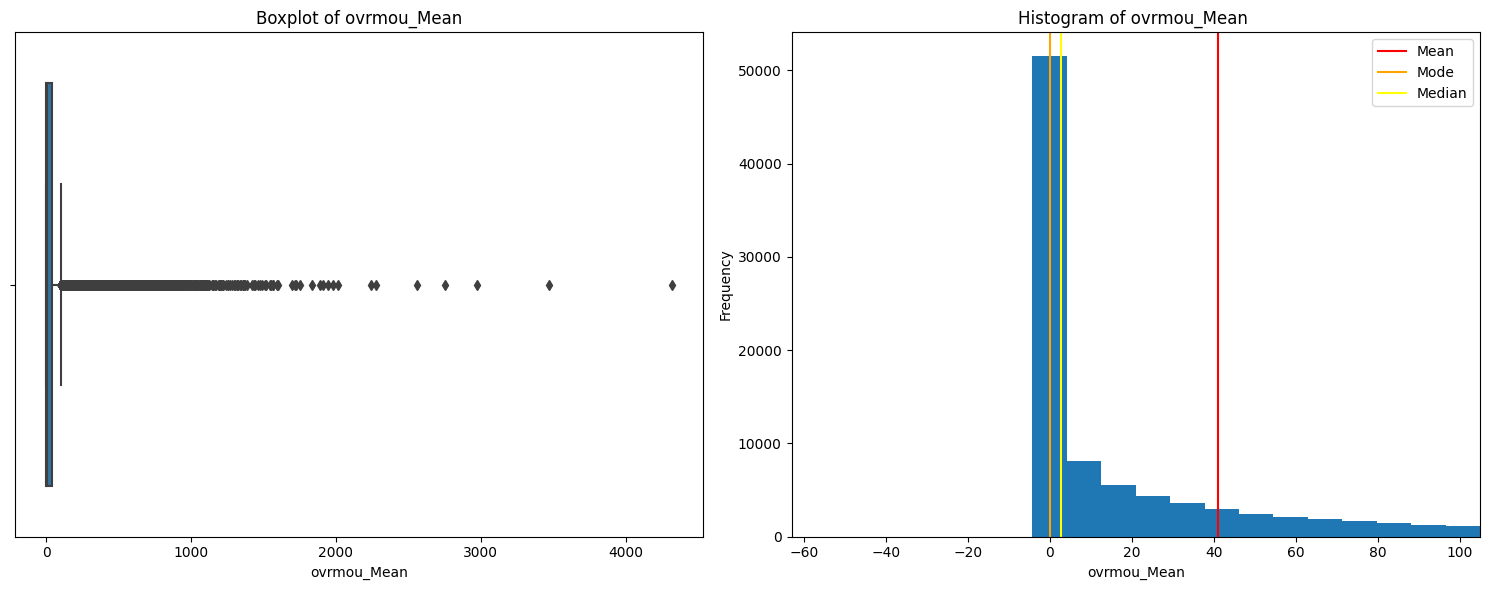

In [97]:
#plot histogram and box plot
plot_cont_col_IQR('ovrmou_Mean',20)

In [98]:
#fill the missing values with median
df['ovrmou_Mean'] = df['ovrmou_Mean'].fillna(df['ovrmou_Mean'].median())

**6)ovrrev_Mean Analysis**

The ovrrev_Mean column represents the average overage revenue generated per customer.overage revenue is the additional income earned by the telecom company from customers who have used services beyond their allotted plan limits. This can include overage minutes, data, or text messages. The ovrrev_Mean column helps to understand the revenue generated from overage usage and can be an indicator of customer satisfaction or dissatisfaction with their current plan, which may affect their likelihood of churning.

In [99]:
#check for the missing values
chck_miss_value_cont_col('ovrrev_Mean')

Number of missing values in ovrrev_Mean column: 357
Percentage  of missing values in ovrrev_Mean column: 0.357


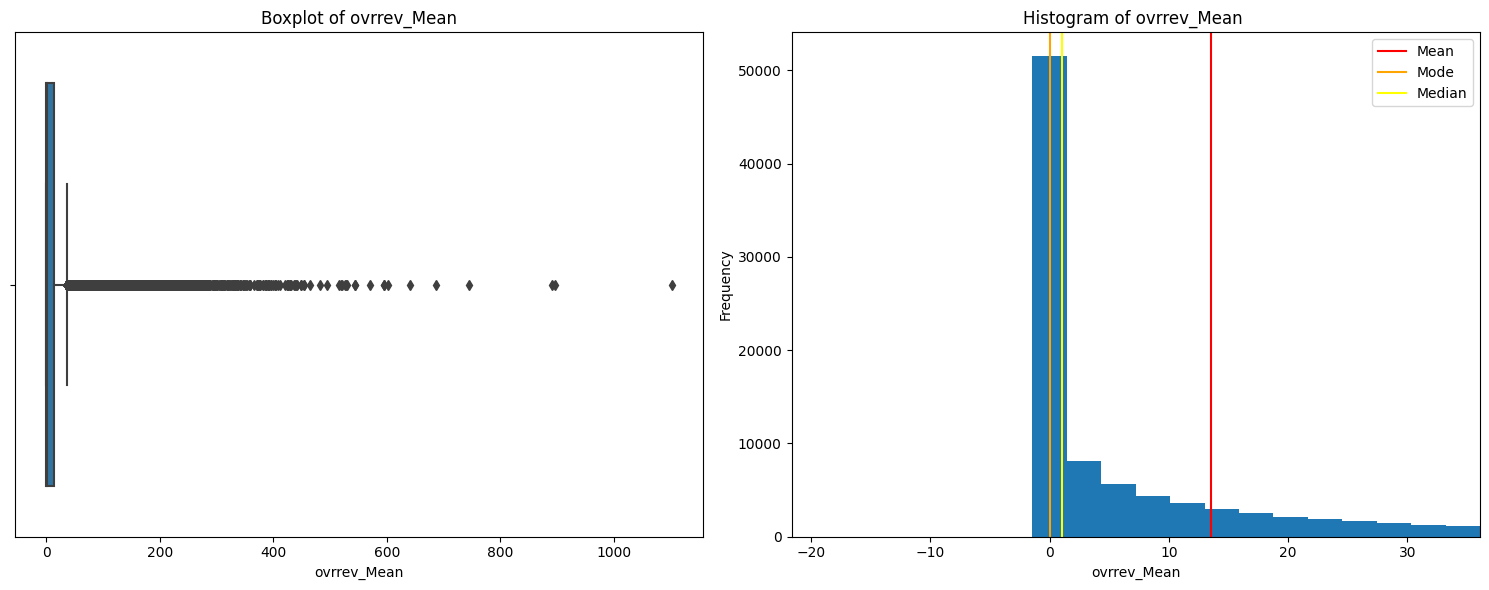

In [100]:
#plot histogram and boxplot
plot_cont_col_IQR('ovrrev_Mean',20)

In [101]:
#fill the missing value with median
df['ovrrev_Mean'] = df['ovrrev_Mean'].fillna(df['ovrrev_Mean'].median())

**7)vceovr_Mean**

Column represents the mean number of overage minutes of voice usage per month. Overage minutes refer to the minutes used beyond the customer's allotted monthly plan. This column can provide insights into customer behavior, such as how often they exceed their monthly plan and how much they are willing to pay for additional usage.

In [102]:
#check for the missing values
chck_miss_value_cont_col('vceovr_Mean')

Number of missing values in vceovr_Mean column: 357
Percentage  of missing values in vceovr_Mean column: 0.357


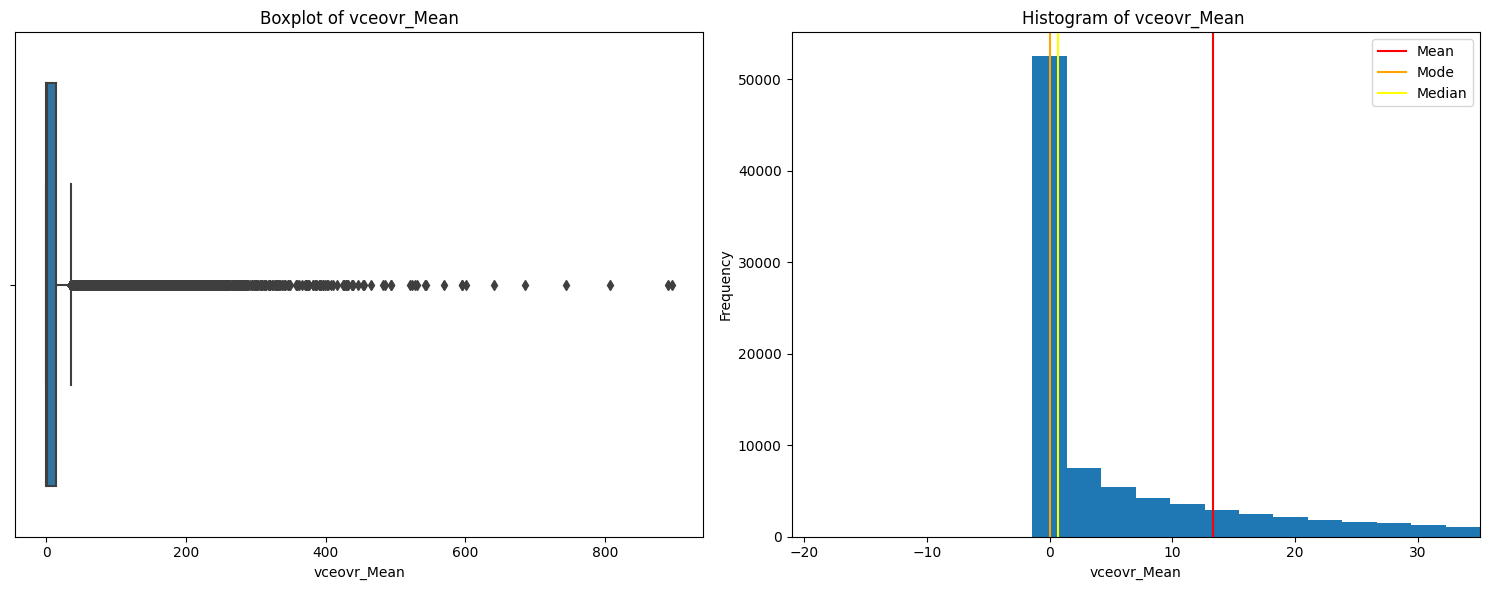

In [103]:
#plot histogram and boxplot
plot_cont_col_IQR('vceovr_Mean',20)

In [104]:
#fill the missing values with median
df['vceovr_Mean'] = df['vceovr_Mean'].fillna(df['vceovr_Mean'].median())

**8)datovr_Mean** 

The datovr_Mean column represents mean revenue of data overage.Data overage occurs when customers use more data than what is included in their monthly plan, resulting in additional charges. This column helps to understand the extent to which customers are exceeding their data limits on average. High data overage revenue may indicate customer dissatisfaction with their current plan or a need for additional data, which could affect their likelihood of churning.

In [105]:
#check the missing values in the column
chck_miss_value_cont_col('datovr_Mean')

Number of missing values in datovr_Mean column: 357
Percentage  of missing values in datovr_Mean column: 0.357


<ipython-input-80-12815616501d>:30: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_bound, upper_bound)


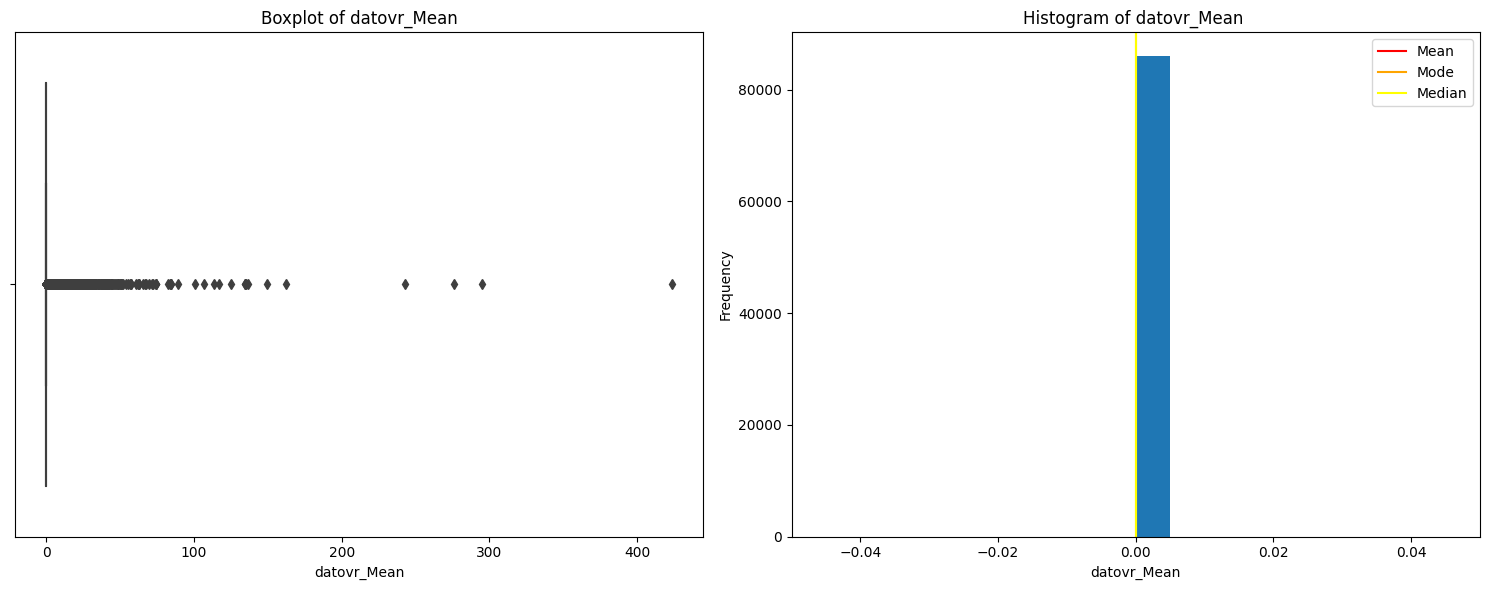

In [106]:
#plot histogram and boxplot
plot_cont_col_IQR('datovr_Mean',200)

In [107]:
#count number of distinct values in the column
df['datovr_Mean'].value_counts()

0.0000     85970
0.0975      3976
0.1950      1535
0.2925      1131
0.3900       738
           ...  
57.7200        1
11.6375        1
39.9750        1
3.1000         1
29.2500        1
Name: datovr_Mean, Length: 774, dtype: int64

When looking at the analysis above we can see that the majority of the values are (~86000) zero.Some data is missing.The histogram shows no spread, which indicates the presence of no information in the data. Also the box-plot shows presence of extreme outliers, which casuses extra noise in the information. So it can be concluded that this column adds more noise than any information, hence can be dropped, or to get more clarity about the column we can fill with median for now,and later based on correlation and logistic regression we can decide whether this column adds any information. 

In [108]:
#fill the missing values with median
df['datovr_Mean'] = df['datovr_Mean'].fillna(df['datovr_Mean'].median())
# #drop the collumn
# df.drop('datovr_Mean',axis=1,inplace=True)

The fact that 85,970 out of 100,000 values in the datovr_Mean column are 0 means that a large majority of customers do not have any data overage charges on average. This could indicate that most customers are staying within their data limits or have unlimited data plans.



**9)roam_Mean** 

The column roam_Mean represents the average number of minutes per month that a customer uses their phone while roaming outside their local calling area. Roaming refers to the use of a mobile network outside the coverage area of the home network. The column indicates the average usage of roaming services by a customer, which could be an important factor in predicting customer churn as it may affect the customer's overall satisfaction with their service.

In [109]:
#check for the missing value
chck_miss_value_cont_col('roam_Mean')

Number of missing values in roam_Mean column: 357
Percentage  of missing values in roam_Mean column: 0.357


In [110]:
#check number of occurrence of different values.
df['roam_Mean'].value_counts()

0.0000     68650
0.0975      2601
0.1950      1447
0.1600      1116
0.2925       810
           ...  
22.1675        1
22.8900        1
19.1275        1
41.3575        1
55.5625        1
Name: roam_Mean, Length: 5337, dtype: int64

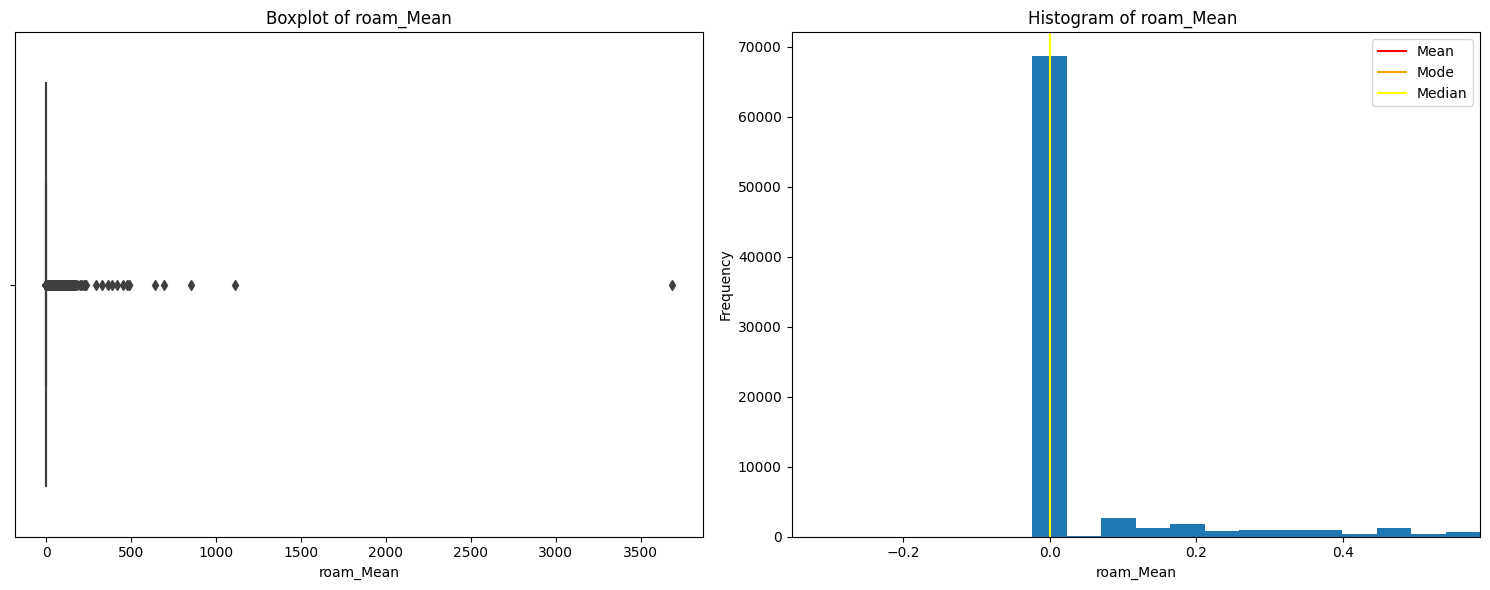

In [111]:
#plot the histogram and boxplot
plot_cont_col_IQR('roam_Mean',20)

The value_counts() function is used to count the number of occurrences of each unique value in a given column. In this case, the roam_Mean column has 68650 values of 0.0000 and a small number of non-zero values ranging from 0.0975 to 55.5625.

The large number of zero values suggests that most customers do not use roaming services. The small number of non-zero values indicates that some customers do use roaming services, but the majority do not. This information may be useful for telecom companies to understand the demand for roaming services and how to target customers who are more likely to use them.

The fact that the majority of values in the roam_Mean column are zero (68650 out of 100000) suggests that most customers do not make roaming calls or have roaming data usage. The small number of non-zero values indicates that some customers do use roaming services, with a range of roaming usage patterns. The maximum value of 55.5625 and its count is 1, suggests that there may be some customers who make very frequent or long-duration roaming calls or have high roaming data usage.In this dataset only one customer making long duration roaming call.

In the dataset we can fill the missing value with the median.

In [112]:
#fill the missing data with median
df['roam_Mean'] = df['roam_Mean'].fillna(df['roam_Mean'].median())

**10)change_mou** 

The change_mou column represents the change in the monthly minutes of usage for voice calls for the customer. It is calculated by subtracting the average monthly minutes of usage from the previous month from the average monthly minutes of usage for the current month. This column provides information on the changes in the customer's usage behavior, which can be useful in predicting customer churn. A negative value in this column indicates a decrease in usage, while a positive value indicates an increase in usage.

In [113]:
#check for the missing value
chck_miss_value_cont_col('change_mou')

Number of missing values in change_mou column: 891
Percentage  of missing values in change_mou column: 0.891


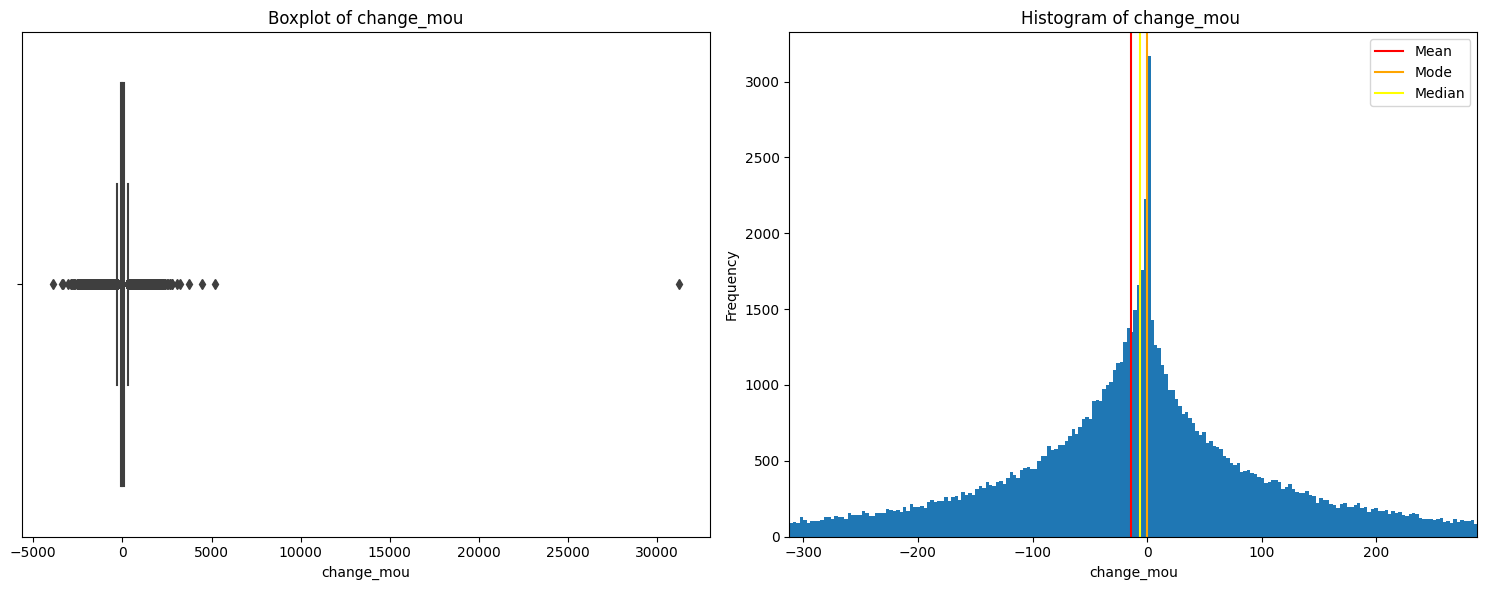

In [114]:
#plot the histogram and boxplot
plot_cont_col_IQR('change_mou',200)

If the distribution of change_mou column is normal with a center point of zero, and the mean, median are negative values close to zero, it indicates that the overall trend in the usage of minutes of voice calls has decreased slightly. This means that customers are making slightly fewer voice calls than before. However, the fact that the mode is zero suggests that a large number of customers did not change their voice call usage at all. 

Here also we can fill the null values with meadian to reduce the effect of outliers.

In [115]:
#fill the missing data with median
df['change_mou'] = df['change_mou'].fillna(df['change_mou'].median())

11)**change_rev** 

The change_rev column represents the difference in revenue between the current month and the previous month for each customer. 

In [116]:
#check the missing values
chck_miss_value_cont_col('change_rev')

Number of missing values in change_rev column: 891
Percentage  of missing values in change_rev column: 0.891


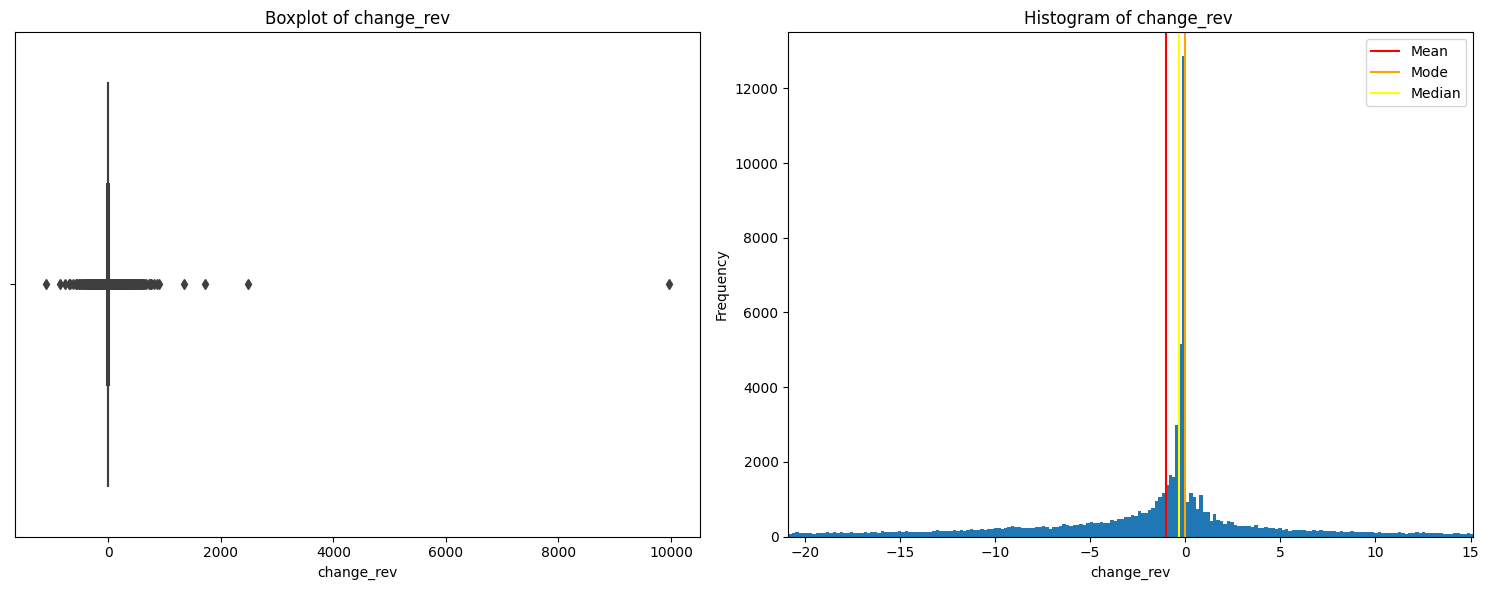

In [117]:
#plot the histogram and boxplot
plot_cont_col_IQR('change_rev',200)

In [118]:
df['change_rev'].value_counts()

 0.000000     10771
-0.247500      1548
-0.270000      1192
-0.495000       718
 0.742500       530
              ...  
-67.645000        1
-14.910000        1
-19.435000        1
-59.222500        1
-1.993333         1
Name: change_rev, Length: 32537, dtype: int64

Based on the output, it appears that the majority of values in the column are zero, with a small number of negative values ranging from -67.645000 to -0.247500. The distribution of the column is normal, with a high peak at the center point of zero. The mode and median are also equal to zero.

This suggests that most customers did not experience a significant change in monthly revenue. However, there are some customers who experienced a decrease in monthly revenue, which could be a contributing factor to customer churn.

In [119]:
#fill the missing data with median
df['change_rev'] = df['change_rev'].fillna(df['change_rev'].median())

**12)avg6mou**

The 'avg6mou' column represents the average number of voice call minutes used per month over the last six months. This column provides an indication of the customer's calling behavior over the recent past, allowing companies to identify trends and patterns that may be contributing to customer churn.

By analyzing the 'avg6mou' column, companies can identify customers who have significantly decreased their voice call usage over the last six months, which could be an early indicator of potential churn. Similarly, if a customer's 'avg6mou' has significantly increased, this may indicate that they are becoming more engaged with the company's services and less likely to churn.

Furthermore, companies can use the 'avg6mou' column to identify customers who are high-value users, as they tend to have a consistently high average usage over the last six months. By focusing on retaining these high-value customers, companies can maximize their revenue and reduce customer churn.


In [120]:
#check the missing value
chck_miss_value_cont_col('avg6mou')

Number of missing values in avg6mou column: 2839
Percentage  of missing values in avg6mou column: 2.839


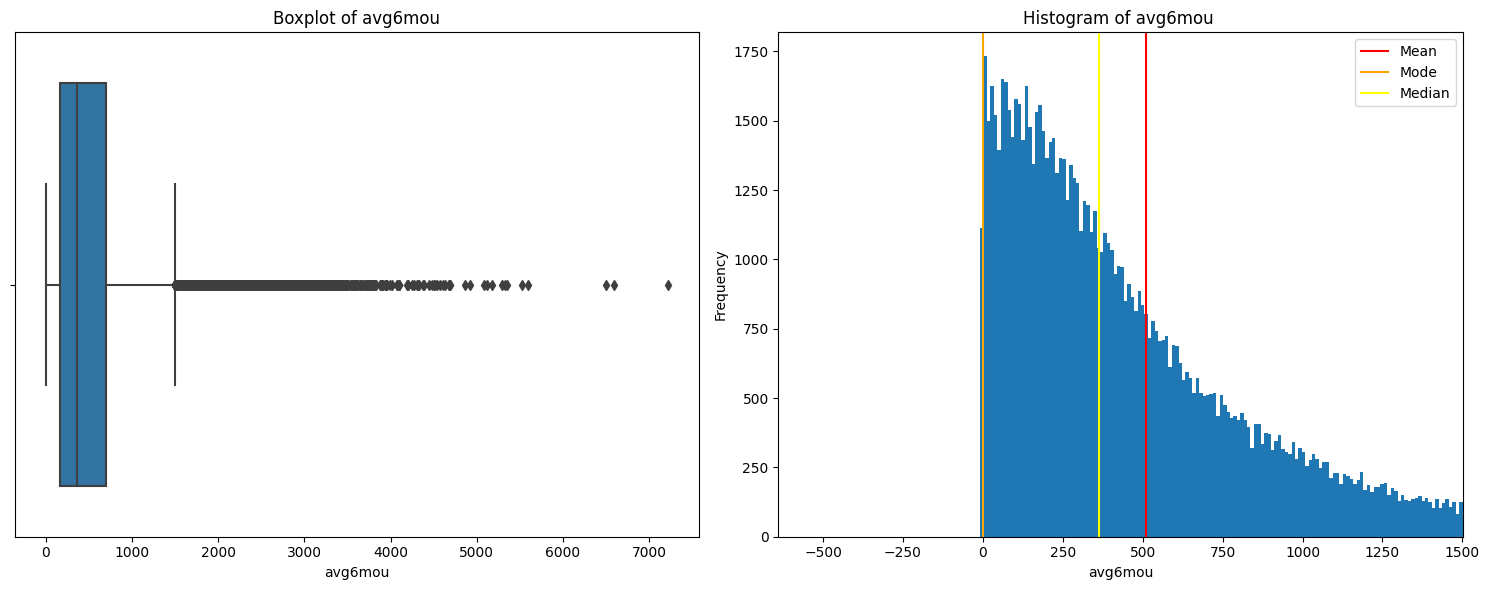

In [121]:
#plot the histogram and boxplot
plot_cont_col_IQR('avg6mou',200)

The distribution of the avg6mou column is highly skewed towards the left side, it means that the majority of customers have a lower average usage per month. The fact that the mode is 0 suggests that a significant proportion of customers do not use the service at all.

When filling missing values in this column, it may be appropriate to use the median value, as the mean may be affected by the skewness of the distribution. 

In [122]:
#fill the missing data with median
df['avg6mou'] = df['avg6mou'].fillna(df['avg6mou'].median())

**13)avg6qty**

avg6qty is a column represents the average number of voice call usage per month for the past six months. This column is an important feature in predicting customer churn, as it provides insight into a customer's level of engagement with the telecom company.



In [123]:
#check the missing value
chck_miss_value_cont_col('avg6qty')

Number of missing values in avg6qty column: 2839
Percentage  of missing values in avg6qty column: 2.839


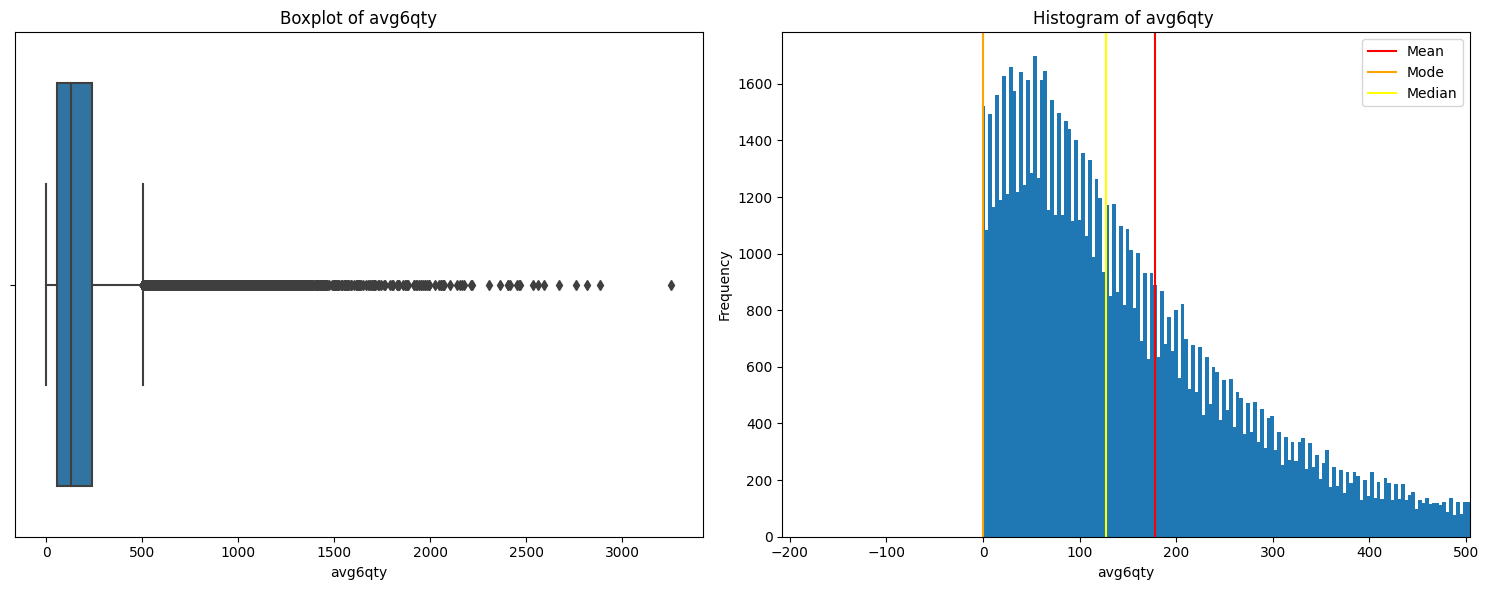

In [124]:
#plot the histogram and boxplot
plot_cont_col_IQR('avg6qty',200)

Mode of the column is zero, it suggests that a large number of customers may not be using the service, or may be using it very minimally. The median value of ~120 indicates that half of the customers are using less than 110 voice calls per month, while the other half are using more. The mean value of 190 suggests that the distribution is skewed towards higher values, meaning that a small number of customers may be using a very large number of voice calls, which could be an indicator of high usage or potential dissatisfaction with the service.

In [125]:
#fill the missing data with median
df['avg6qty'] = df['avg6qty'].fillna(df['avg6qty'].median())

**14)avg6rev**

The avg6rev column represents the average monthly revenue generated from the customer's usage over the last six months prior to the observation period. 
The avg6rev column provides insights into the revenue generated by each customer and how it changes over time. It is important for telecom companies to understand the average revenue generated by their customers over time, as it can help them identify patterns and trends in revenue generation and take steps to increase revenue, such as introducing new plans or offering promotions.



In [126]:
#check the missing value
chck_miss_value_cont_col('avg6rev')

Number of missing values in avg6rev column: 2839
Percentage  of missing values in avg6rev column: 2.839


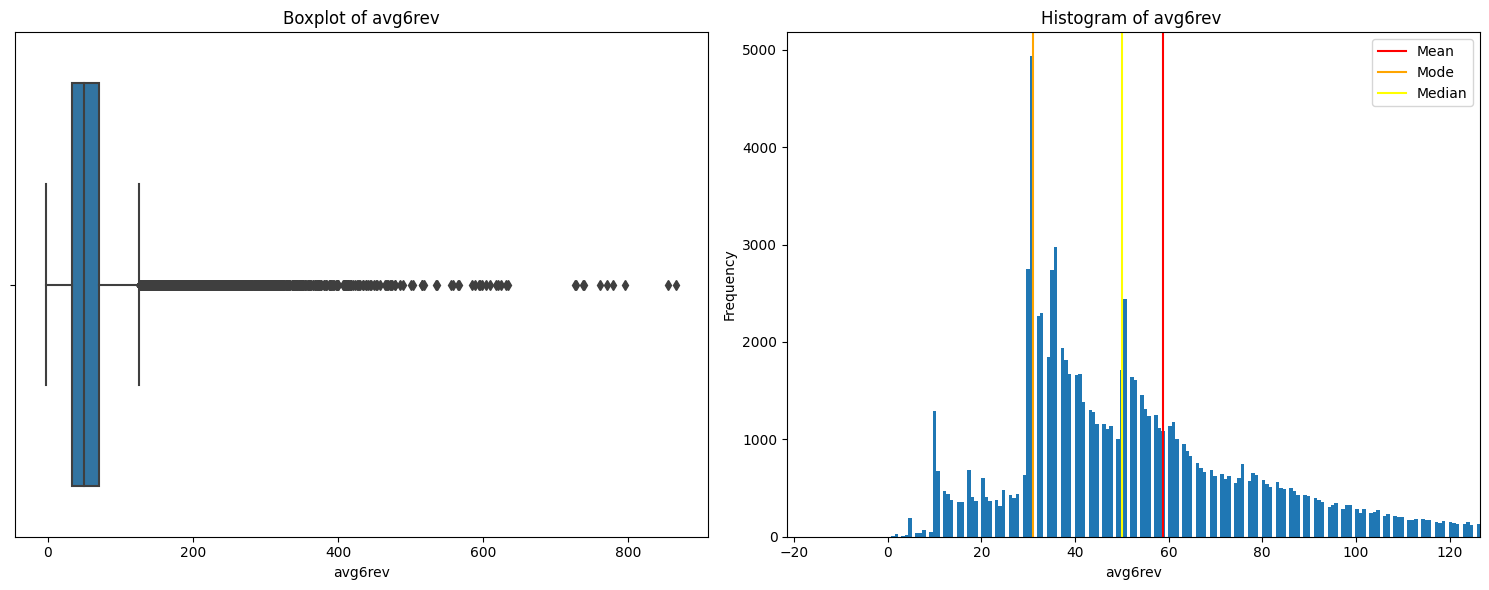

In [127]:
#plot the histogram and boxplot
plot_cont_col_IQR('avg6rev',200)

This distribution indicates that there are two distinct groups of customers in terms of their average monthly revenue. One group falls into the lower range of revenue, with an average of around 35-40, while the other group has a higher average revenue of around 50-55. This could be due to differences in usage patterns or subscription plans.

Knowing these groups can help telecom companies tailor their marketing and retention strategies to better target and retain high-value customers. Companies could offer special promotions or incentives to retain customers with higher average revenue, while also addressing the needs and concerns of customers in the lower revenue group to prevent them from churning.



In [128]:
#fill the missing data with median
df['avg6rev'] = df['avg6rev'].fillna(df['avg6rev'].median())

**15)hnd_price**

The "hnd_price" column refers to the average price of the handset used by the customer.

This column can provide insights into customer behavior and preferences, as customers who are willing to pay more for their handsets may be more likely to stay with the service provider, while customers who opt for cheaper handsets may be more price-sensitive and may be more likely to switch to a different provider if they can find a better deal.

In [129]:
#check the missing value
chck_miss_value_cont_col('hnd_price')

Number of missing values in hnd_price column: 847
Percentage  of missing values in hnd_price column: 0.847


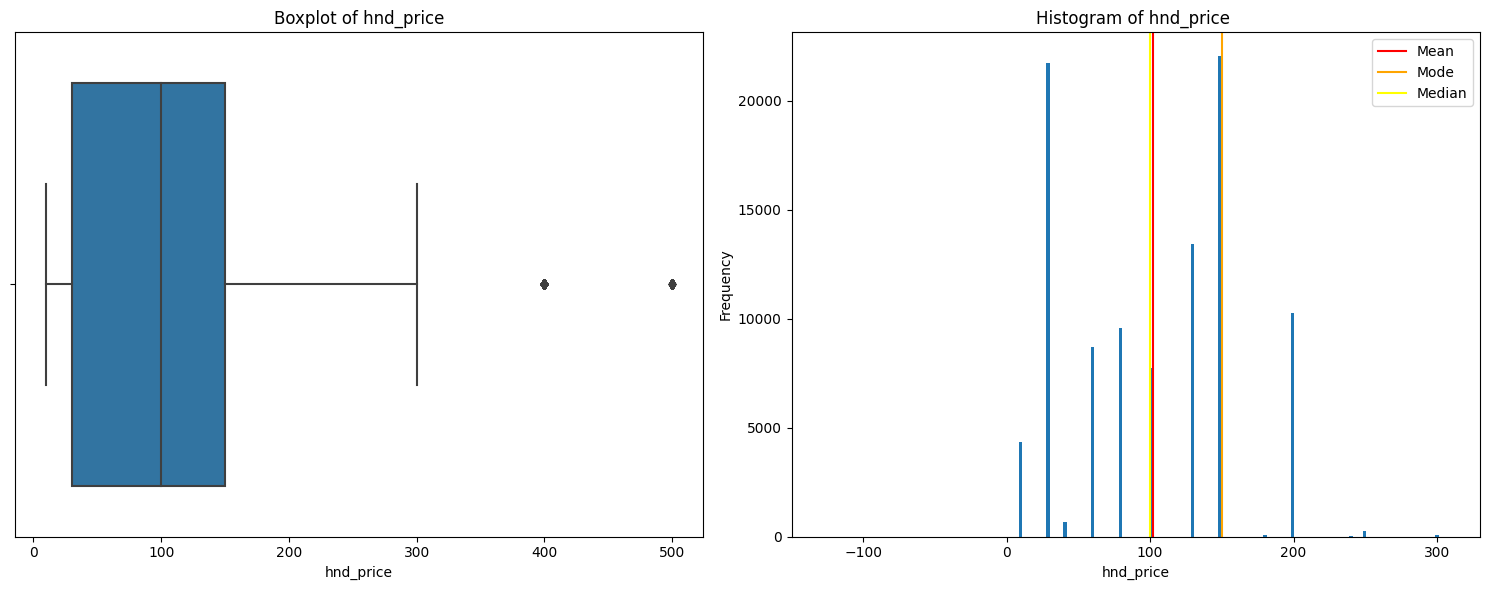

In [130]:
#plot the histogram and boxplot
plot_cont_col_IQR('hnd_price',200)

Distribution has three peaks at specific discrete values suggests that there may be certain price points that are more popular among customers. This information can be used by companies to set their pricing strategies and target customers more effectively based on their preferences for certain price ranges.Median and mean are same here ,which means the price is evenly distributed around the mean value 100.

In [131]:
#fill the missing data with median
df['hnd_price'] = df['hnd_price'].fillna(df['hnd_price'].median())

**16)phones** 

The "phones" column represents the number of handsets issued to the customer. This column provides insight into the customer's level of engagement with the company, as those with more handsets may be more likely to continue using the company's services.

Overall, the "phones" column can provide useful information for companies looking to understand customer behavior and predict churn. Companies can use this information to tailor their services to different groups of customers based on the number of handsets they have, potentially increasing customer retention and loyalty.

In [132]:
#check the missing value
chck_miss_value_cont_col('phones')

Number of missing values in phones column: 1
Percentage  of missing values in phones column: 0.001


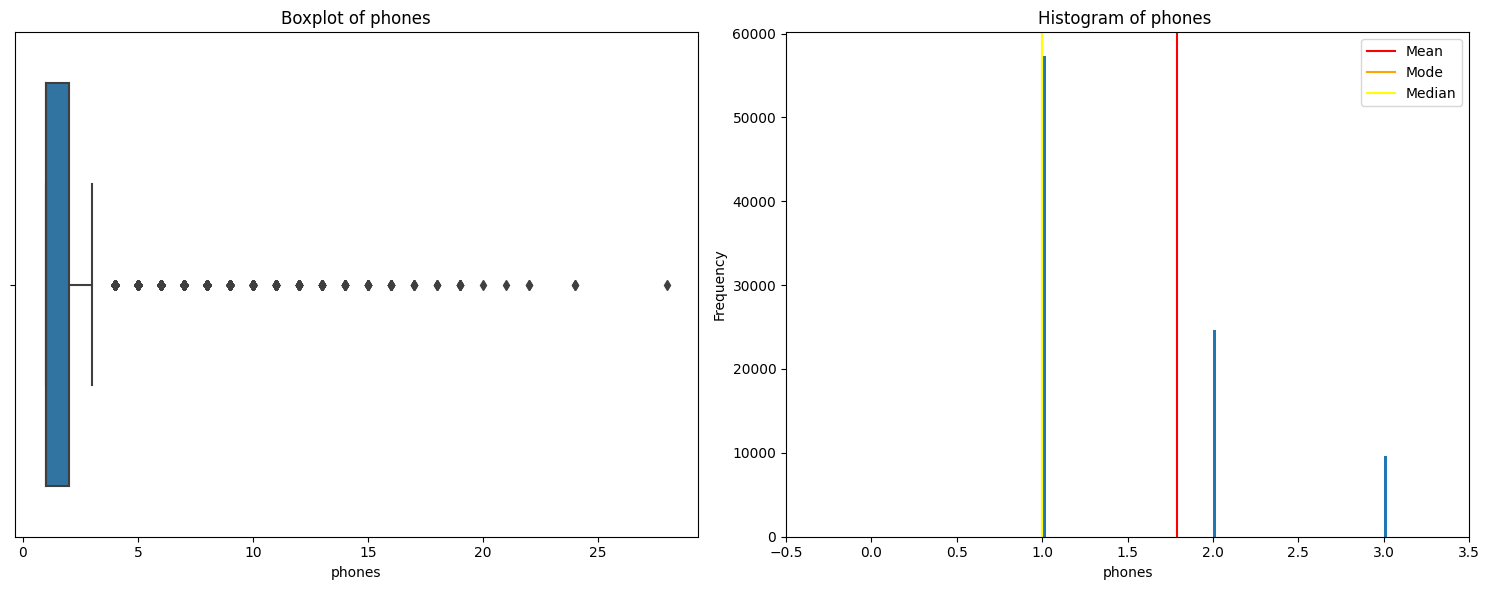

In [133]:
#plot the histogram and boxplot
plot_cont_col_IQR('phones',200)

The values in this column range from 1 to 3, with a mode of 1 indicating that the majority of customers have only one handset. The distribution of the data is heavily skewed towards the lower end, with a mean of 1.78 and a median of 1.0. This indicates that while some customers have multiple handsets, the majority only have one.


In [134]:
#fill the missing data with median
df['phones'] = df['phones'].fillna(df['phones'].median())

**17) models** 

The 'models' column represents the number of different handset models issued to a customer. It provides information on the variety of handsets used by customers, which can be useful for identifying patterns in customer behavior and preferences. 

In [135]:
#check the missing value
chck_miss_value_cont_col('models')

Number of missing values in models column: 1
Percentage  of missing values in models column: 0.001


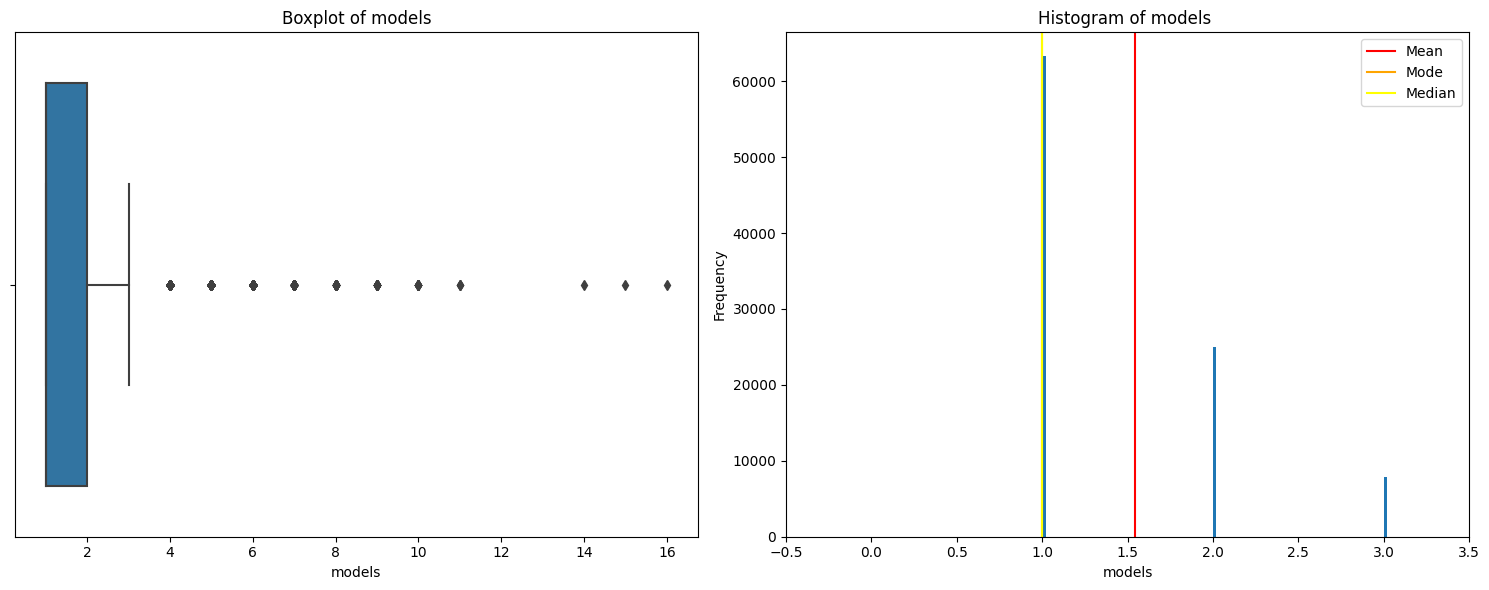

In [136]:
#plot the histogram and boxplot
plot_cont_col_IQR('models',200)

The values in this column has a mode of 1 and a median and mean of 1 and 1.5 respectively, indicating that most customers only use one handset model. However, there are some customers who use multiple handset models, which may be indicative of higher usage or a higher level of interest in technology.

In [137]:
#fill the missing data with median
df['models'] = df['models'].fillna(df['models'].median())

**18)eqpdays**

The 'eqpdays' column represents the number of days that a customer has had their current phone or equipment. This column provides an indication of how long a customer has been with the company and may be a factor in their decision to churn.



Typically, when a customer signs up for a mobile phone plan, they are provided with a phone that is connected to the plan. The "eqpdays" column tracks the number of days that the customer has been using this phone with the plan. If a customer has been using the same phone for a long time, it may indicate that they are satisfied with the phone and the associated services. On the other hand, if a customer has had their phone for a shorter period of time, it may indicate that they are less satisfied and may be more likely to churn.

In [138]:
#check the missing value
chck_miss_value_cont_col('eqpdays')

Number of missing values in eqpdays column: 1
Percentage  of missing values in eqpdays column: 0.001


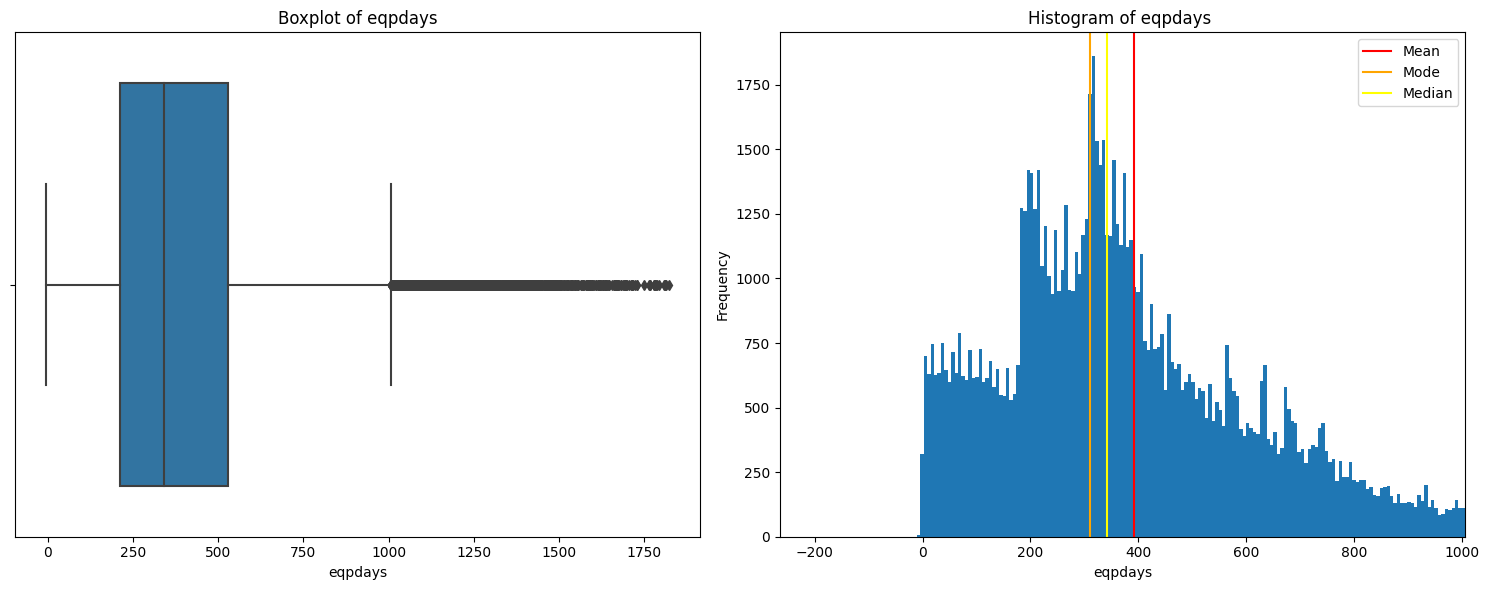

In [139]:
#plot the histogram and boxplot
plot_cont_col_IQR('eqpdays',200)

The distribution of values in the 'eqpdays' column ranges from 0 to over 2000, with a mean and median value of approximately 391 and 337, respectively. The distribution is skewed towards the right side, indicating that there are some customers who have been with the company for a very long time.

It is important to note that some customers may have received new equipment during their time with the company, which would reset the count for 'eqpdays'. Therefore, this column may not accurately reflect the true length of time that a customer has been with the company

In [140]:
#fill the missing data with median
df['eqpdays'] = df['eqpdays'].fillna(df['eqpdays'].median())

**19)numbcars**

The numbcars column represents the number of cars in the household of the customer. This information can provide insights into the customer's lifestyle and purchasing power. 

In [141]:
#check the missing value
chck_miss_value_cont_col('numbcars')

Number of missing values in numbcars column: 49366
Percentage  of missing values in numbcars column: 49.366


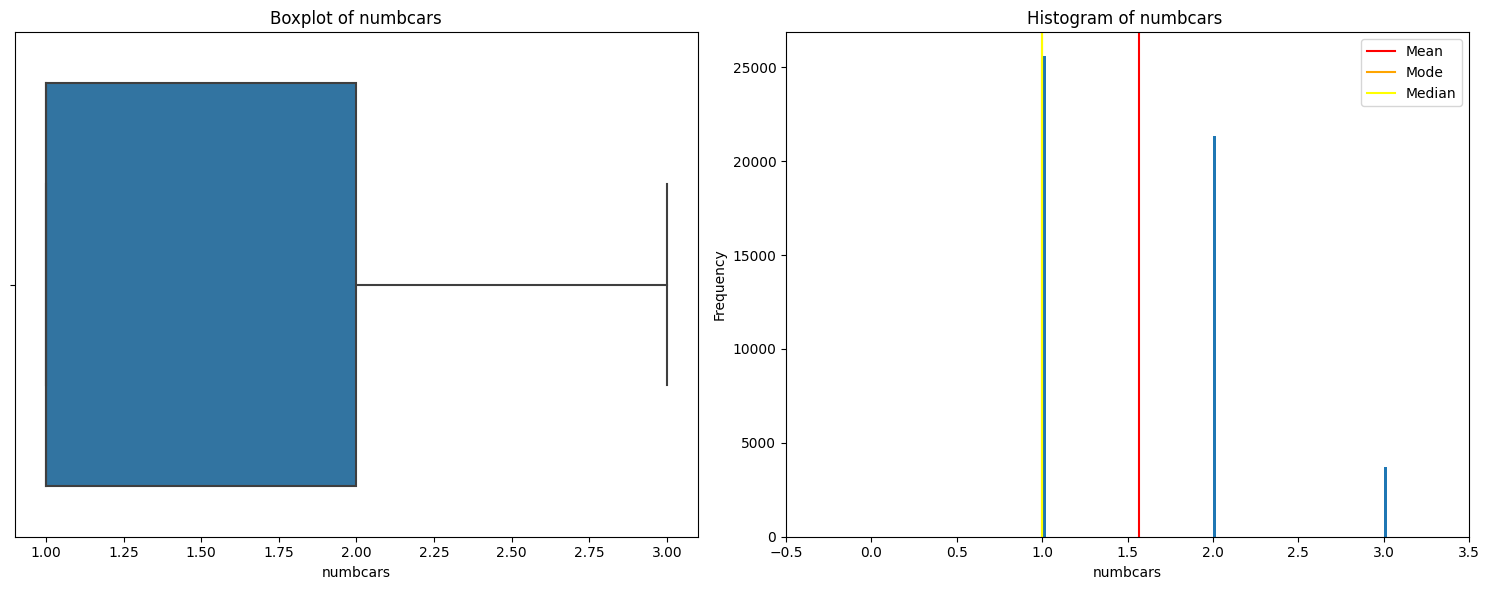

In [142]:
#plot the histogram and boxplot
plot_cont_col_IQR('numbcars',200)

The column contains numerical data, with a range from 0 to 3. The distribution of the data shows that the majority of customers have 0 or 1 car, with a smaller number of customers having 2 or 3 cars.


In [143]:
#fill the missing data with median
df['numbcars'] = df['numbcars'].fillna(df['numbcars'].median())

 **20)income**

The "income" column represents the self-reported annual income of the customer. 

In [144]:
#check the missing value
chck_miss_value_cont_col('income')

Number of missing values in income column: 25436
Percentage  of missing values in income column: 25.436


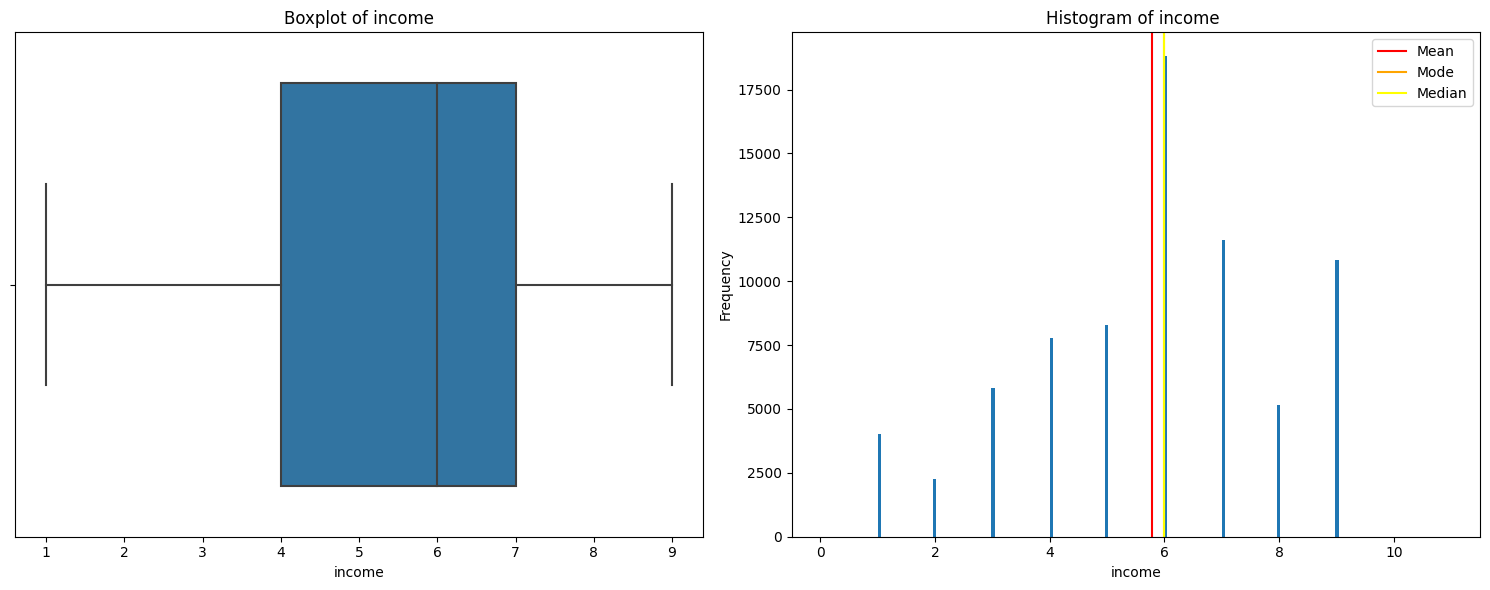

In [145]:
#plot the histogram and boxplot
plot_cont_col_IQR('income',200)

The values in this column range from 1 to 10, with a mean and median value of around 5.7 and 6, respectively. The distribution of values is skewed towards the lower end, indicating that a majority of customers have a lower income.

The income of customers can be an important factor in predicting churn, as customers with higher income may have different needs and expectations from the telecom services they subscribe to. Companies can use this information to develop targeted marketing and retention strategies for high-income customers and tailor their services to better meet their needs.

In [146]:
#fill the missing data with median
df['income'] = df['income'].fillna(df['income'].median())

**21)adults**

The column "adults" in the represents the number of adults in the household of the customer. 

In [147]:
#check the missing value
chck_miss_value_cont_col('adults')

Number of missing values in adults column: 23019
Percentage  of missing values in adults column: 23.019


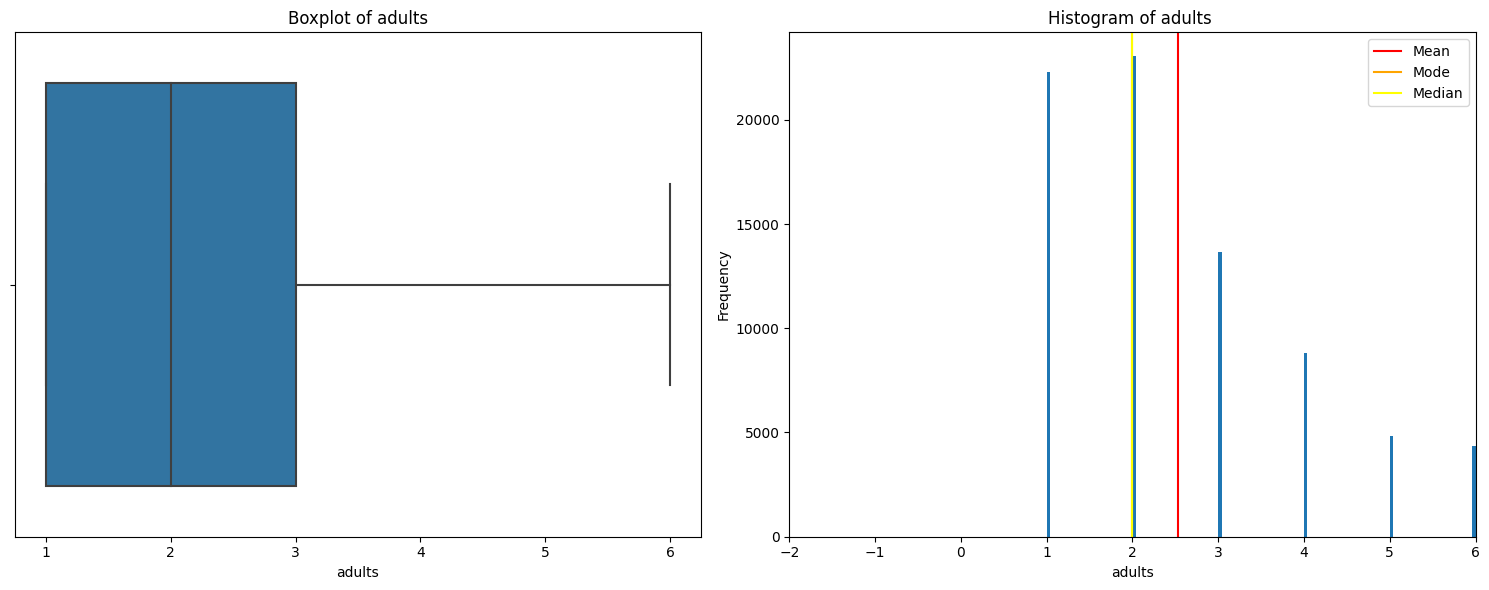

In [148]:
#plot the histogram and boxplot
plot_cont_col_IQR('adults',200)

The values in this column range from 1 to 6 and are integers. This column can provide insights into the household size and composition, which can be useful for targeting marketing efforts and understanding customer behavior. It can also be used to identify customers who may require family plans or additional services for multiple adults in the household.

In [149]:
#fill the missing data with median
df['adults'] = df['adults'].fillna(df['adults'].median())

**22)lor**

The 'length of residence' column in the customer churn dataset represents the number of years the customer has lived in their current residence. This information is typically used by telecom companies to better understand the demographics of their customer base and tailor their marketing strategies accordingly.



In [150]:
#check the missing value
chck_miss_value_cont_col('lor')

Number of missing values in lor column: 30190
Percentage  of missing values in lor column: 30.19


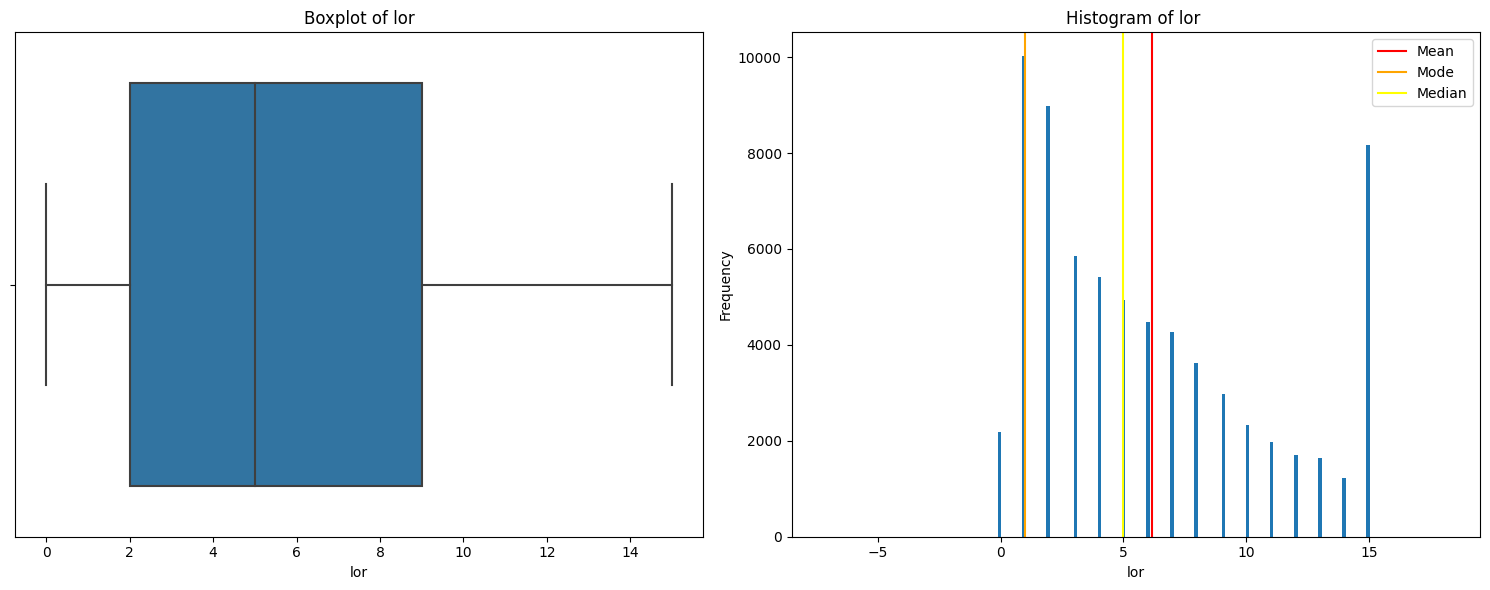

In [151]:
#plot the histogram and boxplot
plot_cont_col_IQR('lor',200)

The column has a range of values from 0 to 15, indicating that most customers have lived in their current residence for 15 years or less. The distribution of values appears to be relatively evenly spread, with no significant peaks or outliers.

By analyzing the length of residence of their customers, telecom companies can gain insights into factors that may contribute to churn, such as customer satisfaction with their current location or changes in employment or income that may necessitate a move.

In [152]:
#fill the missing data with median
df['lor'] = df['lor'].fillna(df['lor'].median())

23)**rv** 

The "rv" column refers to "revenue from recreational vehicle", which is the amount of revenue generated from services related to recreational vehicles. 

In [153]:
#check the missing value
chck_miss_value_cont_col('rv')

Number of missing values in rv column: 1732
Percentage  of missing values in rv column: 1.732


<ipython-input-80-12815616501d>:30: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_bound, upper_bound)


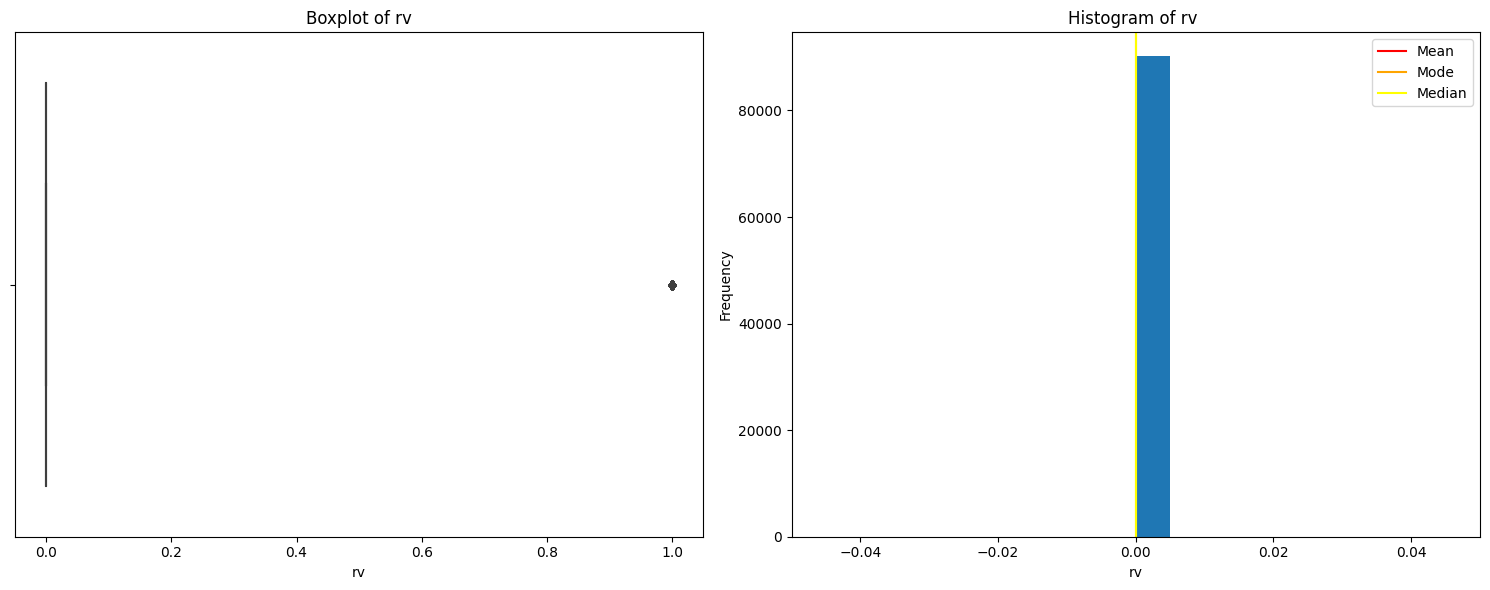

In [154]:
#plot the histogram and boxplot
plot_cont_col_IQR('rv',200)

In [ ]:
#take count different values in the column
df['rv'].value_counts()

0.0    90153
1.0     8115
Name: rv, dtype: int64

In this we can see that more than 90 percentage of the values are zeros and nearly 2 percentage of values are missing.So column won't add any value rather than it will add more noise.So we can delete  this column.
value zero in the column shows that customers has no rv while 1 shows customer has rv. But the percentage of 1 is very small,so it better to drop the column to avoid the noise.

In [155]:
#drop the column from the dataframe
df.drop('rv',axis=1,inplace=True)

**24)truck**

The "truck" column most likely represents the number of trucks owned by the customer.

In [156]:
#check the missing value
chck_miss_value_cont_col('truck')

Number of missing values in truck column: 1732
Percentage  of missing values in truck column: 1.732


<ipython-input-80-12815616501d>:30: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_bound, upper_bound)


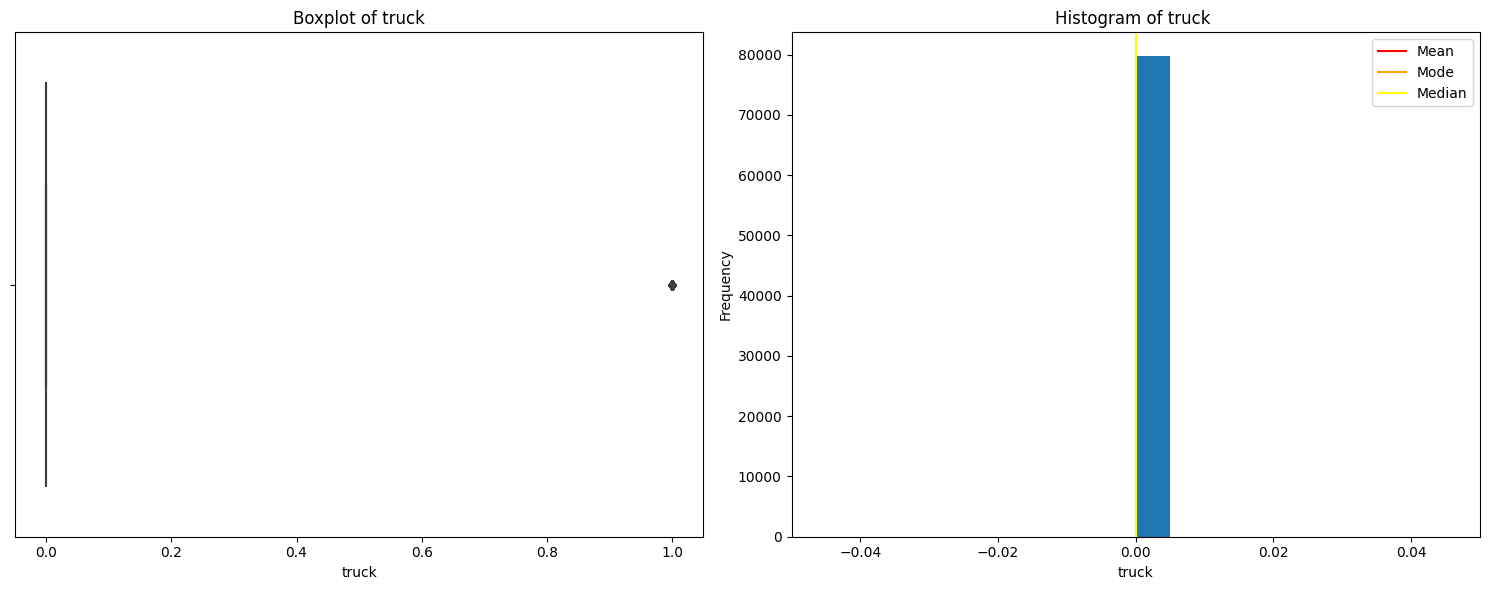

In [157]:
#plot the histogram and boxplot
plot_cont_col_IQR('truck',200)

In [158]:
#take count different values in the column
df['truck'].value_counts()

0.0    79713
1.0    18555
Name: truck, dtype: int64

Nearly 80% values in this column are zeros.

In [159]:
#fill the missing data with median
df['truck'] = df['truck'].fillna(df['truck'].median())

**25)forgntvl**

The forgntvl column represents the percentage of voice usage for calls made outside of the customer native location. 

In [160]:
#check the missing value
chck_miss_value_cont_col('forgntvl')

Number of missing values in forgntvl column: 1732
Percentage  of missing values in forgntvl column: 1.732


<ipython-input-80-12815616501d>:30: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_bound, upper_bound)


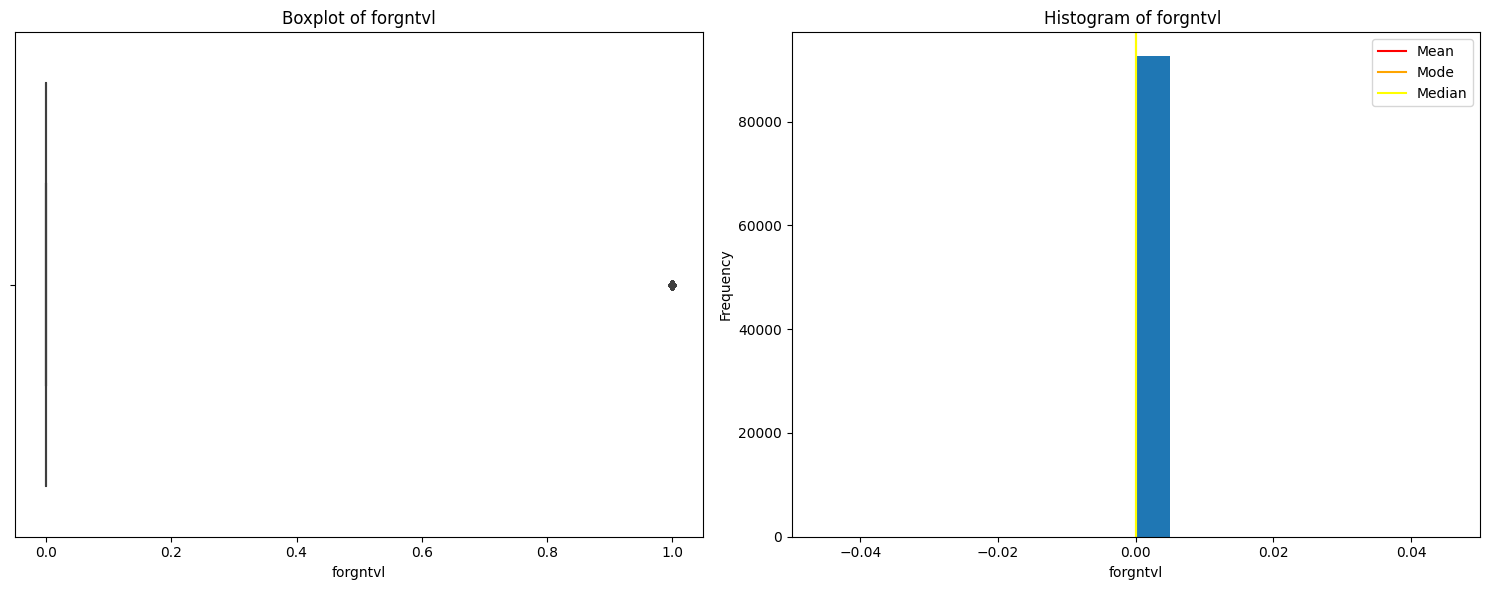

In [161]:
#plot the histogram and boxplot
plot_cont_col_IQR('forgntvl',200)

The values in this column range from 0 to 1. The higher the value, the more likely it is that the customer travels internationally or makes frequent international calls. This information can be useful in predicting customer churn, as customers who travel internationally may have different needs and preferences than those who primarily use their phone within their local area. Additionally, international calling may be more expensive, which could impact customer satisfaction and retention.

In [162]:
#take count different values in the column
df['forgntvl'].value_counts()

0.0    92571
1.0     5697
Name: forgntvl, dtype: int64

This column indicates the foreign travel by the customer. Here nearly 92 percentage of the customers don't go for the foreign travel ,nearly 2 percentage of data is missing. only 5 percentage of the column has 1 value. so this column also add noise, it wont add value to the model. so we can delete the column.

In [163]:
#drop the column
df.drop('forgntvl',axis=1,inplace=True)

In [164]:
df.shape

(100000, 98)

Now we can just go through the distribution of other numerical columns with no null values. Try to have a quick look about what that column stands for and how is their distribution.

## **Distribution and Explanation of other continous variables**<a name="other-cont"></a>

Tried to group the remaining columns as a group 4,and analyse 4 columns at atime.

In [165]:
cont_cols_to_plot_1 = ['drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean']
cont_cols_to_plot_2 = ['unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean']
cont_cols_to_plot_3 = ['recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean']
cont_cols_to_plot_4 = ['custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean']
cont_cols_to_plot_5 = ['threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean']
cont_cols_to_plot_6 = ['owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean']
cont_cols_to_plot_7 = ['peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean']
cont_cols_to_plot_8 = ['opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean']
cont_cols_to_plot_9 = ['drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean']
cont_cols_to_plot_10 = ['callwait_Mean', 'months', 'uniqsubs', 'actvsubs']
cont_cols_to_plot_11 = ['totcalls', 'totmou', 'totrev', 'adjrev']
cont_cols_to_plot_12 = ['adjmou', 'adjqty', 'avgrev', 'avgmou']
cont_cols_to_plot_13 = ['avgqty', 'avg3mou', 'avg3qty', 'avg3rev']
cont_cols_to_plot_14 = ['avg6mou', 'avg6qty', 'avg6rev']


 

In [166]:
#this is the modified function to plot histogram and boxplot of list of columns
def plot_cont_cols_IQR_list(cols_list, nbins):
    """
    This function creates boxplots and histograms with the interquartile range (IQR) for each specified continuous column.
    The histogram displays the mean, median, and mode with vertical lines.

    Parameters:
    cols_list (list): A list of column names in the DataFrame for which to create the plots.
    nbins (int): The number of bins for the histogram.

    Returns:
    None: The function displays the plots but does not return any value.
    """
    num_cols = len(cols_list)
    fig, axes = plt.subplots(nrows=2, ncols=num_cols, figsize=(num_cols * 5, 10))

    for idx, col_name in enumerate(cols_list):
        column = col_name
        x = df[column].dropna()

        # Boxplot
        sns.boxplot(x=df[col_name], ax=axes[0, idx])

        # Set the titles and labels
        axes[0, idx].set_title(col_name)
        axes[0, idx].set_xlabel('')

        # Calculate quartiles and bounds
        Q1 = np.percentile(x, 25)
        Q3 = np.percentile(x, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Histogram
        axes[1, idx].set_xlim(lower_bound, upper_bound)
        axes[1, idx].hist(x, bins=nbins, range=(lower_bound, upper_bound))

        # Set titles and labels
        axes[1, idx].set_xlabel(column)
        axes[1, idx].set_ylabel('Frequency')

        # Add median and mean lines
        axes[1, idx].axvline(x.mean(), c='red', label='Mean')
        axes[1, idx].axvline(x.mode().values[0], c='orange', label='Mode')
        axes[1, idx].axvline(x.median(), c='yellow', label='Median')

        axes[1, idx].legend()

    plt.tight_layout()
    plt.show()

       

Lets consider first list of 4 columns,and plot their histogram and box plot.`'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean'` thse are the 4 columns plotted below.Lets try to understand what does each of theese columns represent.

**26)drop_vce_Mean**
- The "drop_vce_Mean" column refers to the average number of dropped voice calls for a customer during a given period. Dropped calls are calls that get disconnected or terminated before they are completed, often due to network issues or poor signal quality. This metric can be useful in understanding a customer's experience with the telecom service, and high numbers of dropped calls might contribute to customer dissatisfaction and eventually churn.

**27)drop_dat_Mean**
- The "drop_dat_Mean" column refers to the average number of dropped data sessions for a customer during a given period. Dropped data sessions are instances when a data connection is interrupted or terminated before it is completed, often due to network issues or poor signal quality. Similar to dropped voice calls, this metric helps in understanding a customer's experience with the telecom service. A high number of dropped data sessions might lead to customer dissatisfaction and, eventually, churn.

**28)blck_vce_Mean**
- The "blck_vce_Mean" column refers to the average number of blocked voice calls for a customer during a given period. Blocked voice calls are instances when a customer tries to make a call, but the call cannot be connected due to network congestion or other issues. This metric helps in understanding the customer's experience with the telecom service. A high number of blocked voice calls might lead to customer dissatisfaction and, eventually, churn.

**29)blck_dat_Mean**
- The "blck_dat_Mean" refers to the average number of blocked data sessions for a customer during a given period. Blocked data sessions occur when a customer attempts to use data services, such as browsing the internet or using an app, but the connection cannot be established due to network congestion or other issues. This metric helps in understanding the customer's experience with the telecom service's data capabilities. A high number of blocked data sessions might lead to customer dissatisfaction and, eventually, churn.



<ipython-input-166-05aff3e26757>:36: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1, idx].set_xlim(lower_bound, upper_bound)
<ipython-input-166-05aff3e26757>:36: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1, idx].set_xlim(lower_bound, upper_bound)


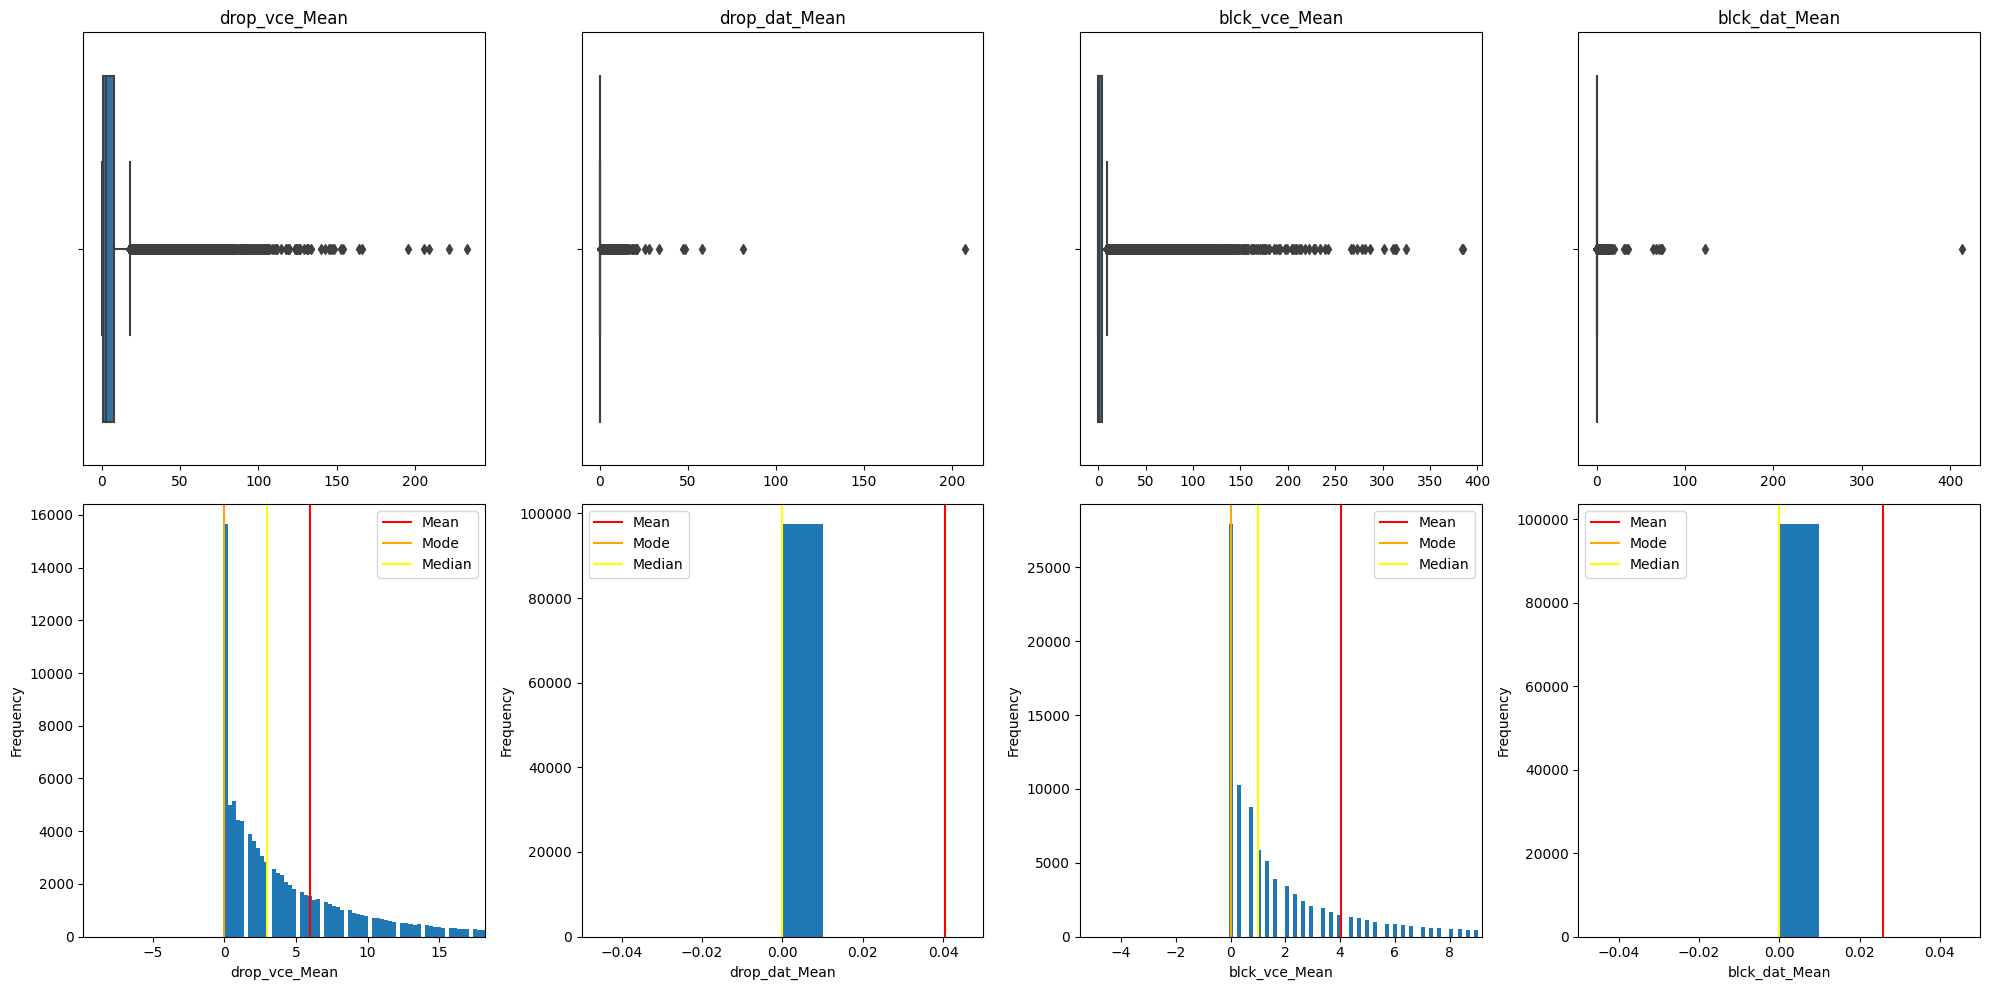

In [167]:
#plot histogram and box plot for the above explained columns
plot_cont_cols_IQR_list(cont_cols_to_plot_1,100)

For the columns `drop_dat_Mean` and `blck_dat_Mean`, both the histogram and box plot reveal that a majority of the values are zero. Additionally, the box plot displays numerous outliers within the data. It would be worthwhile to investigate the values and their counts in these columns further.

In [168]:
# #find the value count of the column
df['blck_dat_Mean'].value_counts()

0.000000      98772
0.333333        577
0.666667        225
1.000000        106
1.333333         72
2.000000         43
1.666667         39
2.333333         23
2.666667         16
3.000000         13
4.000000         11
4.333333         11
3.333333         10
5.333333          9
4.666667          7
6.000000          5
3.666667          5
6.666667          4
10.333333         4
8.000000          3
10.666667         3
16.000000         3
11.666667         3
12.666667         2
8.333333          2
5.000000          2
7.000000          2
7.333333          2
15.333333         1
11.000000         1
13.666667         1
32.333333         1
413.333333        1
19.666667         1
5.666667          1
64.000000         1
12.000000         1
9.666667          1
13.333333         1
66.666667         1
70.000000         1
72.333333         1
11.333333         1
16.333333         1
35.000000         1
122.333333        1
17.333333         1
7.666667          1
6.333333          1
14.333333         1


The value count of `blck_dat_Mean` indicates that 98,772 values in the column are zero, which is roughly 99% of the total values. This suggests that this column may introduce noise to the model, so it might be beneficial to drop it.

In [169]:
# #find the value count of the column
df['drop_dat_Mean'].value_counts()

0.000000      97400
0.333333       1104
0.666667        533
1.000000        218
1.333333        163
1.666667        101
2.000000         79
2.333333         55
2.666667         48
3.333333         34
3.000000         31
4.000000         29
3.666667         24
4.333333         21
5.000000         17
5.333333         11
4.666667         11
5.666667         11
8.000000         10
6.000000          9
9.333333          8
6.333333          7
8.333333          6
7.333333          6
6.666667          5
7.000000          5
10.000000         4
9.666667          4
9.000000          3
13.000000         3
10.666667         3
12.000000         2
14.000000         2
15.333333         2
15.000000         2
16.666667         2
12.333333         2
18.666667         2
11.000000         2
11.333333         1
13.666667         1
13.333333         1
33.666667         1
18.000000         1
18.333333         1
27.666667         1
20.666667         1
7.666667          1
8.666667          1
48.333333         1


The value count of `drop_dat_Mean` indicates that 97,400 values in the column are zero, which is roughly 98% of the total values. This suggests that this column may introduce noise to the model, so it might be beneficial to drop it.

In [170]:
#drop the columns
df.drop('drop_dat_Mean',axis=1,inplace=True)
df.drop('blck_dat_Mean',axis=1,inplace=True)

Lets consider second list of 4 columns,and plot their histogram and box plot.`'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean'` thse are the 4 columns plotted below.Lets try to understand what does each of theese columns represent.

**30)unan_vce_Mean**
- The unan_vce_Mean column represents the average number of unanswered voice calls for a customer. This metric provides insight into how often a customer's voice calls are not answered, either due to the call recipient not picking up or the call being dropped before it can be answered.

**31)unan_dat_Mean**
- The unan_dat_Mean column represents the average number of unanswered data sessions for a customer. This metric provides insight into how often a customer's data sessions are not established or disconnected before they can be completed. This could be due to network issues, device problems, or other factors affecting data connectivity.

**32)plcd_vce_Mean**
- The plcd_vce_Mean column represents the average number of voice calls placed by a customer. This metric provides insight into the customer's voice call activity and usage patterns. A higher value indicates that the customer is more actively placing voice calls, while a lower value suggests less frequent voice call usage.

**33)plcd_dat_Mean**
- The plcd_dat_Mean column represents the average number of data sessions placed by a customer. This metric provides insight into the customer's data usage patterns and activity. A higher value indicates that the customer is more actively initiating data sessions, while a lower value suggests less frequent data usage.

<ipython-input-166-05aff3e26757>:36: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1, idx].set_xlim(lower_bound, upper_bound)
<ipython-input-166-05aff3e26757>:36: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1, idx].set_xlim(lower_bound, upper_bound)


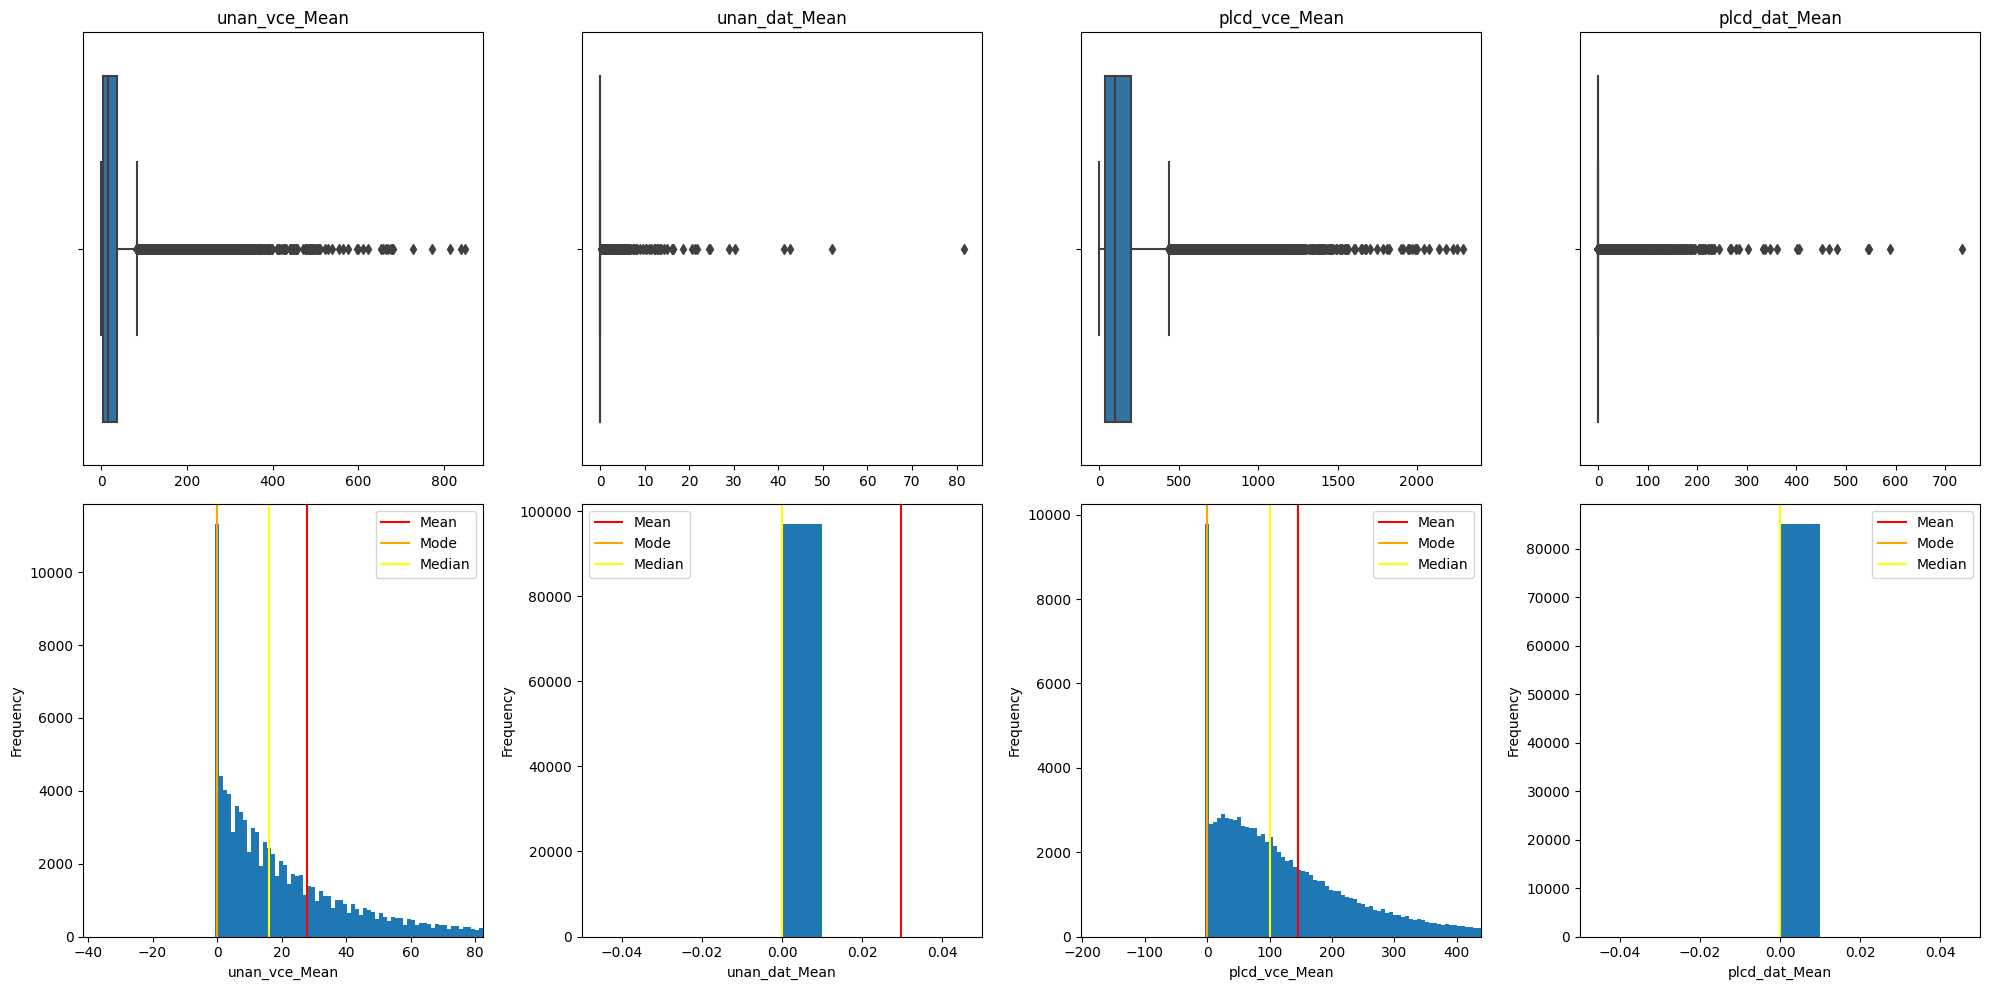

In [171]:
#plot histogram and box plot for the above explained columns
plot_cont_cols_IQR_list(cont_cols_to_plot_2,100)

For the columns unan_dat_Mean and plcd_dat_Mean, both the histogram and box plot reveal that a majority of the values are zero. Additionally, the box plot displays numerous outliers within the data. It would be worthwhile to investigate the values and their counts in these columns further.

In [172]:
# #find the value count of the column
df['unan_dat_Mean'].value_counts()

0.000000     96880
0.333333      1720
0.666667       689
1.000000       234
1.333333       150
1.666667        69
2.000000        52
2.333333        34
2.666667        30
3.000000        19
3.666667        16
3.333333        15
4.000000        15
5.666667        10
6.333333         7
4.333333         6
5.333333         6
5.000000         4
6.000000         3
6.666667         3
8.000000         2
16.333333        2
10.333333        2
12.333333        2
7.333333         2
4.666667         2
24.333333        1
30.333333        1
11.333333        1
7.666667         1
21.333333        1
81.666667        1
20.666667        1
8.333333         1
13.333333        1
9.666667         1
21.666667        1
9.000000         1
29.000000        1
11.000000        1
24.666667        1
16.000000        1
13.666667        1
12.000000        1
18.666667        1
41.333333        1
15.000000        1
13.000000        1
42.666667        1
12.666667        1
52.000000        1
14.333333        1
Name: unan_d

The value count of `unan_dat_Mean` indicates that 96,880 values in the column are zero, which is roughly 97% of the total values. This suggests that this column may introduce noise to the model, so it might be beneficial to drop it.

In [173]:
#drop the column
df.drop('unan_dat_Mean',axis=1,inplace=True)

In [174]:
# #find the value count of the column
df['plcd_dat_Mean'].value_counts()

0.000000      85020
0.333333       5180
0.666667       2618
1.000000       1168
1.333333        907
              ...  
138.000000        1
450.666667        1
139.000000        1
118.666667        1
331.666667        1
Name: plcd_dat_Mean, Length: 389, dtype: int64

it appears that the majority of the values are 0 (85,020 out of 100,000). This suggests that the column might not provide much information for the model, as most of the data points are concentrated around a single value (0).the next 5000 values are.333 which is also very close to zero.This column might not provide much information,but we can keep this column for now.



Lets consider third list of 4 columns,and plot their histogram and box plot.`'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean'` thse are the 4 columns plotted below.Lets try to understand what does each of these columns represent.

**34)recv_vce_Mean**
- The recv_vce_Mean column represents the average number of voice calls received by a customer over a specific period of time.This column could be useful for understanding customer behavior and patterns related to incoming voice calls.

**35)recv_sms_Mean**
- The recv_sms_Mean column represents the average number of SMS messages received by a customer over a specific period of time.This column could be helpful for understanding customer behavior and patterns related to incoming SMS messages.

**36)comp_vce_Mean**
- The comp_vce_Mean column  represents the average number of completed voice calls for a customer over a specific period of time.This column could be helpful for understanding customer behavior and patterns related to voice call usage, specifically the number of calls that were successfully connected and completed.

**37)comp_dat_Mean**
- The comp_dat_Mean column represents the average number of completed data sessions for a customer over a specific period of time.This column could be helpful for understanding customer behavior and patterns related to data usage, specifically the number of data sessions that were successfully initiated and completed. This information can be used to analyze customers' engagement with data services provided by the telecom company.


<ipython-input-166-05aff3e26757>:36: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1, idx].set_xlim(lower_bound, upper_bound)
<ipython-input-166-05aff3e26757>:36: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1, idx].set_xlim(lower_bound, upper_bound)


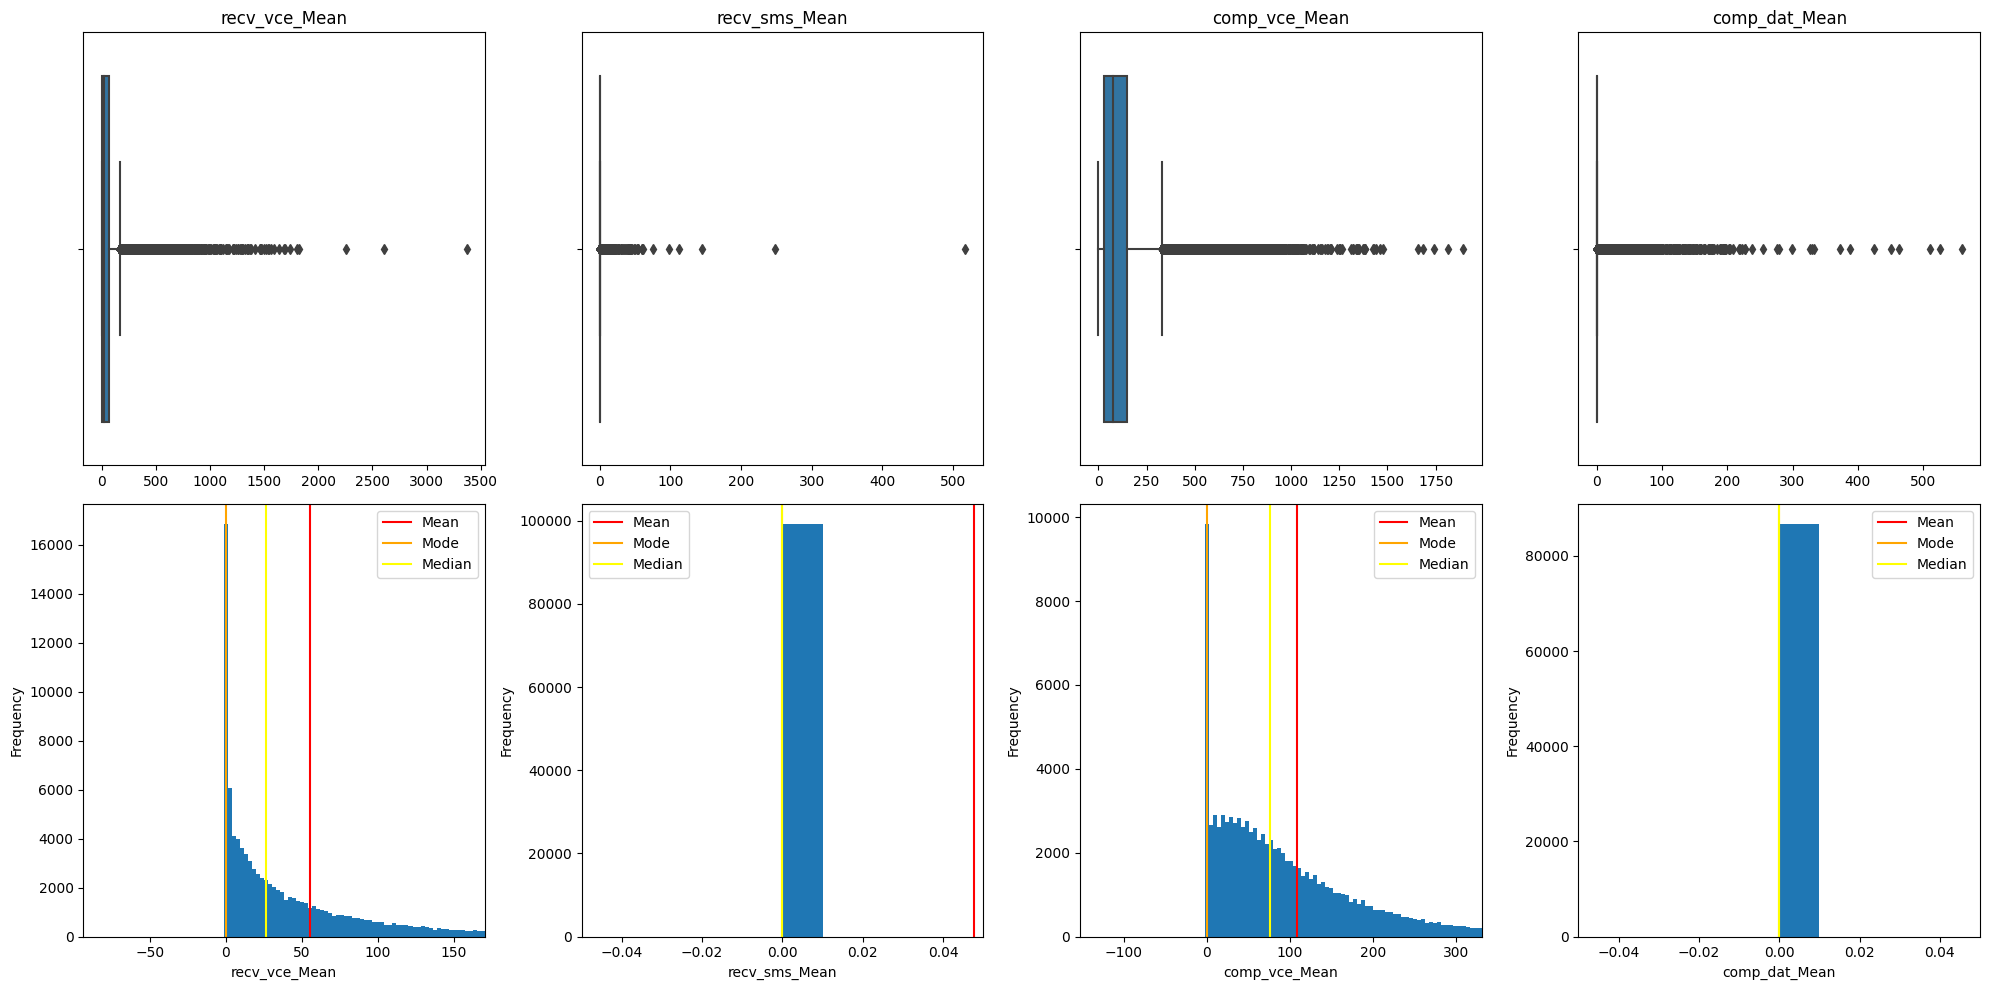

In [175]:
#plot histogram and box plot for the above explained columns
plot_cont_cols_IQR_list(cont_cols_to_plot_3,100)

For the columns recv_sms_Mean and comp_dat_Mean, both the histogram and box plot reveal that a majority of the values are zero. Additionally, the box plot displays numerous outliers within the data. It would be worthwhile to investigate the values and their counts in these columns further.

In [176]:
# #find the value count of the column
df['recv_sms_Mean'].value_counts()

0.000000     99128
0.333333       250
0.666667       150
1.000000        75
1.333333        57
             ...  
26.000000        1
98.333333        1
21.000000        1
15.000000        1
21.666667        1
Name: recv_sms_Mean, Length: 94, dtype: int64

In column recv_sms_Mean 99 percentage values are zero.So we can drop the column

In [177]:
#drop the column
df.drop('recv_sms_Mean',axis=1,inplace=True)

In [178]:
# #find the value count of the column
df['comp_dat_Mean'].value_counts()

0.000000      86607
0.333333       4659
0.666667       2315
1.000000        997
1.333333        811
              ...  
195.666667        1
76.000000         1
100.000000        1
98.333333         1
326.666667        1
Name: comp_dat_Mean, Length: 366, dtype: int64

In column comp_dat_Mean 86 percentage of values are zero. Lets keep this column for now.

Lets consider fourth list of 4 columns,and plot their histogram and box plot.custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean' thse are the 4 columns plotted below.Lets try to understand what does each of these columns represent.



**38)custcare_Mean**
- The custcare_Mean column represents the average number of customer care calls made by a customer over a specific period of time.This column can be helpful for understanding customer satisfaction and their experience with the service. A higher number of customer care calls might indicate that the customer is facing issues or has concerns, which could potentially lead to dissatisfaction and eventually churn. By analyzing this column, telecom companies can identify trends and patterns related to customer care calls and address any issues or concerns proactively to improve customer satisfaction and retention.

**39)'ccrndmou_Mean'**
- The ccrndmou_Mean column represents the average rounded minutes of customer care calls made by a customer over a specific period of time. This column can provide insight into the duration of customer care calls and help evaluate customer satisfaction.
A higher average of rounded customer care call minutes might indicate that customers are spending more time on these calls, possibly due to more complex issues or concerns. By analyzing this column, telecom companies can identify trends related to call durations, evaluate the efficiency of their customer care services, and proactively address any issues to improve customer satisfaction and retention.

**40)cc_mou_Mean**
- The cc_mou_Mean column represents the average unrounded minutes of use for customer care calls made by a customer over a specific period of time.This column can provide insight into how much time customers are spending on customer care calls.

**41)inonemin_Mean**
- The inonemin_Mean column represents the average number of one-minute-long calls made by a customer over a specific period of time.This column can provide insight into the customer's calling behavior.
A high value in the `inonemin_Mean` column could indicate that the customer tends to make many short calls, while a low value might suggest that the customer prefers longer conversations. Analyzing this column can help telecom companies understand the calling patterns of their customers, enabling them to better tailor their services and plans to meet customer preferences, potentially improving customer satisfaction and reducing churn.

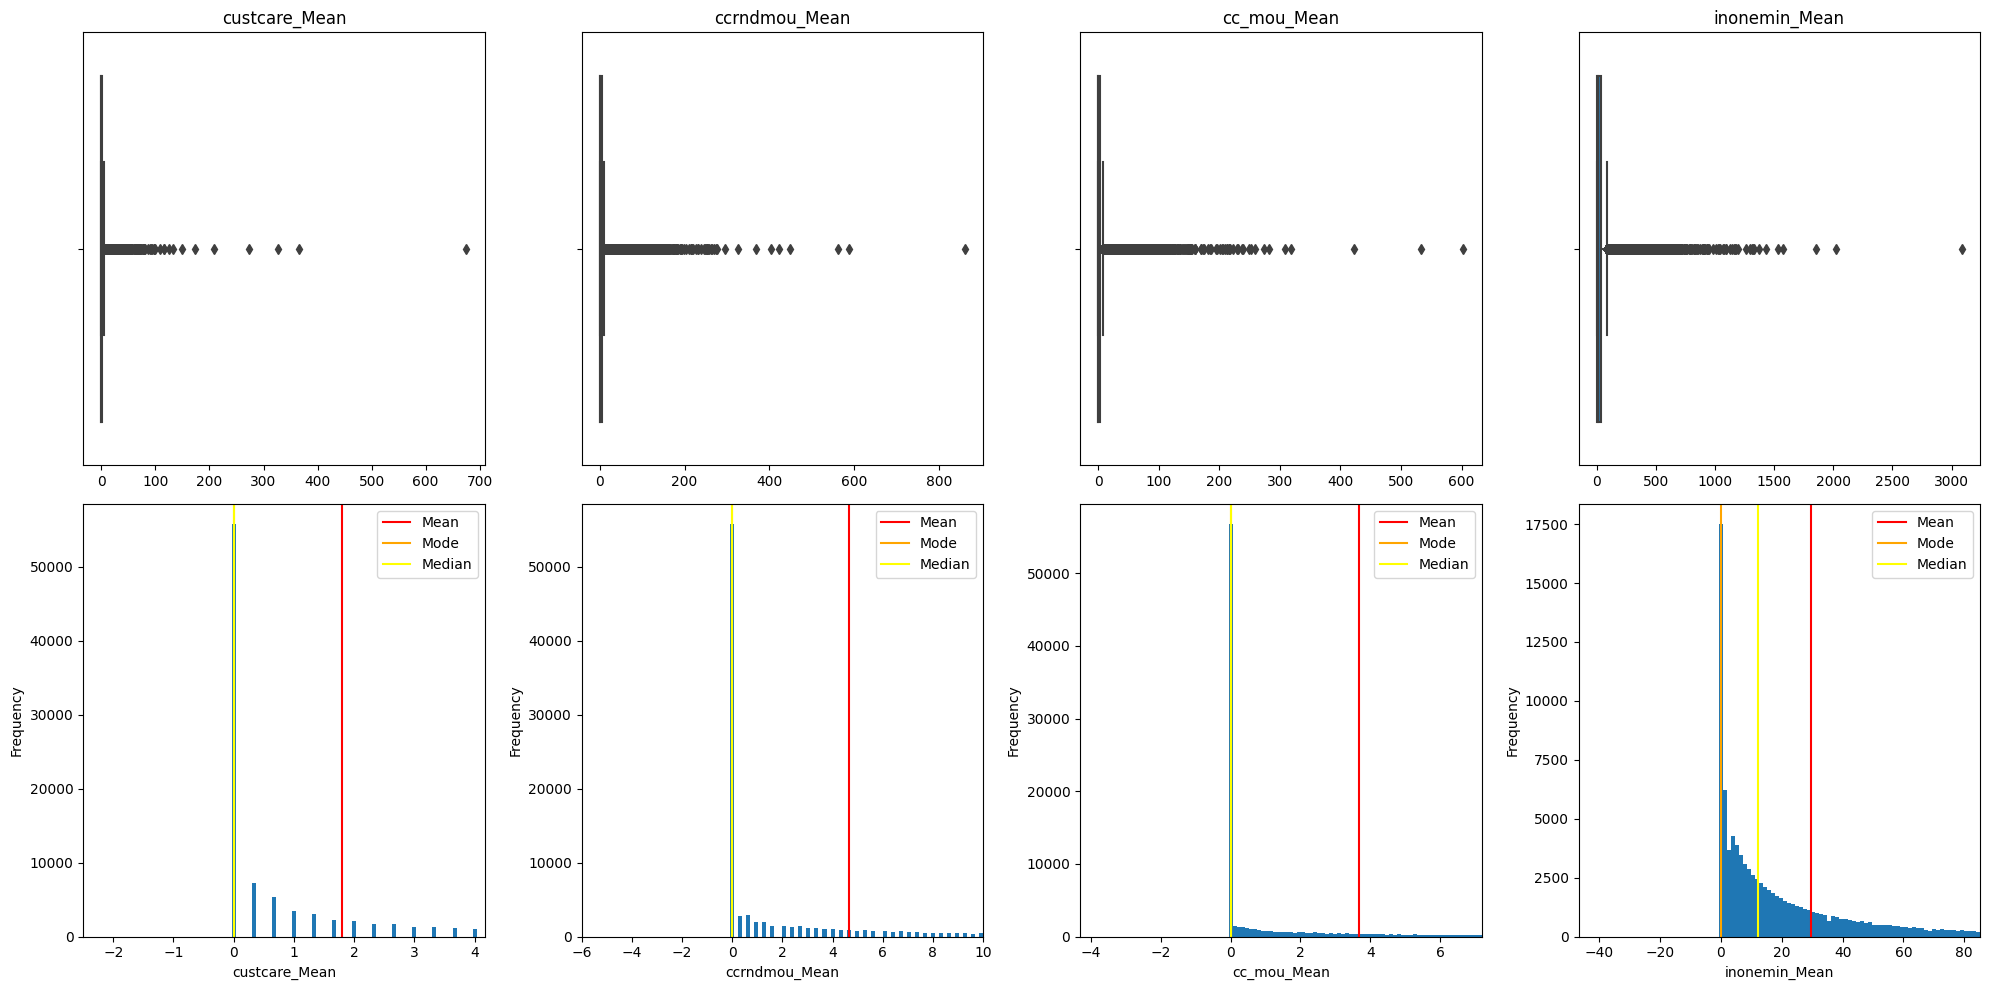

In [179]:
#plot histogram and box plot for the above explained columns
plot_cont_cols_IQR_list(cont_cols_to_plot_4,100)

In [180]:
# #find the value count of the column
df['custcare_Mean'].value_counts()

0.000000      55692
0.333333       7213
0.666667       5383
1.000000       3504
1.333333       3076
              ...  
70.333333         1
61.333333         1
68.333333         1
72.333333         1
132.333333        1
Name: custcare_Mean, Length: 209, dtype: int64

In [181]:
# #find the value count of the column
df['ccrndmou_Mean'].value_counts()

0.000000      55692
0.666667       2880
0.333333       2847
1.333333       1950
1.000000       1949
              ...  
169.333333        1
102.666667        1
78.000000         1
139.666667        1
178.666667        1
Name: ccrndmou_Mean, Length: 458, dtype: int64

In [182]:
# #find the value count of the column
df['cc_mou_Mean'].value_counts()

0.000000      55692
0.043333        143
0.033333        134
0.050000        117
0.040000        114
              ...  
33.930000         1
43.606667         1
21.386667         1
30.430000         1
151.433333        1
Name: cc_mou_Mean, Length: 9231, dtype: int64

In [183]:
# #find the value count of the column
df['inonemin_Mean'].value_counts()

0.000000      13025
0.333333       2349
0.666667       2114
1.333333       1699
1.000000       1671
              ...  
353.000000        1
618.333333        1
322.666667        1
904.333333        1
538.666667        1
Name: inonemin_Mean, Length: 1312, dtype: int64

Lets consider fifth list of 4 columns,and plot their histogram and box plot.threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean thse are the 4 columns plotted below.Lets try to understand what does each of these columns represent.



**42)threeway_Mean**
- The threeway_Mean column represents the average number of three-way calls made by a customer over a specific period of time.This column can provide insights into the customer's calling behavior and preferences.
A high value in the threeway_Mean column could indicate that the customer frequently uses three-way calling features, while a low value might suggest that the customer rarely or never engages in three-way calls. Analyzing this column can help telecom companies better understand their customers' usage of advanced calling features, allowing them to offer more targeted promotions or services that align with customer preferences, potentially improving customer satisfaction and reducing churn.

**43)mou_cvce_Mean**
- The mou_cvce_Mean column represents mean unrounded minutes of use of completed voice calls.This column can provide valuable insights into the customer's calling behavior and preferences.
A high value in the mou_cvce_Mean column may indicate that the customer frequently engages in voice calls, while a low value might suggest that the customer rarely or never makes voice calls. 

**44)mou_cdat_Mean**
- The mou_cdat_Mean column represents mean unrounded minutes of use of completed data calls.This column can provide valuable insights into the customer's calling behavior and preferences.
A high value in the mou_cdat_Mean column may indicate that the customer frequently engages in data calls, while a low value might suggest that the customer rarely or never makes data calls. 

**45)mou_rvce_Mean**
- The mou_rvce_Mean column represents the mean unrounded minutes of use of received voice calls.This column provides insights into the customer's incoming call behavior and preferences.

 A high value in the mou_rvce_Mean column may indicate that the customer frequently receives incoming calls. Analyzing this column can help telecom companies understand their customers' call receiving patterns and preferences, allowing them to offer more targeted voice plans or services that align with customer needs, potentially improving customer satisfaction and reducing churn.







<ipython-input-166-05aff3e26757>:36: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1, idx].set_xlim(lower_bound, upper_bound)


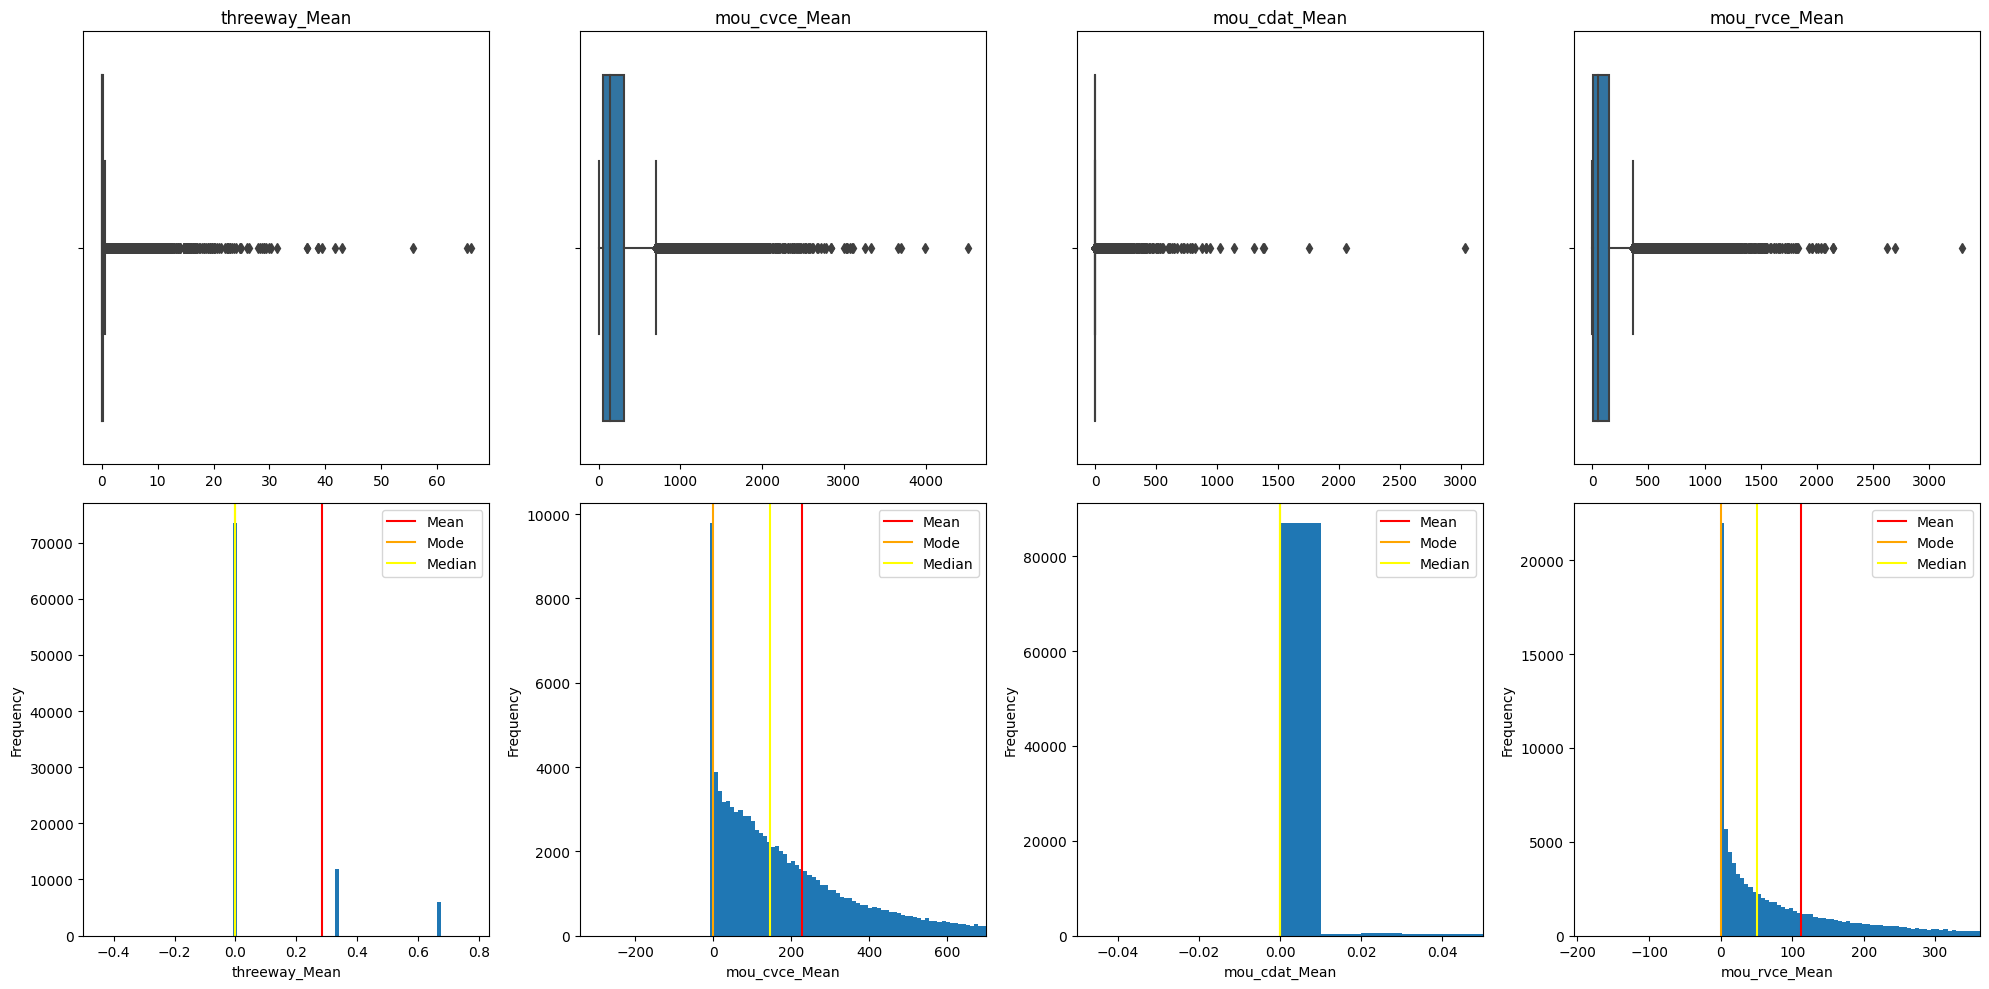

In [184]:
#plot histogram and box plot for the above explained columns
plot_cont_cols_IQR_list(cont_cols_to_plot_5,100)

In [185]:
# #find the value count of the column
df['mou_cdat_Mean'].value_counts()

0.000000      86607
0.016667        322
0.023333        311
0.033333        233
0.026667        233
              ...  
21.266667         1
281.556667        1
16.543333         1
41.103333         1
44.520000         1
Name: mou_cdat_Mean, Length: 4420, dtype: int64

86 percentage of values in column are zero,other values are very low percentage , so we can drop this column.

In [ ]:
# #drop the column
# df.drop('mou_cdat_Mean',axis=1,inplace=True)

Lets consider sixth list of 4 columns,and plot their histogram and box plot.'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean thse are the 4 columns plotted below.Lets try to understand what does each of these columns represent.



**46)owylis_vce_Mean**
- The owylis_vce_Mean column represents mean number of outbound wireless to wireless voice calls.Outbound wireless to wireless voice calls refers to voice calls made by a customer using their mobile phone (wireless device) to another mobile phone (also a wireless device). These calls occur between two mobile devices connected to a wireless network, such as a cellular network provided by a telecom service provider.
In the context of the telecom sector, understanding the volume and patterns of outbound wireless to wireless voice calls can help service providers analyze customer behavior, preferences, and usage habits. This information can then be used to develop tailored voice plans, promotional offers, or service improvements that cater to the specific needs of customers, ultimately enhancing customer satisfaction and reducing churn.

**47)mouowylisv_Mean**
- The mouowylisv_Mean column represents the average monthly minutes of use (MOU) for outbound wireless to wireless voice calls. In other words, this column shows the average number of minutes a customer spends on voice calls made from their mobile phone to another mobile phone within a given month.
In a telecom churn prediction dataset, the mouowylisv_Mean column can be useful for analyzing customer behavior related to voice call usage. High or low average minutes of use for outbound wireless to wireless voice calls can provide insights into customer preferences and habits. 

**48)iwylis_vce_Mean'**
- The iwylis_vce_Mean column represents the average monthly minutes of use (MOU) for inbound wireless to wireless voice calls. In other words, this column shows the average number of minutes a customer spends on voice calls received on their mobile phone from another mobile phone within a given month.

**49)mouiwylisv_Mean**
- The mouiwylisv_Mean column represents mean unrounded minutes of use of inbound wireless to wireless calls.The average monthly minutes of use (MOU) for inbound wireless to wireless voice calls .

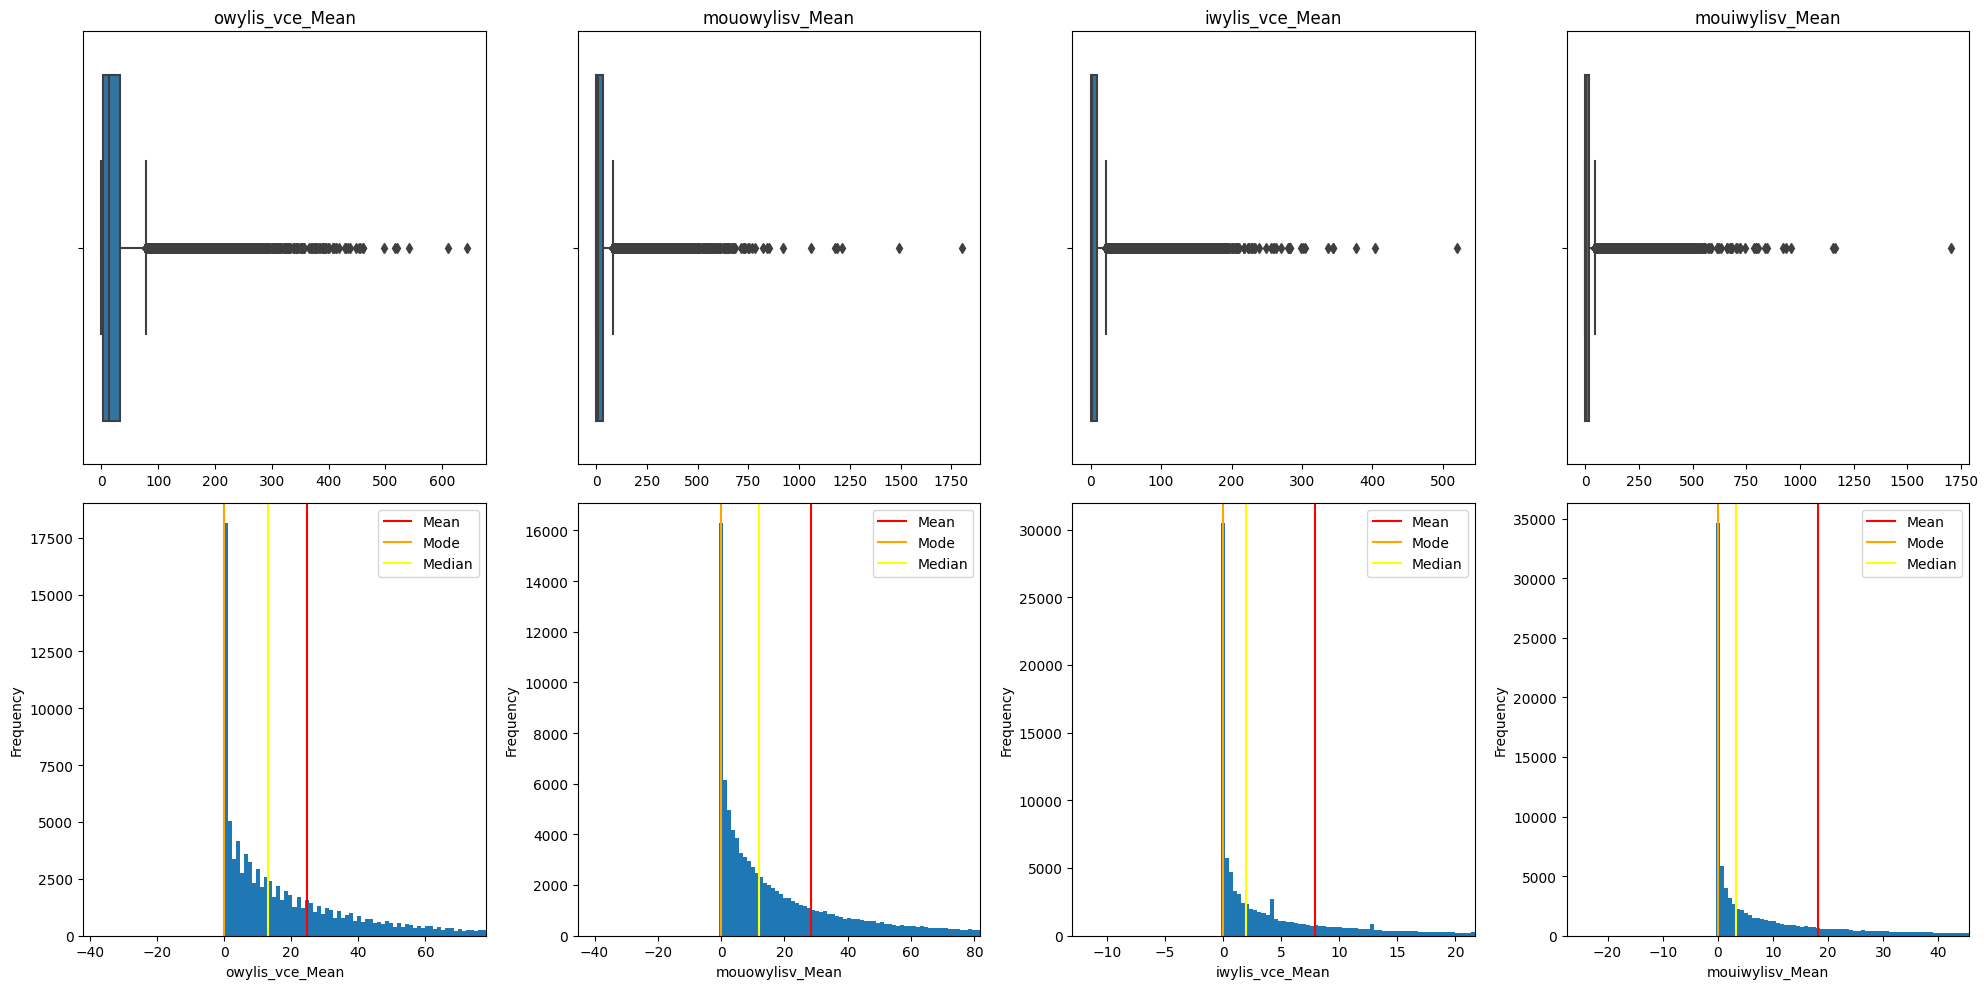

In [186]:
#plot histogram and box plot for the above explained columns
plot_cont_cols_IQR_list(cont_cols_to_plot_6,100)

Lets consider sixth list of 4 columns,and plot their histogram and box plot.''peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean' thse are the 4 columns plotted below.Lets try to understand what does each of these columns represent.

**50)peak_vce_Mean**
- The peak_vce_Mean column represents the average monthly minutes of use (MOU) for peak voice calls. Peak voice calls are calls made during the busiest hours of the day, typically when the network usage is at its highest. These hours are usually during daytime business hours and early evenings.
 The peak_vce_Mean column can be helpful in analyzing customer behavior related to voice call usage during peak hours. Understanding customers' average minutes of use for peak voice calls can provide insights into their calling preferences and habits, as well as their sensitivity to network congestion and call quality during peak hours.
 Telecom service providers can use this information to optimize network capacity and performance during peak hours, create tailored plans that offer better value for customers who make most of their calls during peak hours, and ultimately improve customer satisfaction and reduce the chances of customer churn.

**51)peak_dat_Mean**
- The peak_dat_Mean column represents the average monthly data usage (in megabytes or gigabytes) during peak hours. Peak hours are the times of the day when the network usage is at its highest, typically during daytime business hours and early evenings.
 The peak_dat_Mean column can be valuable for analyzing customer behavior related to data usage during peak hours. Understanding customers' average data usage during these busy times can provide insights into their preferences and habits, as well as their sensitivity to network congestion and data speeds during peak hours.

**52)mou_peav_Mean**
- The mou_peav_Mean column represents mean unrounded minutes of use of peak voice calls.This column provides information about the average amount of voice call usage during peak hours when the network is most congested.
The mou_peav_Mean column can be essential for understanding customer behavior related to voice call usage during peak hours. Analyzing the average voice usage during peak hours helps identify customers who are most likely to be affected by network congestion, call quality issues, or high call rates during peak hours.

**53)mou_pead_Mean**
- The mou_pead_Mean column represents mean unrounded minutes of use of  data usage (in megabytes) of customers. This column provides information about the average amount of data usage during peak hours when the network is most congested.
 the mou_pead_Mean column can be essential for understanding customer behavior related to data usage during peak hours. Analyzing the average data usage during peak hours helps identify customers who are most likely to be affected by network congestion, slow data speeds, or high data rates during peak hours.



<ipython-input-166-05aff3e26757>:36: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1, idx].set_xlim(lower_bound, upper_bound)
<ipython-input-166-05aff3e26757>:36: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1, idx].set_xlim(lower_bound, upper_bound)


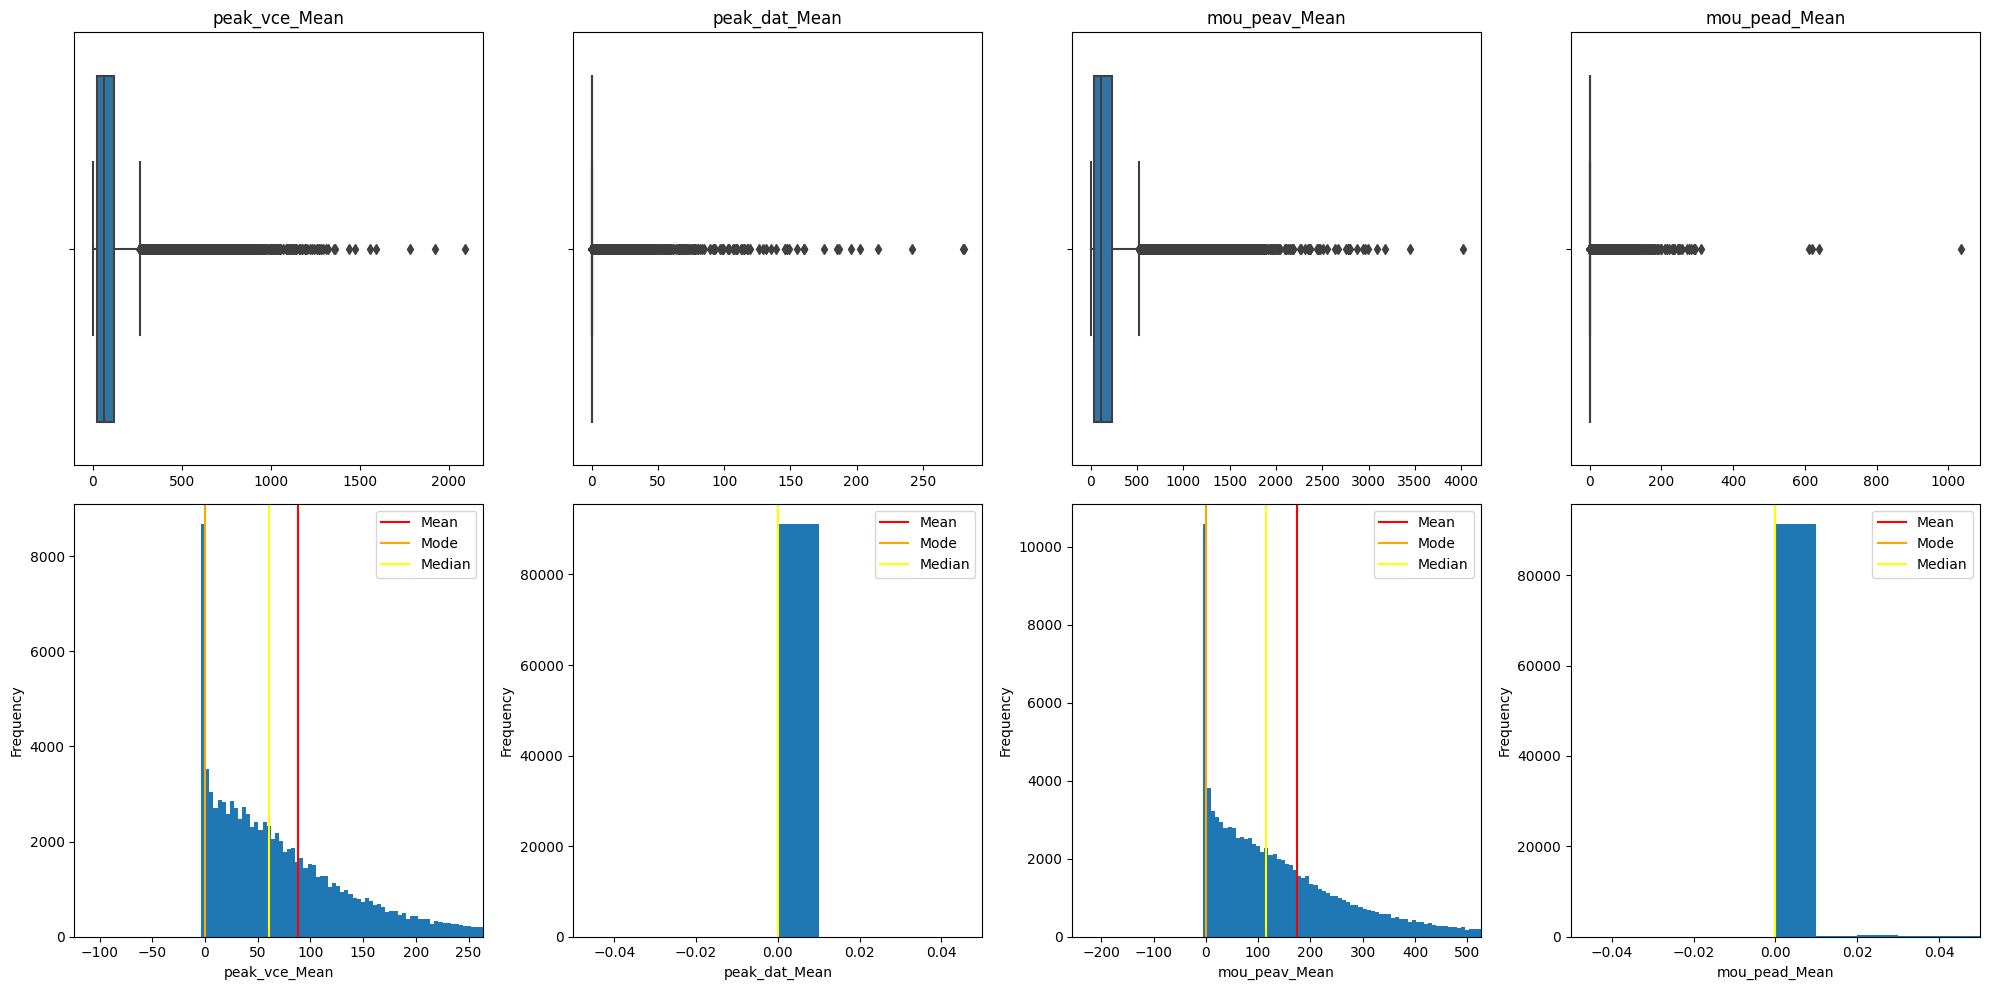

In [187]:
#plot histogram and box plot for the above explained columns
plot_cont_cols_IQR_list(cont_cols_to_plot_7,100)

In [188]:
df['mou_pead_Mean'].value_counts()

0.000000     91060
0.016667       218
0.023333       207
0.026667       163
0.033333       147
             ...  
75.500000        1
4.293333         1
38.510000        1
16.083333        1
21.923333        1
Name: mou_pead_Mean, Length: 3168, dtype: int64

In [189]:
#delete mou_pead_Mean column since 91 percentage value is same,all other values are present in very small percentage
df.drop('mou_pead_Mean',axis=1,inplace=True)

Lets consider next list of 4 columns,and plot their histogram and box plot.'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean thse are the 4 columns plotted below.Lets try to understand what does each of these columns represent.



**54)opk_vce_Mean**
- The opk_vce_Mean column represents mean number  of off-peak voice calls. This column provides information about the average number of voice call usage during off-peak hours, which are typically periods when the network is less congested and call rates may be lower.
 the opk_vce_Mean column can be useful for understanding customer behavior related to voice call usage during off-peak hours. Analyzing the average voice call usage during off-peak hours helps identify customers who are more likely to take advantage of lower call rates and less congested networks during these periods.
 Telecom service providers can use this information to optimize network capacity and performance during off-peak hours, offer special pricing plans or promotions targeting customers with high off-peak voice usage, and ultimately improve customer satisfaction and reduce the likelihood of customer churn.

**55)opk_dat_Mean**
- The opk_dat_Mean column represents the mean of off-peak data usage (in megabytes or gigabytes) for customers. This column provides information about the average amount of data usage during off-peak hours, which are typically periods when the network is less congested and data rates may be lower.
 the opk_dat_Mean column can be useful for understanding customer behavior related to data usage during off-peak hours. Analyzing the average data usage during off-peak hours helps identify customers who are more likely to take advantage of lower data rates and less congested networks during these periods.

**56)mou_opkv_Mean**
- The mou_opkv_Mean column represents the mean of off-peak voice call minutes of use (MOU) for customers. This column provides information about the average duration of voice calls made by customers during off-peak hours, which are typically periods when the network is less congested, and call rates may be lower.

**57)mou_opkd_Mean**
- The mou_opkd_Mean column represents the mean of off-peak data minutes of use (MOU) for customers. This column provides information about the average duration of data usage by customers during off-peak hours. Off-peak hours are typically periods when the network is less congested, and data rates may be lower.
 the mou_opkd_Mean column can be useful for understanding customer behavior related to data usage during off-peak hours. Analyzing the average data usage duration during off-peak hours helps identify customers who are more likely to take advantage of lower data rates and less congested networks during these periods.



<ipython-input-166-05aff3e26757>:36: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1, idx].set_xlim(lower_bound, upper_bound)
<ipython-input-166-05aff3e26757>:36: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1, idx].set_xlim(lower_bound, upper_bound)


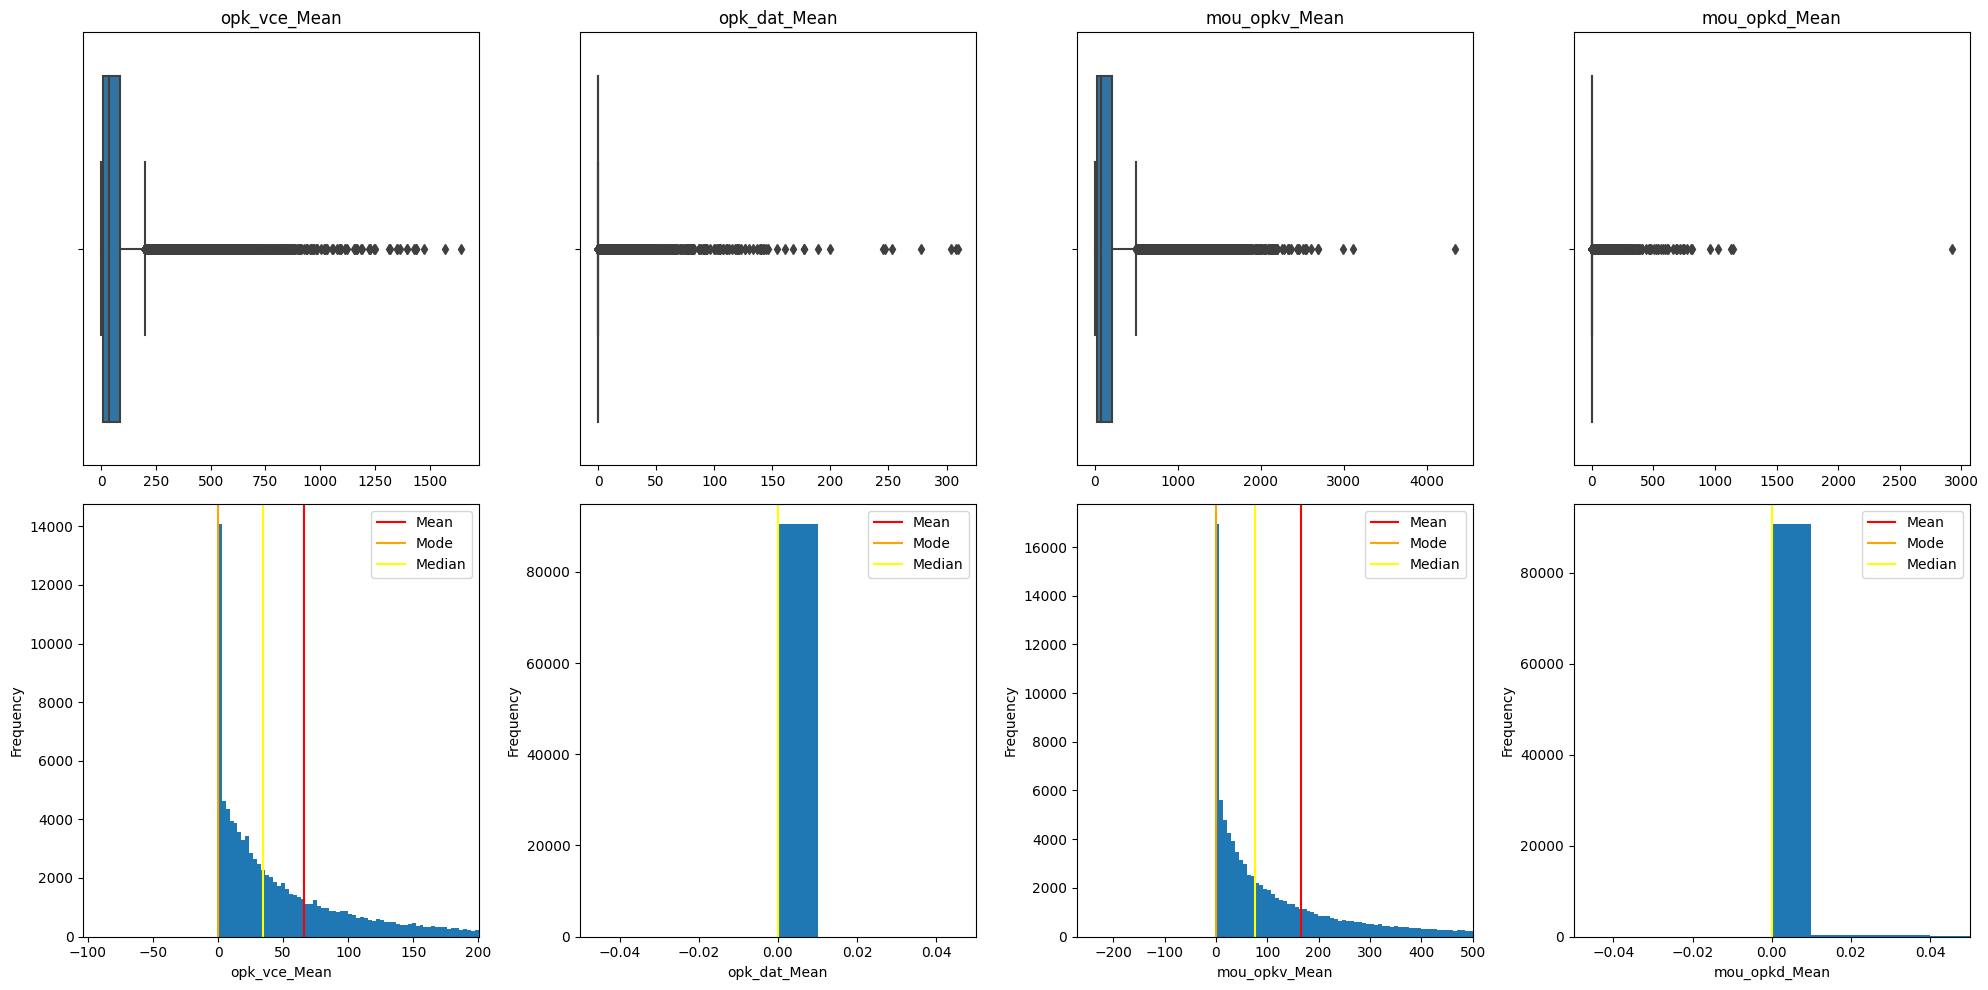

In [190]:
#plot histogram and box plot for the above explained columns
plot_cont_cols_IQR_list(cont_cols_to_plot_8,100)

In [191]:
df['opk_dat_Mean'].value_counts()

0.000000      90394
0.333333       3381
0.666667       1724
1.000000        742
1.333333        607
              ...  
252.666667        1
67.333333         1
107.666667        1
49.333333         1
92.333333         1
Name: opk_dat_Mean, Length: 257, dtype: int64

In [192]:
df['mou_opkd_Mean'].value_counts()

0.000000      90382
0.016667        212
0.023333        199
0.010000        153
0.026667        153
              ...  
67.346667         1
119.696667        1
27.460000         1
47.896667         1
12.723333         1
Name: mou_opkd_Mean, Length: 3539, dtype: int64

The opk_dat_Mean and mou_opkd_Mean columns represent similar information about off-peak data usage, but they are not necessarily the same. opk_dat_Mean represents the mean data usage during off-peak hours, while mou_opkd_Mean represents the mean minutes of data usage during off-peak hours.
 both columns have approximately 90% of their values as zero, this suggests that a significant portion of customers either do not use data during off-peak hours or their usage is minimal. In this case, the information provided by these columns may not be particularly helpful for identifying patterns related to customer churn.

Before deciding to drop either of the columns, it is important to perform a correlation analysis to determine if there is a strong relationship between these two columns. If the correlation is high, it may be justifiable to drop one of the columns, as the remaining column would capture most of the information needed.


Lets consider next list of 4 columns,and plot their histogram and box plot.''drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean' thse are the 4 columns plotted below.Lets try to understand what does each of these columns represent.

**58)drop_blk_Mean'**
- The drop_blk_Mean columnrepresents number of dropped and blocked calls a customer experiences. Dropped calls are calls that were unexpectedly disconnected during the call, while blocked calls are calls that could not be connected due to network issues or other factors.
 This column can provide valuable information about customer experience and network quality, which can influence a customer's decision to churn or not. High numbers of dropped or blocked calls might indicate poor service quality and lead to customer dissatisfaction, increasing the likelihood of churn. 

**59)'attempt_Mean**
- The attempt_Mean column represents the mean number of call attempts made by a customer. This column provides information about the customer's usage pattern and the level of activity on the telecom network.
 Analyzing this column can help to identify customers who are more active and make more call attempts, potentially indicating higher engagement with the telecom service. In combination with other columns, such as call success rate or dropped calls, it can provide insights into the overall customer experience and potentially help predict churn. Customers who make many call attempts but face issues like dropped or blocked calls may be more likely to churn due to dissatisfaction with the service quality.

**60)complete_Mean**
- The complete_Mean column represents the mean number of completed calls made by a customer. This column provides information about the customer's call success rate and their satisfaction with the telecom service.

 Analyzing this column can help identify customers with higher call completion rates, indicating a better overall experience with the telecom service. In combination with other columns, such as call attempts or dropped calls, it can provide insights into the quality of the service provided to the customer. A low call completion rate may indicate issues with the service, such as poor network coverage or call quality, which could lead to customer churn. On the other hand, customers with a high call completion rate may be more satisfied with the service and less likely to churn.

**61)callfwdv_Mean**
- The callfwdv_Mean column in the customer churn prediction dataset for the telecom sector represents the mean number of call forwarding events per customer. Call forwarding is a feature that allows users to redirect incoming calls to another phone number or voicemail.
 This column can provide insights into the usage pattern of the call forwarding feature among customers. Customers who frequently use call forwarding might have different needs or preferences compared to those who rarely use it. By analyzing the call forwarding usage data along with other columns, it may be possible to identify patterns or trends that could indicate customer satisfaction or dissatisfaction with the service. In some cases, high usage of call forwarding could be an indicator of potential churn, especially if it's combined with other factors like poor network coverage or call quality.

<ipython-input-166-05aff3e26757>:36: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1, idx].set_xlim(lower_bound, upper_bound)


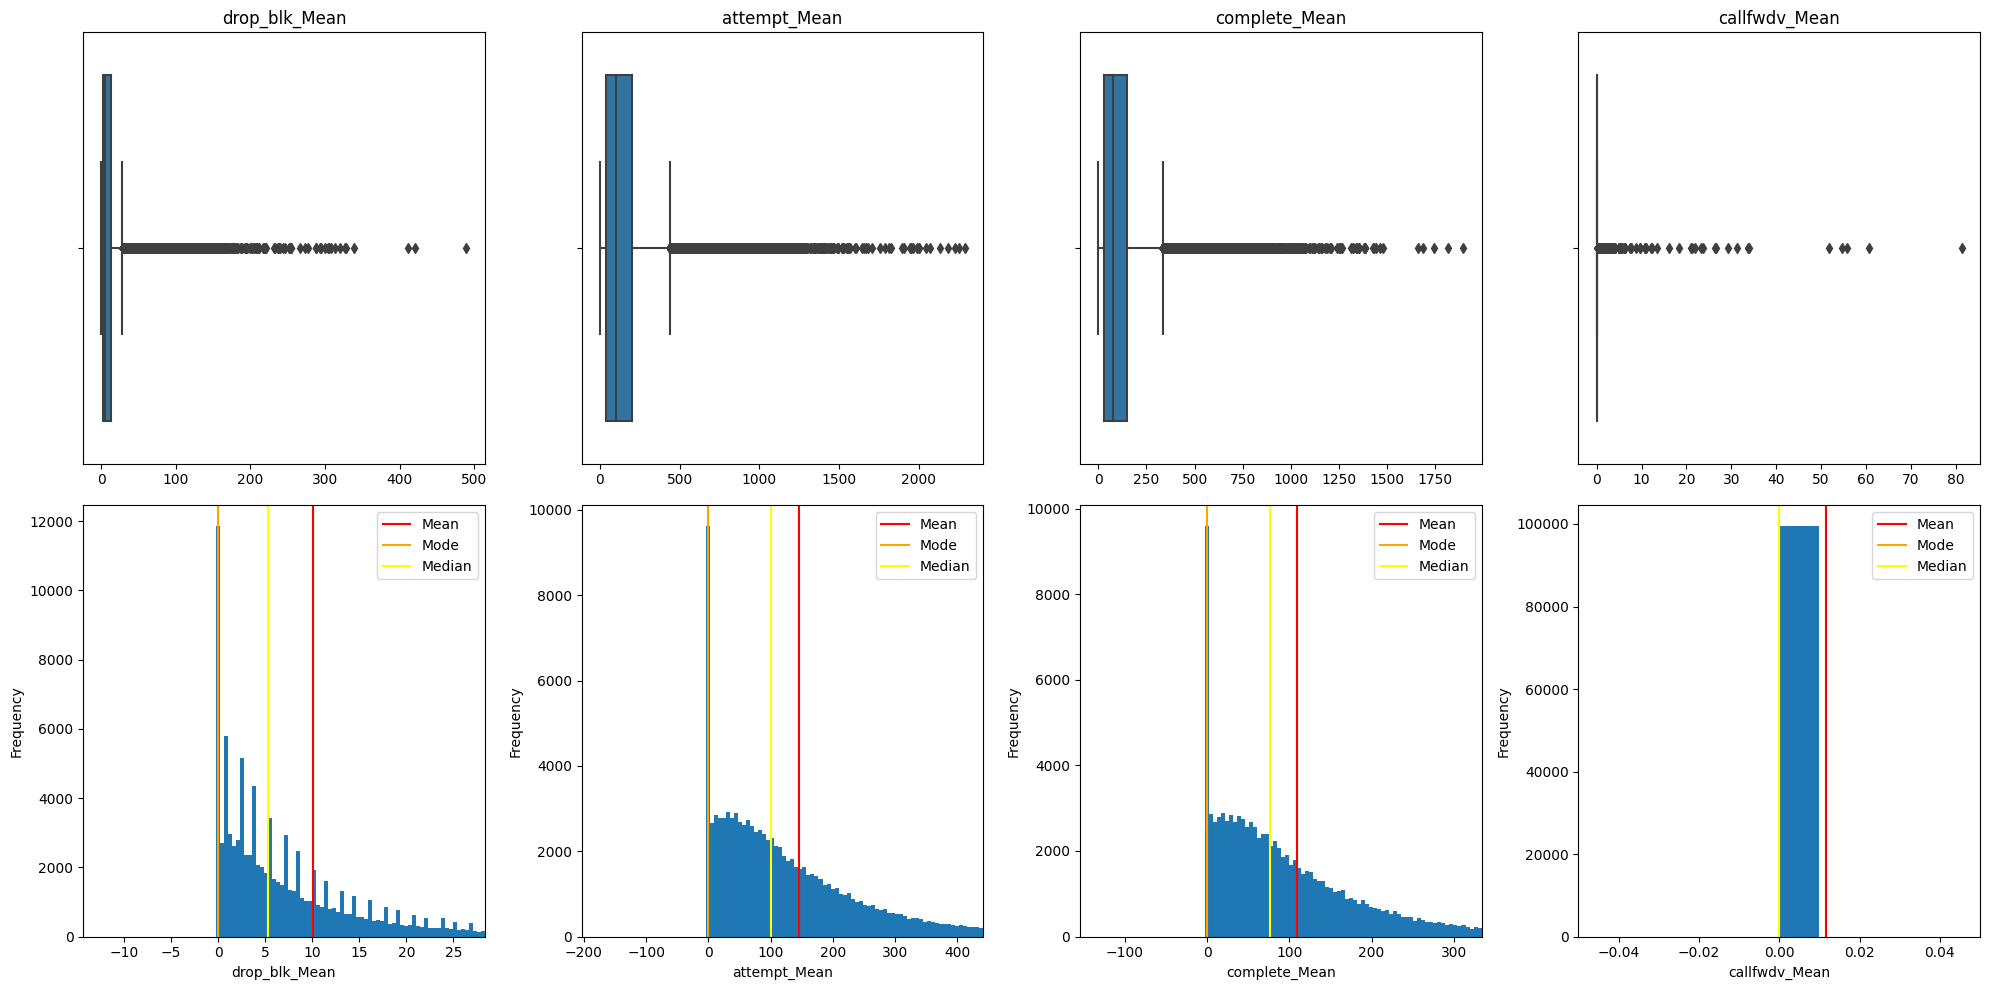

In [193]:
#plot histogram and box plot for the above explained columns
plot_cont_cols_IQR_list(cont_cols_to_plot_9,100)

In [194]:
#checking count of values in the column
df['callfwdv_Mean'].value_counts()

0.000000     99567
0.333333       182
0.666667        96
1.000000        30
1.333333        20
2.000000        16
2.333333        13
1.666667         8
2.666667         7
3.666667         6
5.333333         5
3.000000         4
3.333333         4
5.000000         4
10.666667        3
5.666667         2
7.666667         2
9.666667         2
6.333333         2
4.000000         2
22.000000        1
23.333333        1
12.000000        1
54.666667        1
21.333333        1
21.000000        1
55.666667        1
81.333333        1
18.333333        1
12.333333        1
8.666667         1
29.333333        1
11.000000        1
16.000000        1
31.333333        1
34.000000        1
23.666667        1
26.333333        1
51.666667        1
7.333333         1
26.666667        1
33.666667        1
60.666667        1
13.333333        1
6.000000         1
Name: callfwdv_Mean, dtype: int64

In this column 99 percentage of values are same (which is 0) so according to distribution of target(we have 50 percentage samples from churn and 50 from not churn) this column is not adding any information.So we can drop this column.

In [195]:
#drop the column
df.drop('callfwdv_Mean',axis=1,inplace=True)

Lets consider next list of 4 columns,and plot their histogram and box plot.'callwait_Mean', 'months', 'uniqsubs', 'actvsubs these are the 4 columns plotted below.Lets try to understand what does each of these columns represent.



**62)callwait_Mean**
- The callwait_Mean column represents the mean number of call waiting events per customer. Call waiting is a feature that allows users to be notified of incoming calls while they are already on an active call, giving them the option to answer the new call or continue with the current one.
 This column can provide insights into the usage pattern of the call waiting feature among customers. Customers who frequently use call waiting might have different needs or preferences compared to those who rarely use it. By analyzing the call waiting usage data along with other columns, it may be possible to identify patterns or trends that could indicate customer satisfaction or dissatisfaction with the service. In some cases, high usage of call waiting could be an indicator of potential churn, especially if it's combined with other factors like poor network coverage or call quality.

**63)months**
- The months column represents the number of months that a customer has been with the company or the length of the customer's tenure. This column is important because it can help identify patterns related to customer loyalty and satisfaction.
 Generally, customers who have been with a company for a longer period of time are more likely to be satisfied with the service and less likely to churn. However, there may be other factors at play, such as changing market conditions, customer preferences, or competitive offers, that could impact the relationship between the length of tenure and customer churn. Analyzing the months column along with other features can provide valuable insights into customer behavior and help identify potential areas for improvement in customer retention strategies.

**64)uniqsubs**
- uniqsubs is a column represents the number of unique subscribers on a customer's account. It indicates how many separate phone lines the customer has with the telecom service provider.

**65)actvsubs**
- the actvsubs column represents the number of active subscribers for each customer. It indicates how many active lines the customer has with the telecom company at the time the data was collected.

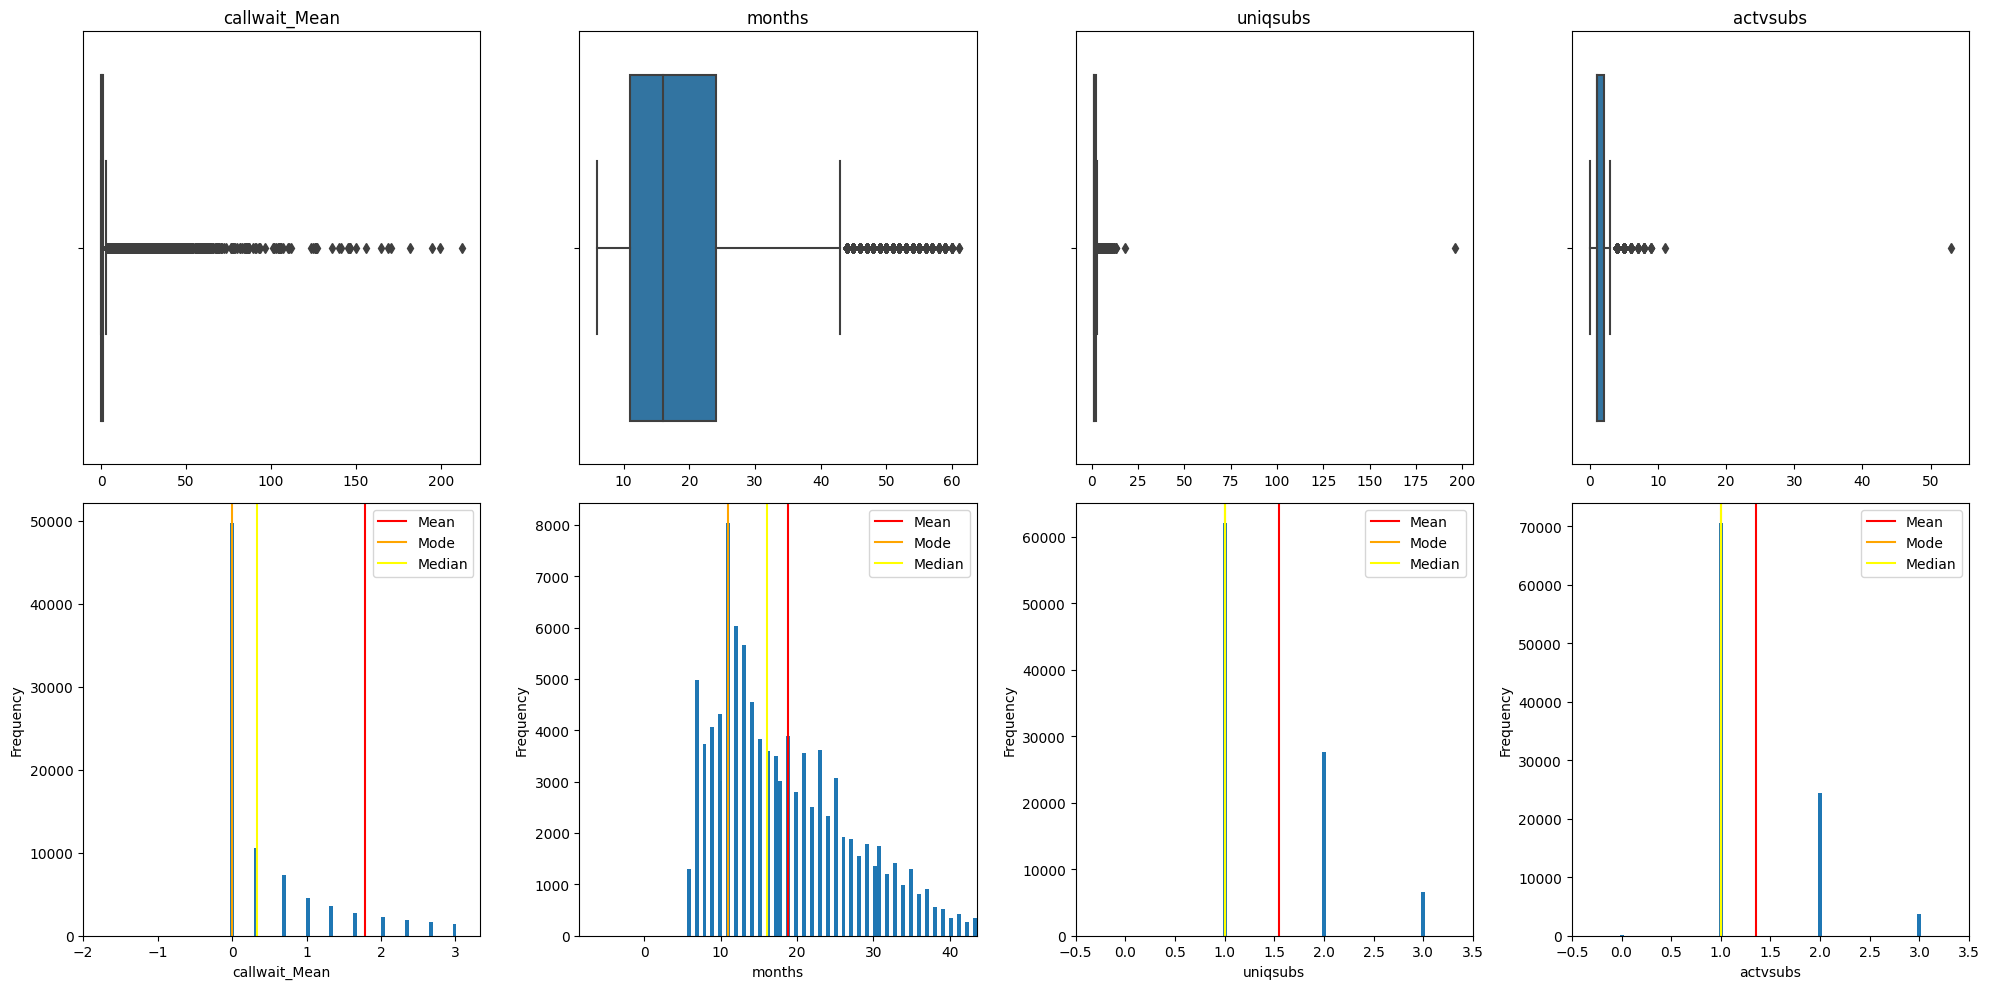

In [196]:
#plot histogram and box plot for the above explained columns
plot_cont_cols_IQR_list(cont_cols_to_plot_10,100)

Lets consider next list of 4 columns,and plot their histogram and box plot.'totcalls', 'totmou', 'totrev', 'adjrev' these are the 4 columns plotted below.Lets try to understand what does each of these columns represent.

**66)totcalls**
- totcalls in the customer churn dataset refers to the total number of calls made by a customer.

**67)totmou**
- totmou represents the total monthly minutes of usage, which is the total number of minutes a customer has used for all types of calls (incoming, outgoing, wireless to wireless, etc.).

**68)totrev**
- The column totrev represents the total revenue generated by the customer over their entire tenure with the company.

**69)adjrev**
-  it is the total revenue from the customer adjusted for certain factors, such as discounts or refunds. 

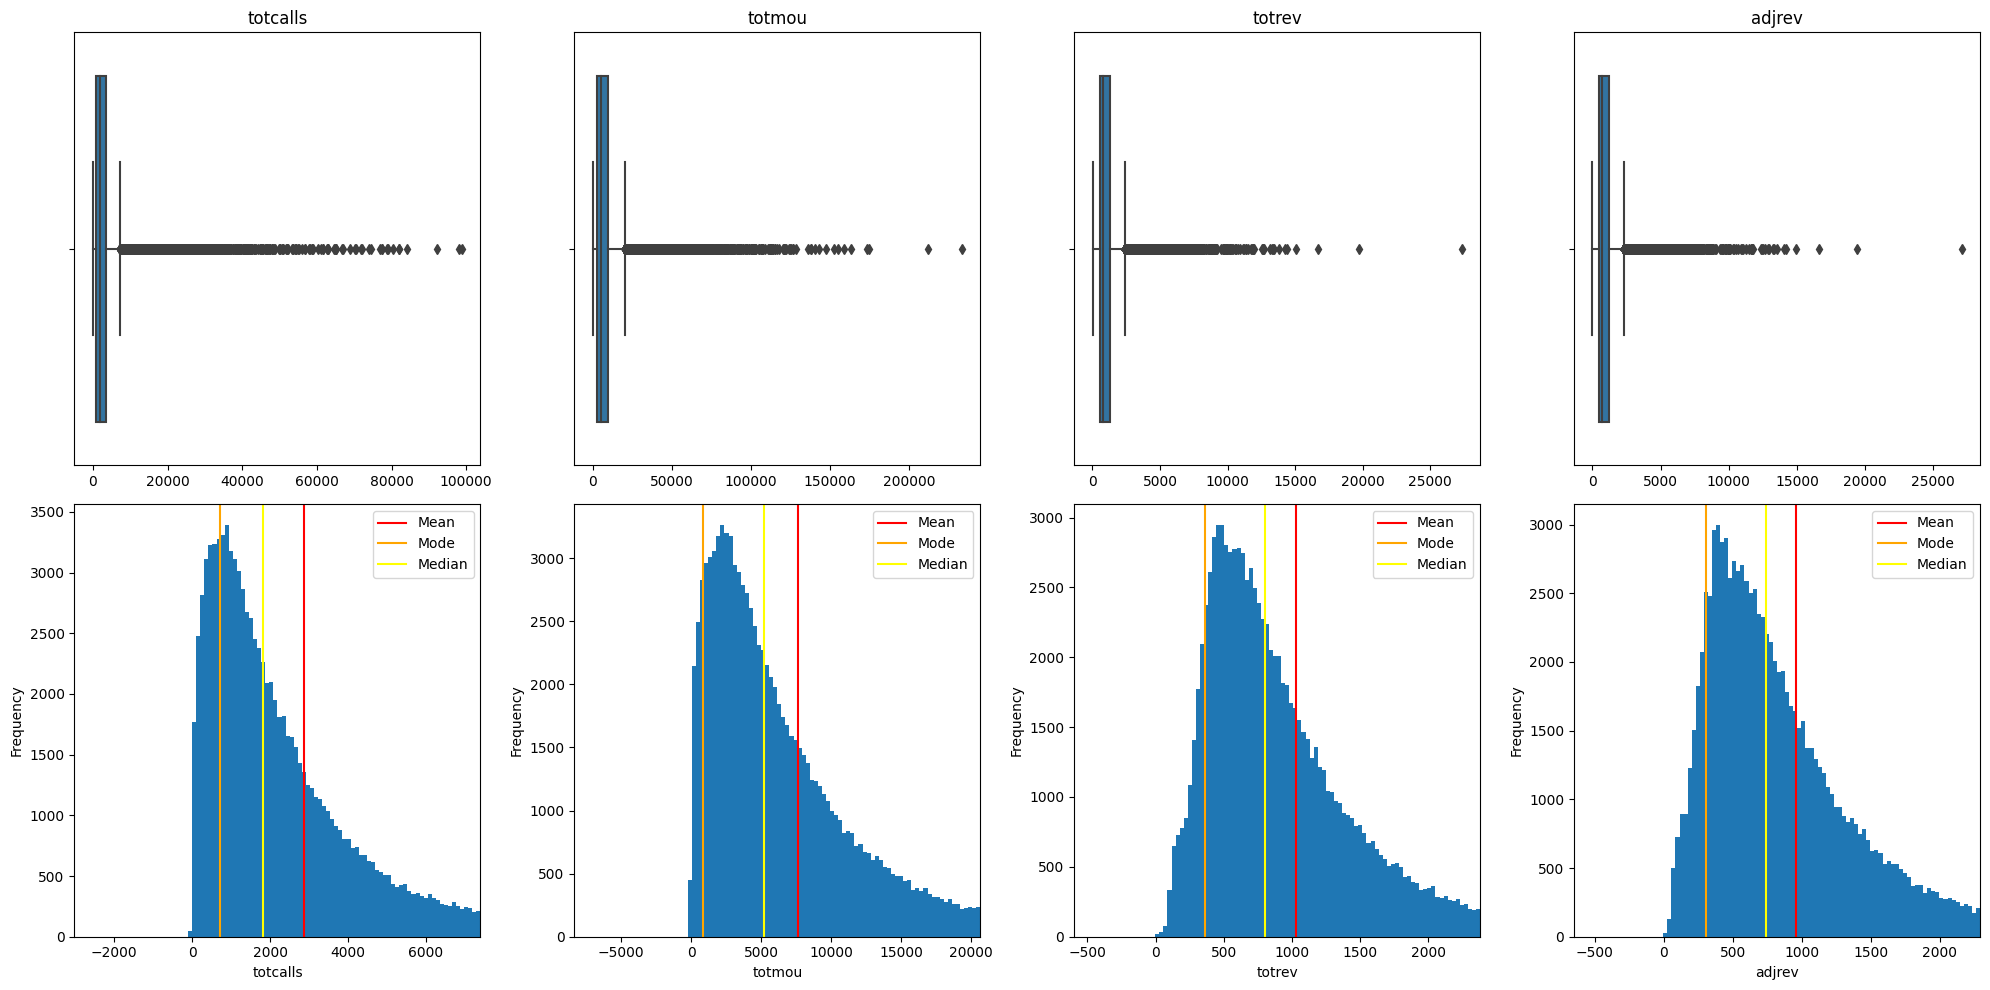

In [197]:
#plot histogram and box plot for the above explained columns
plot_cont_cols_IQR_list(cont_cols_to_plot_11,100)

Lets consider next list of 4 columns,and plot their histogram and box plot.'adjmou', 'adjqty', 'avgrev', 'avgmou these are the 4 columns plotted below.Lets try to understand what does each of these columns represent.

**70)adjmou**
- column refers to the adjusted number of minutes of use for each customer. This means that certain adjustments have been made to the raw minutes of use data, such as removing minutes that were not used for voice calls or that were used during off-peak hours. The adjusted minutes of use may provide a more accurate representation of the customer's usage behavior.

**71)adjqty**
- column represents the adjusted quantity of calls made by a customer. It takes into account the duration of each call and calculates the number of calls based on a standard duration.

**72)avgrev**
- This represents average monthly revenue over the life of the customer

**73)avgmou**
- The avgmou column, representing the average number of minutes of usage per month , can potentially affect churn in a few ways.

 First, if customers are not using their phone service frequently, they may be less likely to perceive its value and therefore more likely to churn. On the other hand, if customers are using their phone service frequently, they may be more invested in the service and less likely to churn.

 Second, if customers are using their phone service more than expected (based on their plan), they may incur additional charges and be dissatisfied with their bill, which could increase churn.

 Therefore, avgmou could be an important predictor of churn and may be included as a feature in a churn prediction model.

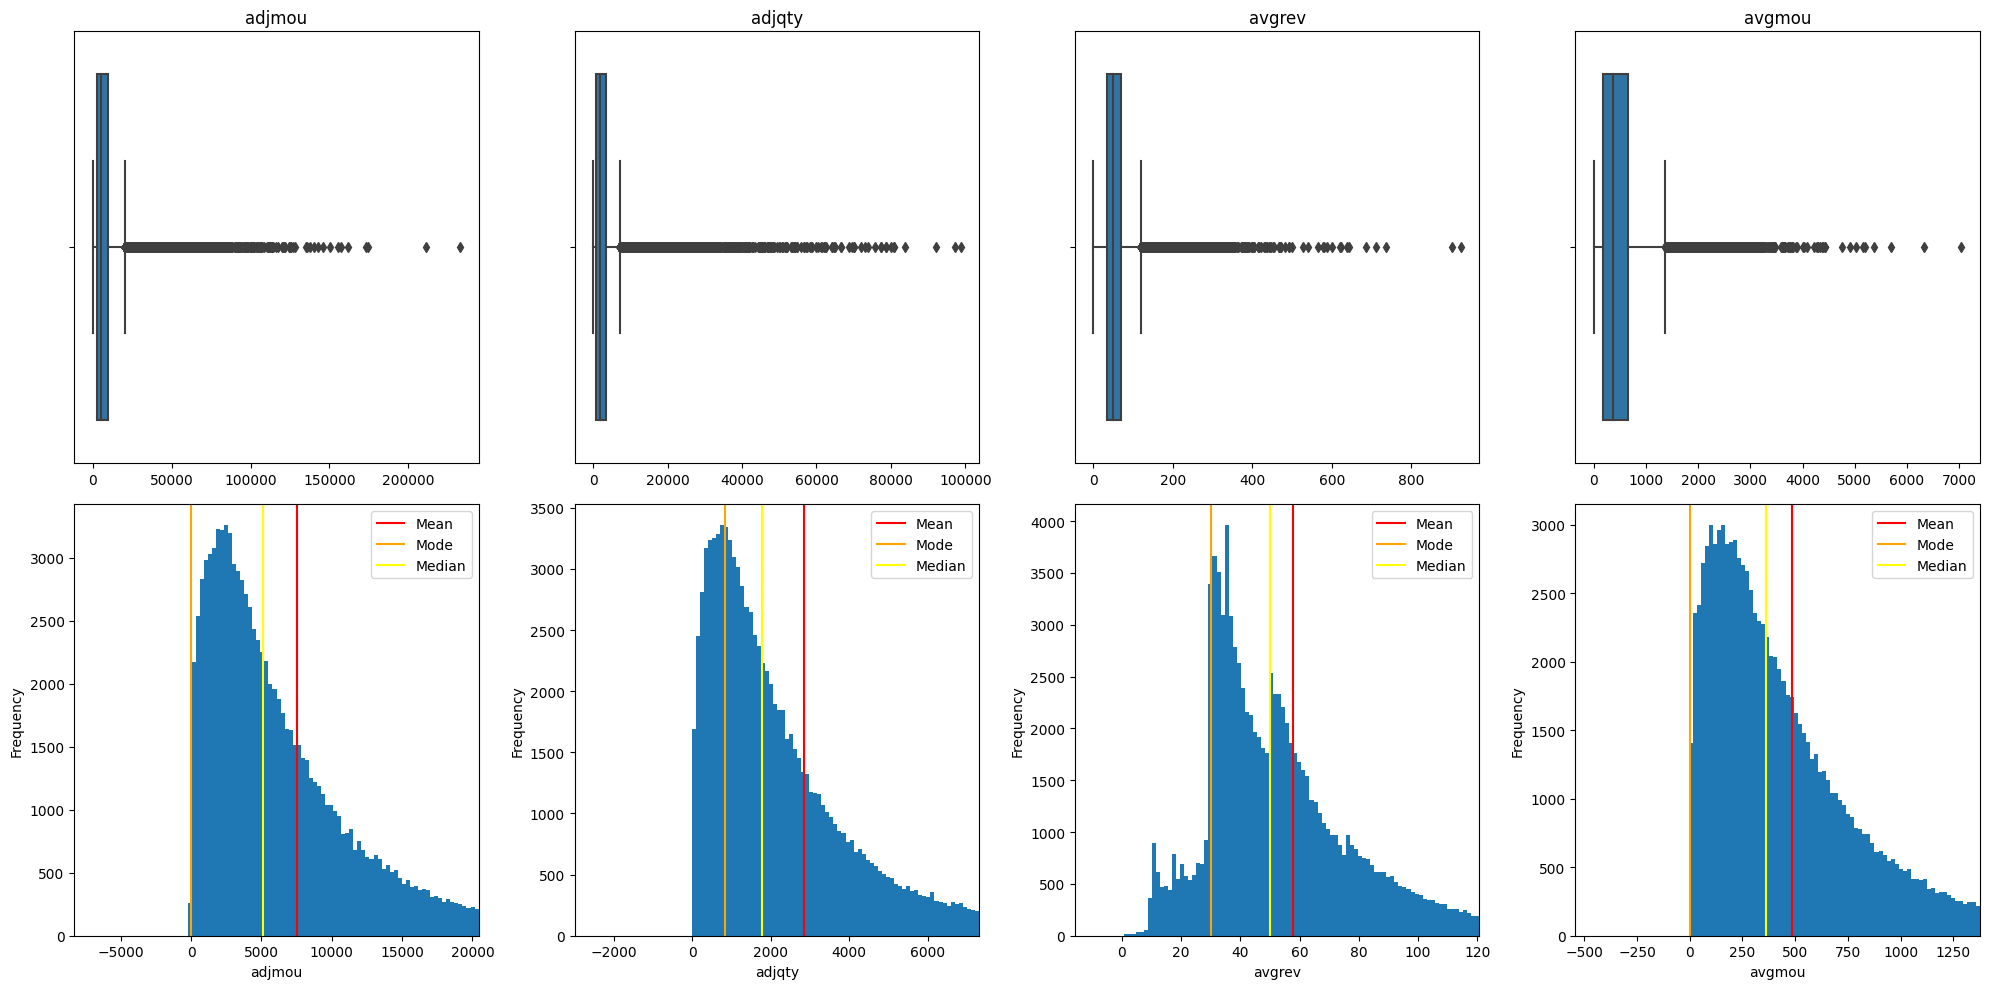

In [198]:
#plot histogram and box plot for the above explained columns
plot_cont_cols_IQR_list(cont_cols_to_plot_12,100)

Lets consider next list of 4 columns,and plot their histogram and box plot.'avgqty', 'avgmou', 'avgqty', 'avgrev these are the 4 columns plotted below.Lets try to understand what does each of these columns represent

**74)avgqty**
- The average monthly number of voice calls over the life of a customer.It may affect churn in several ways.

 Firstly, if the average number of voice calls is low, it may indicate that the customer is not utilizing the service to its full potential, and may not see the value in continuing to pay for it. This could increase the likelihood of churn.
 On the other hand, if the average number of voice calls is high, it may indicate that the customer is heavily reliant on the service and may be more likely to stay with the provider. However, this may also increase the risk of churn if the customer is dissatisfied with the quality of service or finds a better deal with a competitor.

**75)avg3mou**
- avgmou is a column that represents the average number of minutes of usage over last 3 months for all types of calls. The column can potentially affect churn in a few ways:

 Customers who have a high average 3 monthls usage may be more likely to churn if they are unable to find a plan that offers enough minutes to meet their needs.
Customers who have a low average 3 months usage may be more likely to churn if they feel that they are paying too much for a plan that offers more minutes than they need.
Changes in average 3 months usage over time may also indicate changes in customer behavior, which could be a signal for potential churn. For example, if a customer's average 3 months usage suddenly decreases, it could indicate that they are using a competitor's service more often or that they are less satisfied with the current service.

**76)avg3qty**
- average monthly number of call over previous 3 months

**77)avg3rev**
- average monthly revenue over past 3 months

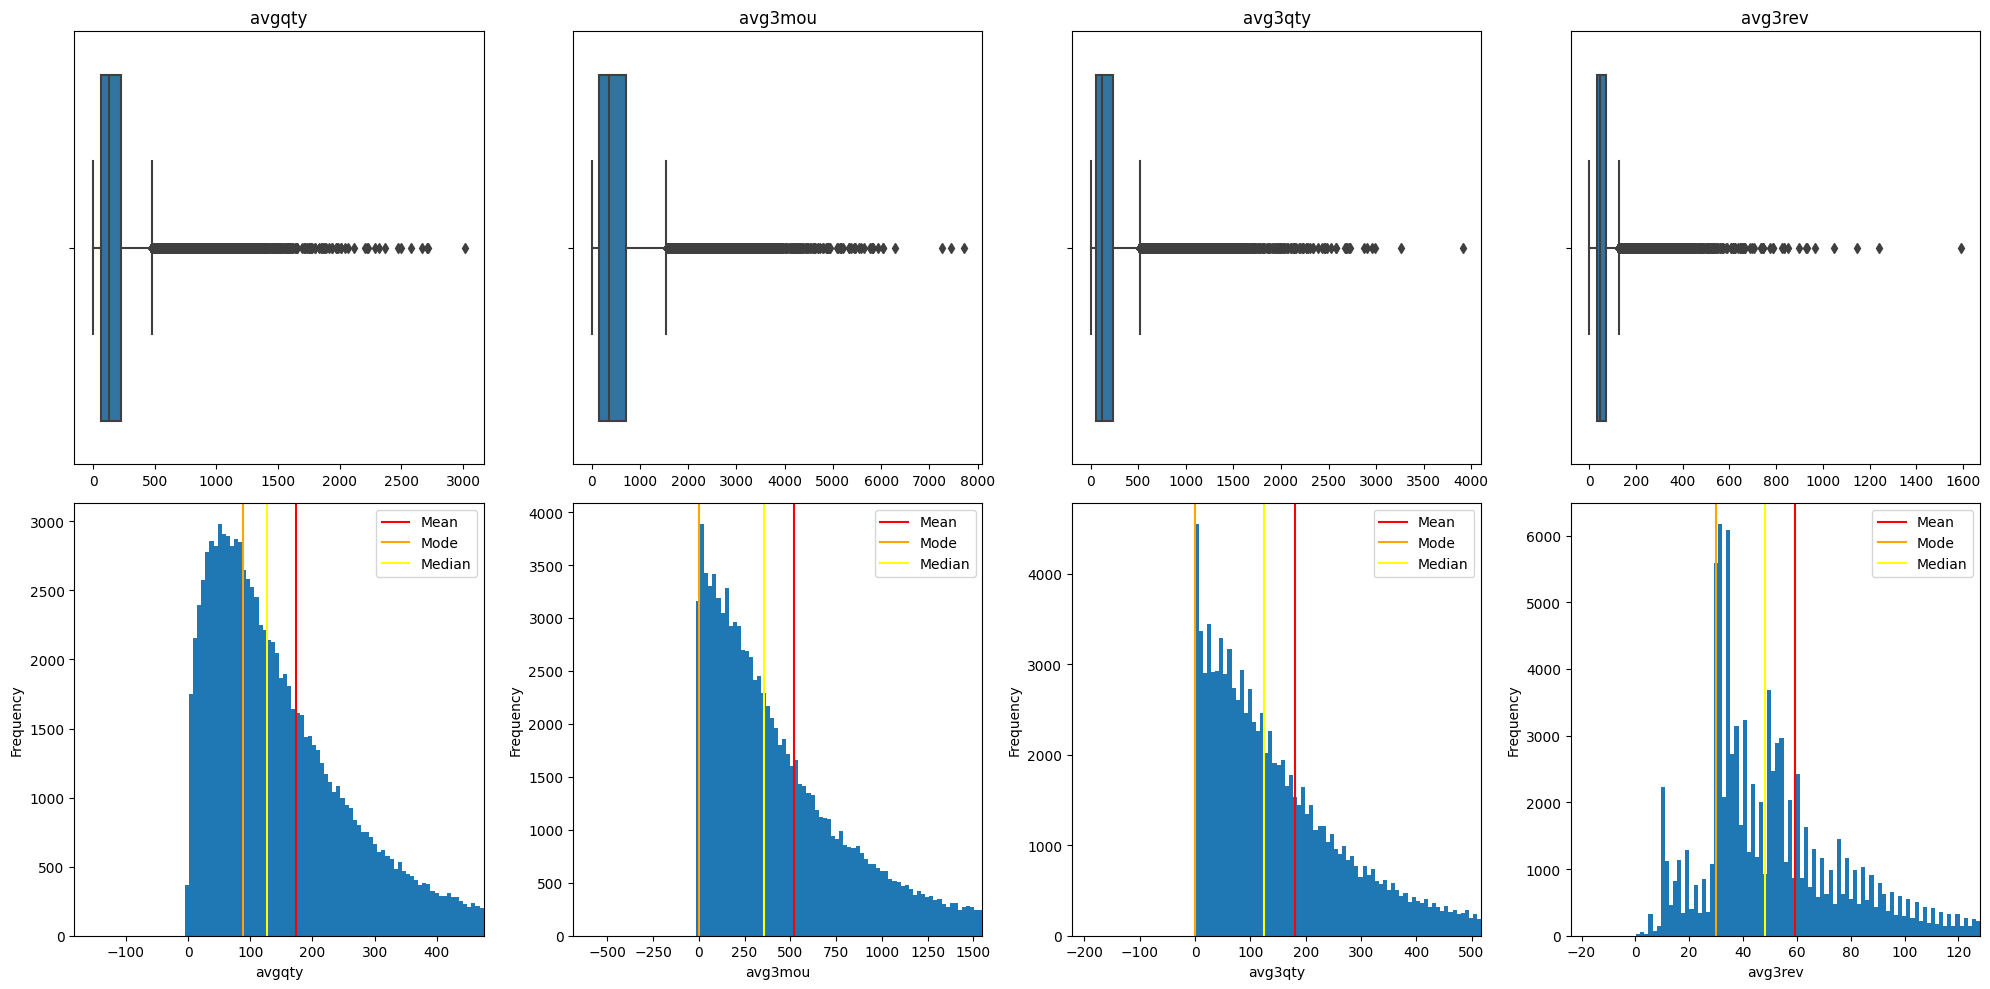

In [199]:
#plot histogram and box plot for the above explained columns
plot_cont_cols_IQR_list(cont_cols_to_plot_13,100)

Lets consider next list of 3 columns,and plot their histogram and box plot.avgmou', 'avgqty', 'avgrev' these are the 3 columns plotted below.Lets try to understand what does each of theese columns represent

**78)avg6qty** 
- average monthly number of call over previous 6 months

**79)avg6mou** 
- avgmou is a column that represents the average number of minutes of usage over last 6 months for all types of calls 

**80)avg6rev**
- average monthly revenue over past 6 months

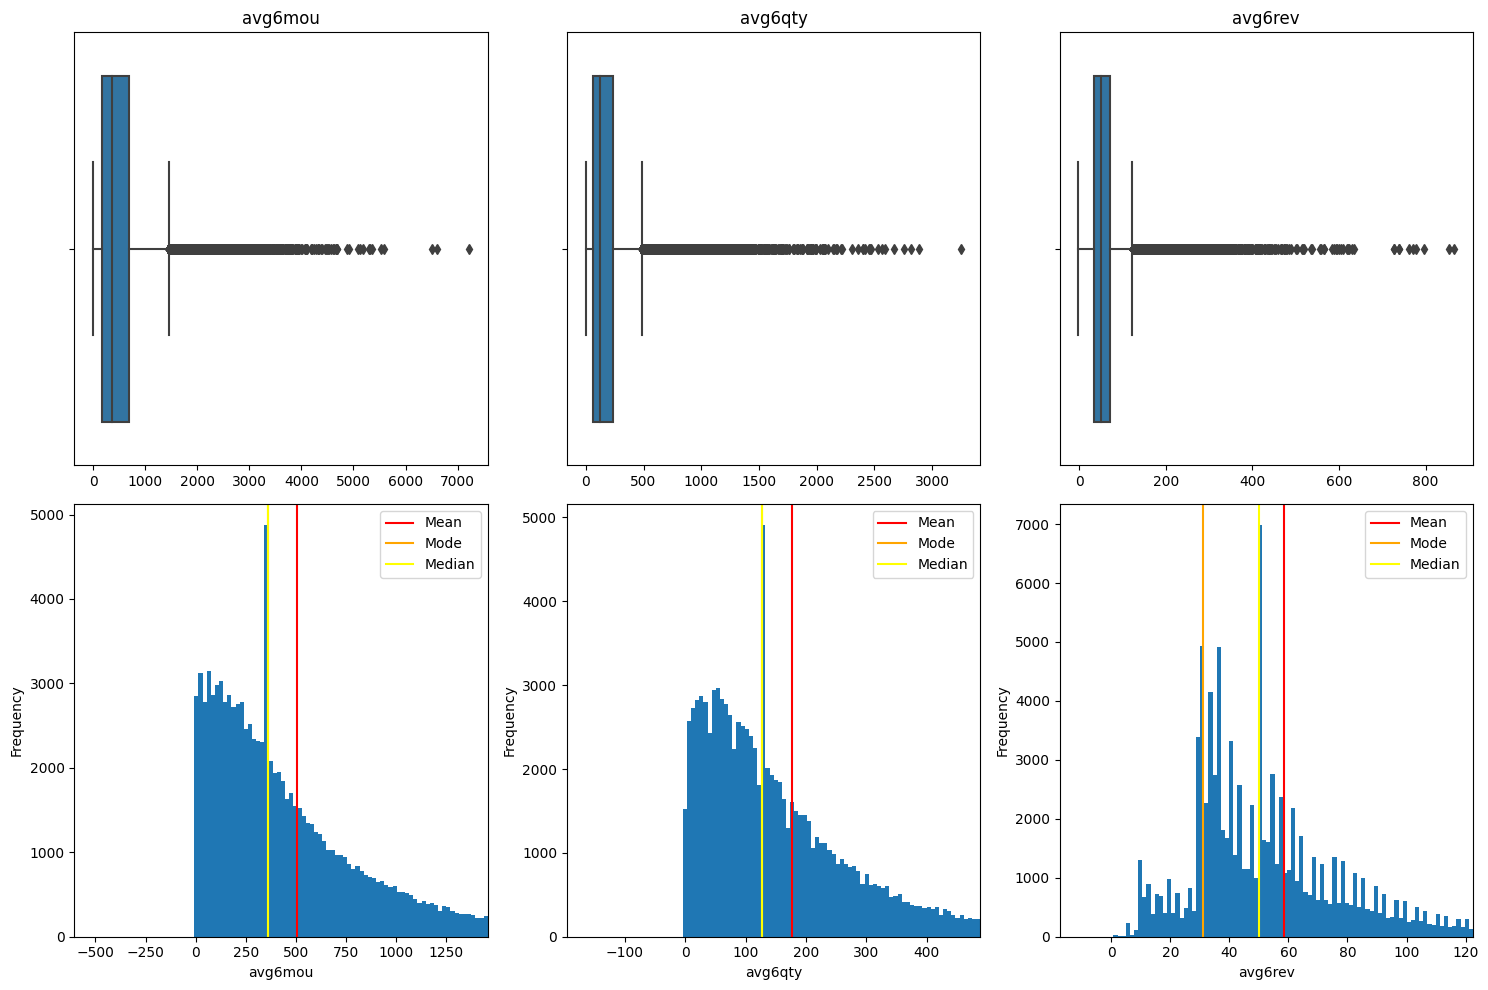

In [200]:
#plot histogram and box plot for the above explained columns
plot_cont_cols_IQR_list(cont_cols_to_plot_14,100)

## **Categorical columns**<a name="category"></a>

**1)prizm_social_one**

PRIZM, a consumer segmentation system by Claritas, classifies U.S. households into groups based on demographics and socio-economic factors.some PRIZM Social Groups are: Upper Crust, Urban Uptown, Movers & Shakers, Country Squires, Middleburbs, Hometown Retired, God's Country,etc. All of them comes under 4 main categories Suburban,Urban,Town and Rural,Second city. These groups help marketers understand, target, and communicate with customers more effectively, allowing businesses to tailor their strategies, products, and services to specific needs and preferences. PRIZM Social Groups provide high-level insights into consumer behavior, enhancing marketing efficiency.

- S: Suburban
- U: Urban 
- T: Town and Rural
- C: Second City
- R: Rustic Living, it comes under T category but more information about group R is not available ,so we can continue without regrouping for now.
 
 These are PRIZM social groups which is based on various demographic   and socio economic factors.
 
 More information about these groups are available in the below given link

Ref: https://environicsanalytics.com/docs/default-source/us---data-product-support-documents/claritas-prizm-premier-segment-narratives-ea.pdf

In [201]:
chck_miss_value_category_col('prizm_social_one')

unique values in column prizm_social_one : ['S' 'U' 'T' 'C' nan 'R']
Number of missing values in prizm_social_one: 7388
percentage of missing values in prizm_social_one: 7.388
count of each category in the column prizm_social_one :S    32097
U    23613
C    17018
T    14989
R     4895
Name: prizm_social_one, dtype: int64
percentage of each category in the column prizm_social_one :S    32.097
U    23.613
C    17.018
T    14.989
R     4.895
Name: prizm_social_one, dtype: float64


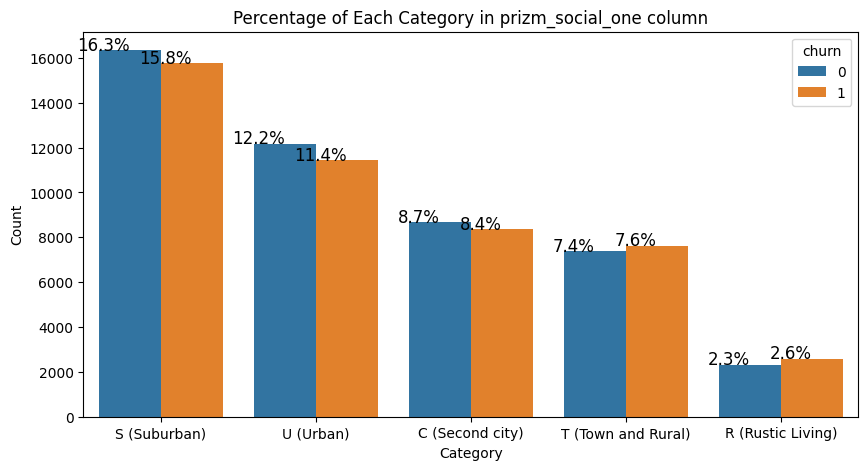

In [202]:
plot_cont_category_col('prizm_social_one',10,5,['Suburban','Urban','Second city','Town and Rural',"Rustic Living"])

This figure shows count plot of prizm social_one column. 7.4 % of the column values are missing. All categories distribution are shown with hue as churn and not_churn distribution. 

Missing values can be replaced by keeping the same ratios of the values in prizm_social_one. So the total distribution of different values stays same and unbiased. 

In [203]:
#divide the missing values in the ratio of known category variables
filling_missing_value_based_ratio_cat('prizm_social_one')

In [204]:
#we can see here the nan values get filled with different categories.
df['prizm_social_one'].unique()

array(['S', 'U', 'T', 'C', 'R'], dtype=object)

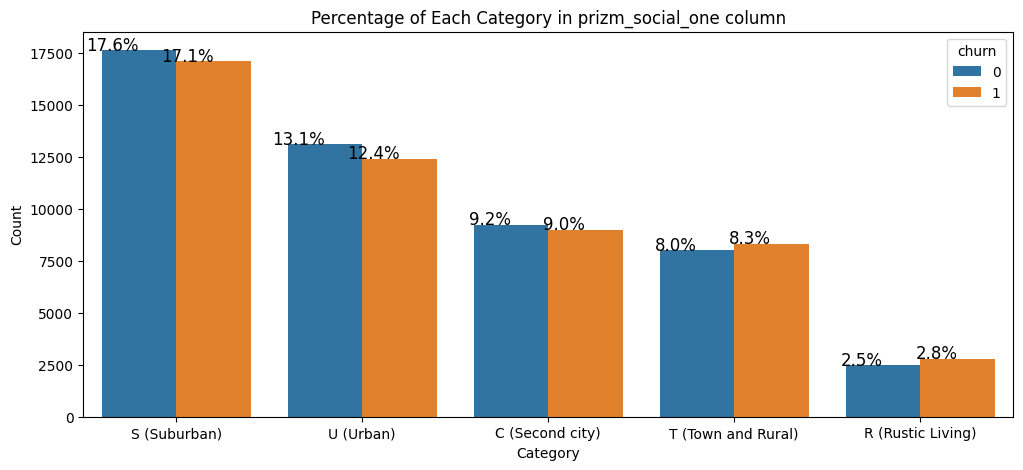

In [205]:
#plot the count plot of the column
plot_cont_category_col('prizm_social_one',12,5,['Suburban','Urban','Second city','Town and Rural',"Rustic Living"])

The plot shows after imputing the `nan` values with same distribution of the  prizm_social_one category values. We can see that the category distribution remains unchanged for `prizm_social_one` after imputation. 

**2)dwlltype**

In [206]:
#check for the missing value in the column
chck_miss_value_category_col('dwlltype')

unique values in column dwlltype : ['S' 'M' nan]
Number of missing values in dwlltype: 31909
percentage of missing values in dwlltype: 31.909
count of each category in the column dwlltype :S    48759
M    19332
Name: dwlltype, dtype: int64
percentage of each category in the column dwlltype :S    48.759
M    19.332
Name: dwlltype, dtype: float64


In a this dataset "dwell type" typically refers to the type of residence or housing situation of the customer. This categorical variable can provide insights into the customer's demographic and socioeconomic background, which could impact their likelihood of churning.
categories for dwell type include:
- Single-family home,`S`: Detached houses meant for one family, often with a yard or garden.
- Multi-family home,`M`: Buildings that house multiple families, such as duplexes or townhouses.

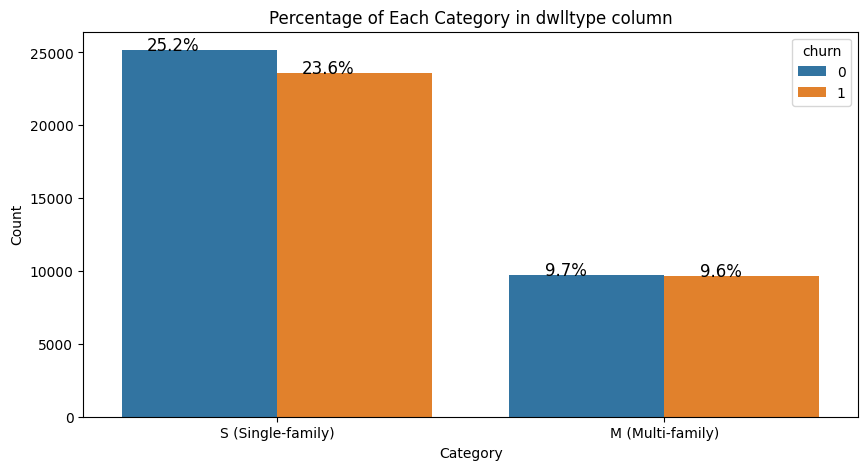

In [207]:
#plot the count plot of the column
plot_cont_category_col('dwlltype',10,5,['Single-family','Multi-family'])


To fill the null values in the "dwlltype" column, we can use other related columns to make informed imputations based on the relationships between the variables. Several columns might be helpful in predicting the dwelling type:

- prizm_social_group: This variable represents the customer's social group classification. It can provide insights into the customer's socioeconomic background, which may be related to their housing situation. 
- ownrent: Homeowner or renter status can give clues about the customer's living arrangement, which can be related to the type of dwelling they reside in. 
- lor: Length of residence might be related to the dwelling type, as people living in certain dwelling types might move more frequently or stay in one place longer
- dwellsize

One way to fill the null values is to use a machine learning algorithm to predict the missing dwelling types based on the relationships between these related columns and the known dwelling types. we can use a classification algorithm such as k-Nearest Neighbors for predicting the missing values.




In [208]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame containing the mentioned columns
# Select the relevant columns
columns_to_use = ['prizm_social_one', 'ownrent', 'lor','dwllsize','dwllsize_encoded', 'dwlltype','prizm_social_one_encoded','ownrent_encoded']

# Encode the categorical variables
le = LabelEncoder()
df_new['prizm_social_one_encoded'] = le.fit_transform(df_new['prizm_social_one'])
df_new['ownrent_encoded'] = le.fit_transform(df_new['ownrent'])
df_new['dwllsize_encoded'] = le.fit_transform(df_new['dwllsize'])

# Drop rows with missing values in prizm_social_one, ownrent, or lor columns
data_clean = df_new[columns_to_use]
data_clean=data_clean.dropna(subset=['prizm_social_one', 'ownrent', 'lor','prizm_social_one_encoded','ownrent_encoded','dwllsize_encoded'])


# Separate the data into known and unknown dwelling type
known_dwlltype = data_clean[data_clean['dwlltype'].notnull()]
unknown_dwlltype_predict = df_new[df_new['dwlltype'].isnull()]

# Prepare the data for training and testing
X = known_dwlltype[['prizm_social_one_encoded', 'ownrent_encoded', 'lor','dwllsize_encoded']]
y = known_dwlltype['dwlltype']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the k-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Test the classifier's performance
print("KNN score:", knn.score(X_test, y_test))

# Predict the missing dwelling types
X_unknown = unknown_dwlltype_predict[['prizm_social_one_encoded', 'ownrent_encoded', 'lor','dwllsize_encoded']]
predicted_dwlltype = knn.predict(X_unknown)



KNN score: 0.9493953950637734


In [209]:
#checking the indeces of dwell type column with unknown values
X_unknown.index

Int64Index([    5,    22,    29,    35,    42,    45,    49,    55,    60,
               62,
            ...
            99974, 99978, 99979, 99980, 99983, 99984, 99985, 99992, 99997,
            99998],
           dtype='int64', length=31909)

In [210]:
#fill the unknown values with the predicted values
df.loc[X_unknown.index,'dwlltype']= predicted_dwlltype

In [211]:
#delete the encoded columns
encoded_cols=['prizm_social_one_encoded', 'ownrent_encoded','dwllsize_encoded']
df.drop(columns=encoded_cols,axis=1,inplace=True)

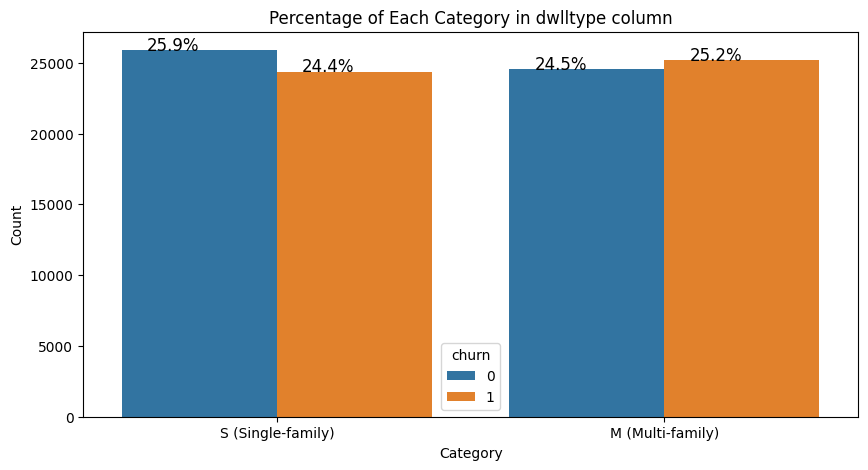

In [212]:
# plot count plot 
plot_cont_category_col('dwlltype',10,5,['Single-family','Multi-family'])

In [213]:

#dwlltype column has only two categories S and M, so we can map them into 0 and 1.
df['dwlltype'] = df['dwlltype'].map({'S': 0, 'M': 1})

In [214]:
#checking the column values
df['dwlltype'].unique()

array([0, 1])

**3)ownrent**

`ownrent` indicates whether the customer owns or rents their residence. It contains two categories: "O" for owned and "R" for rented.

In [215]:
#check the missing values of the column
chck_miss_value_category_col('ownrent')

unique values in column ownrent : ['O' nan 'R']
Number of missing values in ownrent: 33706
percentage of missing values in ownrent: 33.706
count of each category in the column ownrent :O    64284
R     2010
Name: ownrent, dtype: int64
percentage of each category in the column ownrent :O    64.284
R     2.010
Name: ownrent, dtype: float64


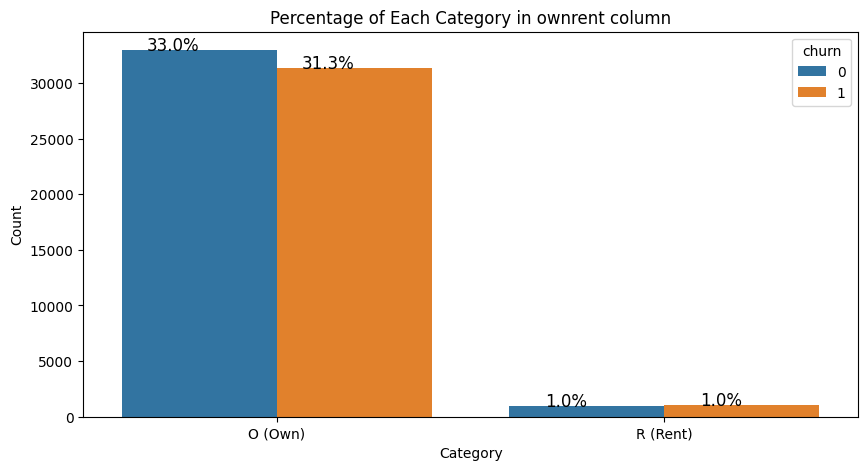

In [216]:
#plot the frequency of each category
plot_cont_category_col('ownrent',10,5,['Own','Rent'])

33.7% of data is missing in this column,above graph shows around 64 percentage of customers have own house and 2 percentage have rented house, the data is skewed towards own category, so the null values can be find based on the given percentages.

In [217]:
# fill the missing values based on the ratio of two categories O and R
filling_missing_value_based_ratio_cat('ownrent')


In [218]:
#checking the values
val1=df['ownrent'].unique()
print(f"unique values in column prizm_social_one : {val1}")

unique values in column prizm_social_one : ['O' 'R']


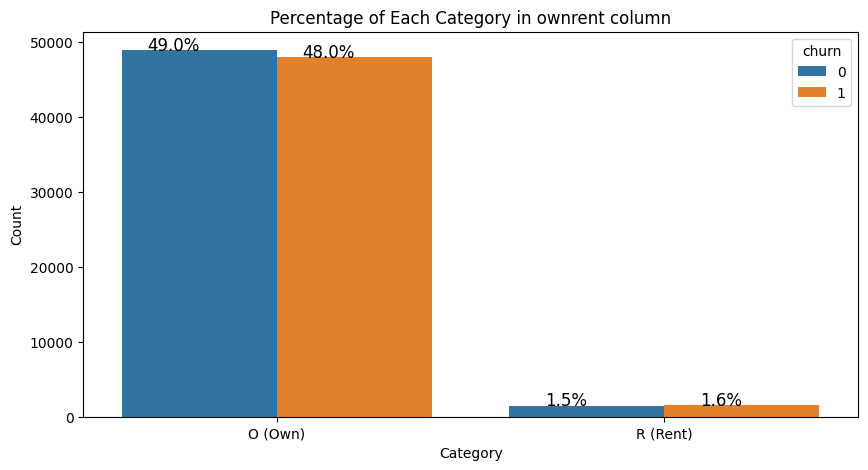

In [219]:
plot_cont_category_col('ownrent',10,5,['Own','Rent'])

After filling the missing values,the distribution remain the same.

We can drop this column ,since 97 percentage of the values belongs to the same category, So it wont help in churn prediction since the distribution of churn is in the 50:50 ratio.

In [220]:
#drop the ownrent column
df.drop('ownrent',axis=1,inplace=True)

**4) refurb_new**

This column indicate whether a device  is refurbished or new. Refurbished products are ones that have been previously owned or used, but have undergone a process of restoration and testing to ensure they are in good condition for resale. New products, on the other hand, have not been previously owned or used.

In [221]:
#check the missing values
chck_miss_value_category_col('refurb_new')

unique values in column refurb_new : ['N' 'R' nan]
Number of missing values in refurb_new: 1
percentage of missing values in refurb_new: 0.001
count of each category in the column refurb_new :N    85593
R    14406
Name: refurb_new, dtype: int64
percentage of each category in the column refurb_new :N    85.593
R    14.406
Name: refurb_new, dtype: float64


Only one value is missing in the refurb_new column. So that value can be replaced with the mode value.

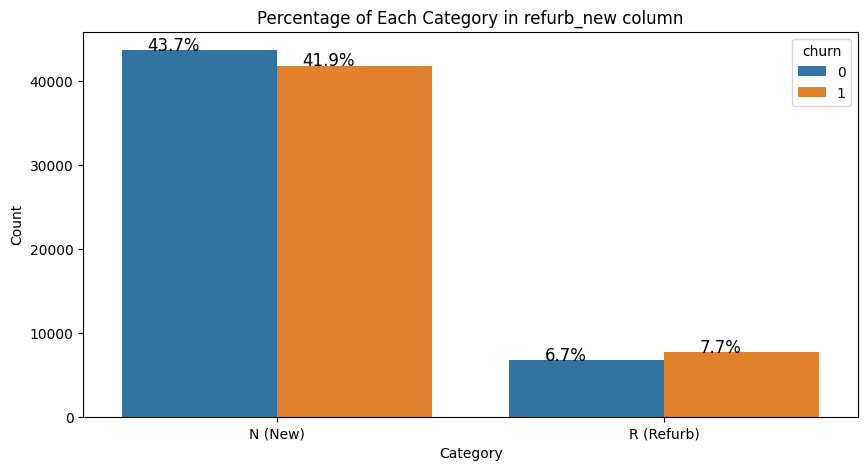

In [222]:
#plotting the categories of the column
plot_cont_category_col('refurb_new',10,5,['New','Refurb'])

'N' category represent 85% of the column data,so single missing value can be assigned with N.

In [223]:
# fill the missing value with mode value
df['refurb_new']=df['refurb_new'].fillna('N')


In [224]:
#The column has only two categories,so can map into 0 and 1.
df['refurb_new'] = df['refurb_new'].replace({'N': 1, 'R': 0})

**5)dualband**

dualband indicates whether a customer has a dual-band phone or not. A dual-band phone is a mobile phone that can operate on two different frequency bands, which allows it to access more networks and potentially have better signal strength and call quality in different areas

In [225]:
#check column, to find the unique categories and the missing values
chck_miss_value_category_col('dualband')

unique values in column dualband : ['Y' 'N' 'T' 'U' nan]
Number of missing values in dualband: 1
percentage of missing values in dualband: 0.001
count of each category in the column dualband :Y    72265
N    23196
T     4316
U      222
Name: dualband, dtype: int64
percentage of each category in the column dualband :Y    72.265
N    23.196
T     4.316
U     0.222
Name: dualband, dtype: float64


Only one value is missing in the refurb_new column. So that value can be replaced with the mode value.

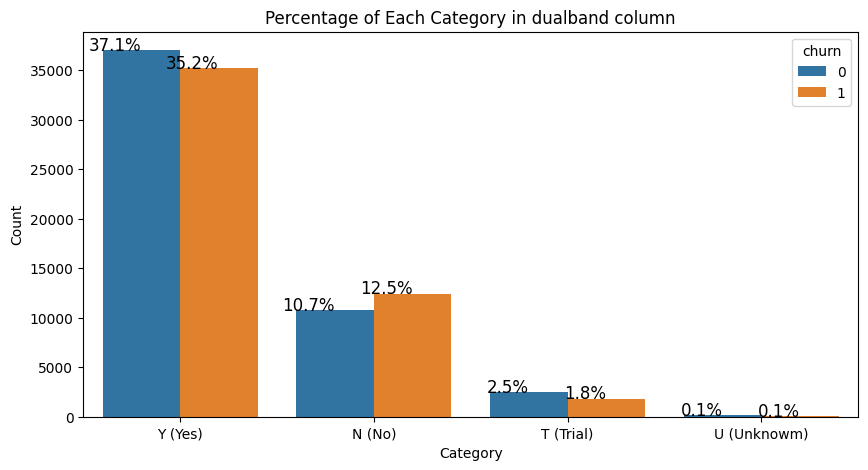

In [226]:
plot_cont_category_col('dualband',10,5,['Yes','No','Trial','Unknowm'])

In [227]:
# Only one value is missing,so it can fill using mode value(Y)
df['dualband']=df['dualband'].fillna('Y')

In the context of the "dualband" column, the categories Y, N, T, and U likely represent different subscription statuses for dual-band service:
- Y: This category likely indicates that the customer has subscribed to and is actively using the dual-band service.
- N: This category probably signifies that the customer has not subscribed to the dual-band service.
- T: This category could represent a temporary or trial subscription to the dual-band service, where customers can try the service for a limited time before deciding whether to continue or not.
- U: This category might indicate an unknown or undefined status.


To simplify the "dualband" column for better analysis we can approximate the column categories into a binary Y/N representation, we can recode the T and U categories.

- T (trial) category: If we assume that customers who are on a trial subscription have a similar experience as those who have subscribed to the dual-band service, we can merge the T category with the Y category, representing both as active dual-band users.
- U (unknown) category: Since the information regarding these customer's dual-band service subscription is unclear, we can include them in Y category. we can replace the unknown category 'U' with the mode value which is 'Y'.Unknown is only 0.2 percentage,we can replace the unknown category with the mode value which is 'Y'. so we can map all unknown values into Y .





In [228]:
df['dualband'] = df['dualband'].replace({'T': 'Y'})
df['dualband'] = df['dualband'].replace({'U': 'Y'})

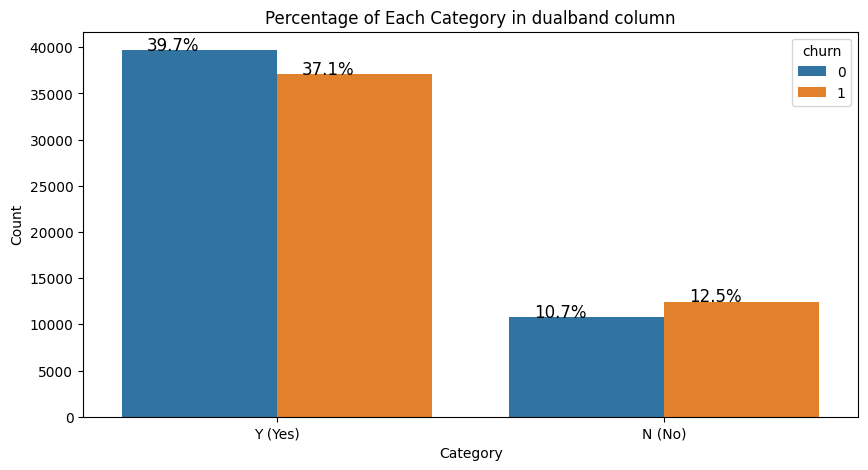

In [229]:
plot_cont_category_col('dualband',10,5,['Yes','No'])

In [230]:
#map the Yes to 1 and N to 0
df['dualband'] = df['dualband'].replace({'N': 0, 'Y': 1})

#### 6)kid0_2  , kid3_5  , kid6_10 , kid11_15 ,kid16_17          

These columns provide data regarding whether there are any children under a particular age group living in the household.

In [231]:
kids = ['kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17']

for kid in kids:
    # Print heading for each category
    print(f"{'-' * 20}\n{kid.upper()} Category\n{'-' * 20}")

    # Check unique values of the column
    val = df[kid].unique()
    print(f"Unique values in column {kid}: {val}")

    # Find the number of missing values in the column
    missing_values = df[kid].isna().sum()
    print(f"Number of missing values in {kid}: {missing_values}")

    # Calculate the percentage of missing values
    percentage = (missing_values * 100) / len(df)
    print(f"Percentage of missing values in {kid}: {percentage}\n")


--------------------
KID0_2 Category
--------------------
Unique values in column kid0_2: ['U' 'Y' nan]
Number of missing values in kid0_2: 1732
Percentage of missing values in kid0_2: 1.732

--------------------
KID3_5 Category
--------------------
Unique values in column kid3_5: ['U' 'Y' nan]
Number of missing values in kid3_5: 1732
Percentage of missing values in kid3_5: 1.732

--------------------
KID6_10 Category
--------------------
Unique values in column kid6_10: ['U' 'Y' nan]
Number of missing values in kid6_10: 1732
Percentage of missing values in kid6_10: 1.732

--------------------
KID11_15 Category
--------------------
Unique values in column kid11_15: ['U' 'Y' nan]
Number of missing values in kid11_15: 1732
Percentage of missing values in kid11_15: 1.732

--------------------
KID16_17 Category
--------------------
Unique values in column kid16_17: ['U' 'Y' nan]
Number of missing values in kid16_17: 1732
Percentage of missing values in kid16_17: 1.732



- Missing data: The number of missing values is the same for all the kids' category columns (1,732), which represents 1.732% of the total data. This percentage is relatively low, so it might not have a significant impact on the analysis. However, it's still essential to address the missing data before further analysis (e.g., through imputation.)
- Unique values: Each kids' category column has the same unique values: 'U', 'Y', and NaN. 'U' likely indicates the absence   of children in that age group, while 'Y' represents the presence of children in the respective age group. NaN values      represent the missing data.

Overall, there is only a small percentage of missing data that needs to be addressed before further analysis. The unique values suggest a binary classification of the presence or absence of children in each age group. 










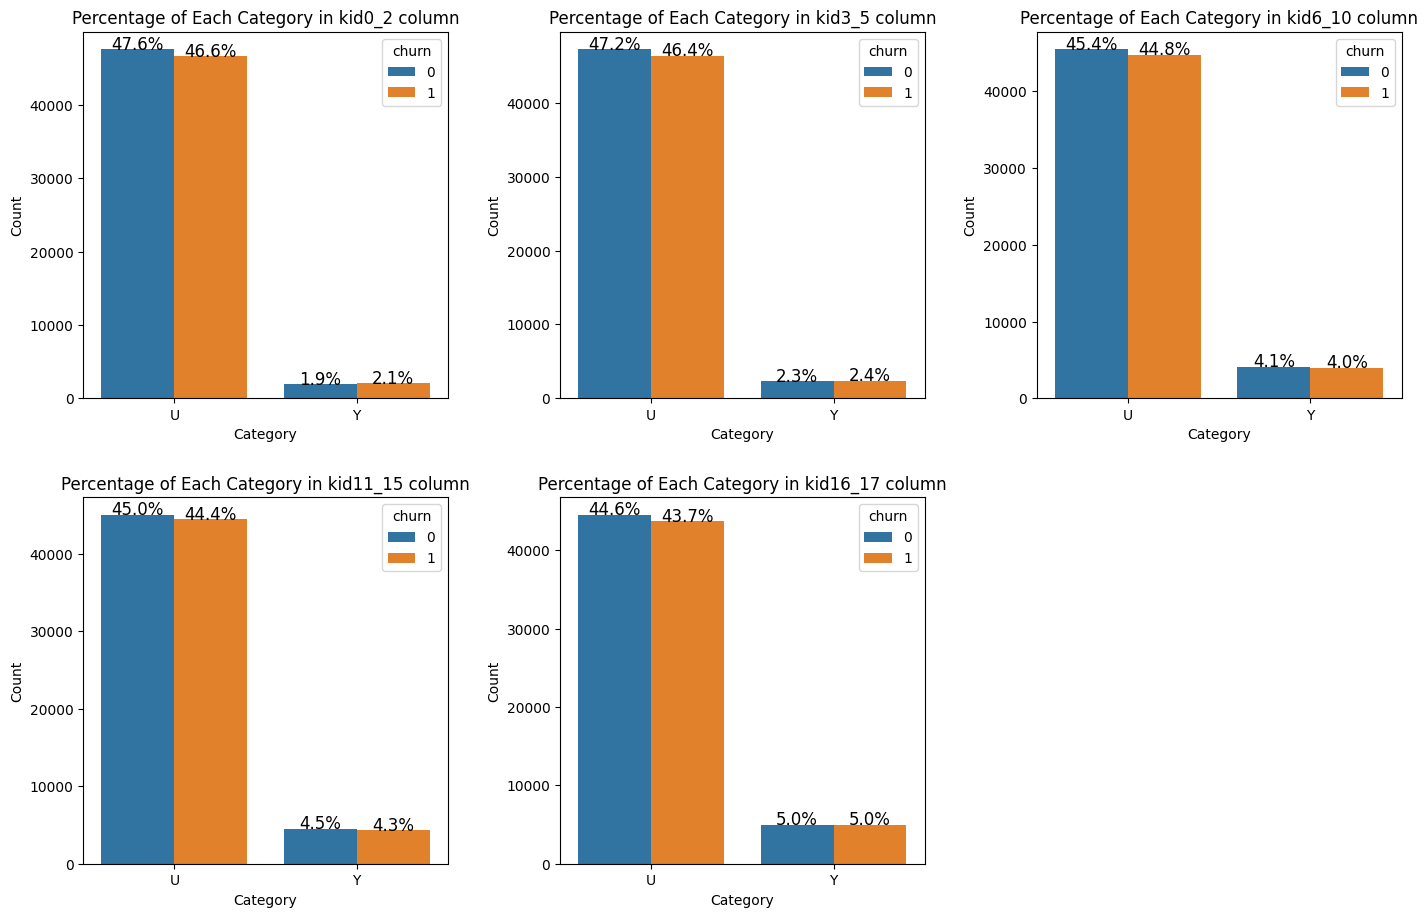

In [232]:
list_of_categories=['Unknown','Yes',]
kids = ['kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17']

# Set up the subplots grid
n_rows = 2
n_cols = 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))
fig.tight_layout(pad=5)

for idx, kid in enumerate(kids):
    # Calculate the row and column index for the current subplot
    row = idx // n_cols
    col = idx % n_cols
     


    # Create countplot
    ax = sns.countplot(x=kid, data=df, order=df[kid].value_counts().index, hue='churn', ax=axes[row, col])

    # Calculate percentages
    total = len(df[kid])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='baseline', fontsize=12)

    # Set plot labels and title
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    ax.set_title(f'Percentage of Each Category in {kid} column')

# Remove empty subplot if necessary
if n_rows * n_cols > len(kids):
    fig.delaxes(axes[n_rows - 1, n_cols - 1])

plt.show()


From the above graph we can see that in each of the category distribution approximately 90 percentage or slightly more than 90 are `U` category and remaining is `Y` category. 

- Imbalanced distribution: The presence of a significantly higher number of 'U' values compared to 'Y' values suggests that the data in this column is imbalanced. 
- Low presence of children: The high proportion of 'U' values in each category indicates that a majority of the customers in the dataset do not have children in the respective age groups. This observation can help us to understand the demographics of the customer base better, which can be useful in designing targeted marketing strategies or tailoring products and services to the needs of the customers.

nan value in each kids category column can be replaced by 'U' category because of the following reasons:
- 'U' category is the most repeated value in all the kids cateegory column
- nan values are unknown ,so we can fill nan with 'U' category

In [233]:
kids = ['kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17']

# Iterate through the kids category columns
for kid in kids:
    # Replace NaN values with 'U'
    df[kid] = df[kid].fillna('U')


We can combine all kids category columns ['kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17'] into one single column which indicates total children in the house hold including all age group. Create a new column called `number_of_kids` in the dataframe df, and delete all kids induvidual category columns. Since we are finding total number of children it won't cause much information loss.

In [234]:
kids = ['kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17']

# Create a DataFrame where each cell is 1 if the corresponding cell in the original DataFrame is 'Y', otherwise 0
count_df = df[kids].applymap(lambda x: 1 if x == 'Y' else 0)

# Calculate the sum of 'Y' values in each row
sum_of_Y_in_each_row = count_df.sum(axis=1)
df['number_of_kids']=sum_of_Y_in_each_row
#delete kid category columns from
df.drop(columns=kids,axis=1,inplace=True)

The presence of children in a household can have an impact on customer churn in several ways.Here are some potential reasons why the presence of children might affect customer churn:

- Family plans: Households with children might be more interested in family plans or bundled services, as they may need additional lines, devices, or data allowances. If a telecom provider offers attractive family plans, it can lead to increased customer retention for families with children.

- Usage patterns: The presence of children in a household may affect the usage patterns of telecom services. For example, households with children might use more data for streaming, gaming, or educational purposes, which could influence their choice of service provider.

- Financial priorities: Households with children may have different financial priorities than those without children, which could affect their sensitivity to price changes or promotional offers. Parents might be more willing to switch providers if they believe they can get a better deal for their family elsewhere.

- Customer service: Families with children might have specific customer service needs, such as assistance with parental controls or child-friendly content. If a telecom provider offers excellent customer support and caters to these needs, it may lead to increased customer satisfaction and reduced churn.








**7)marital**

This column represent marital status of the customer

In [235]:
#check the to find the number of missing values
chck_miss_value_category_col('marital')

unique values in column marital : ['S' 'M' 'A' 'U' 'B' nan]
Number of missing values in marital: 1732
percentage of missing values in marital: 1.732
count of each category in the column marital :U    37333
M    31052
S    17627
B     7116
A     5140
Name: marital, dtype: int64
percentage of each category in the column marital :U    37.333
M    31.052
S    17.627
B     7.116
A     5.140
Name: marital, dtype: float64


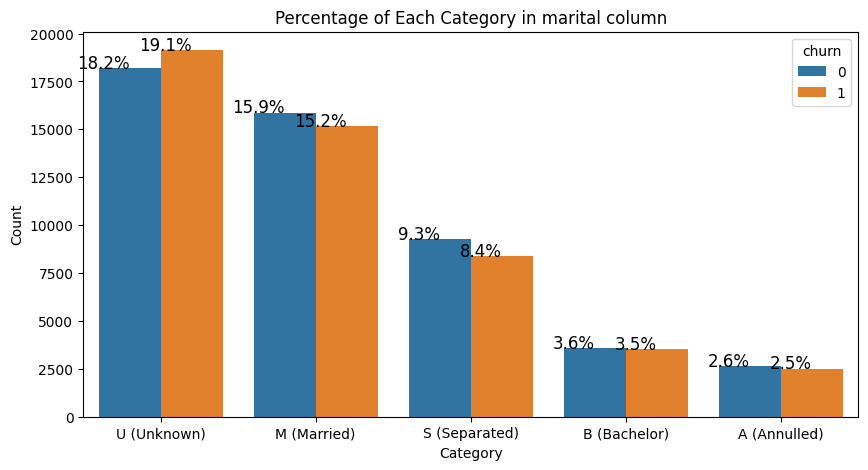

In [236]:
#count plot of the column
plot_cont_category_col('marital',10,5,["Unknown", "Married","Separated","Bachelor","Annulled"])

The categorical variables in the marital status column indicates the following:
- A: "Annulled" - Annulled marriage.
- B: "Bachelor" - Never married or single.
- S: "Separated" - Separated but not legally divorced.
- U: "Unknown" - Marital status is unknown or not provided.
- M: "Married" - Currently married.

So we can regroup some of the existing categories.Here we can combine "Annulled","Bachelor" and "Separated" into a single category called "Not Married" , nan values can be replaced with the unknown category. So here we can reduce marital columns into 3 categories `married`,`not married` and `unknown` categories.







In [237]:
# Define a function to regroup marital status categories
def regroup_marital_status(status):
    if status in ['A', 'B', 'S']:
        return 'N'
    else:
        return status

# Apply the function to the marital column
df['marital'] = df['marital'].apply(regroup_marital_status)


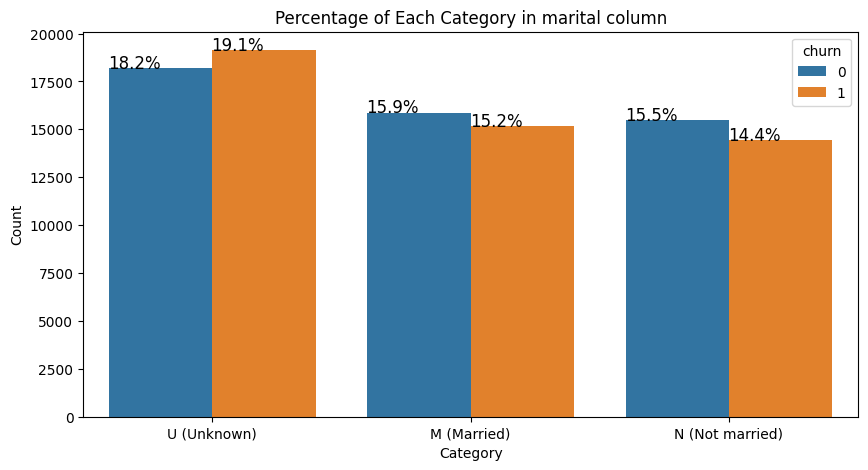

In [238]:
#count plot of the column after regrouping
plot_cont_category_col('marital',10,5,["Unknown","Married","Not married",])

 Now fill the nan values. all the nan values can be filled with 'U' category.

In [239]:
# fill nan values
df['marital']=df['marital'].fillna('U')

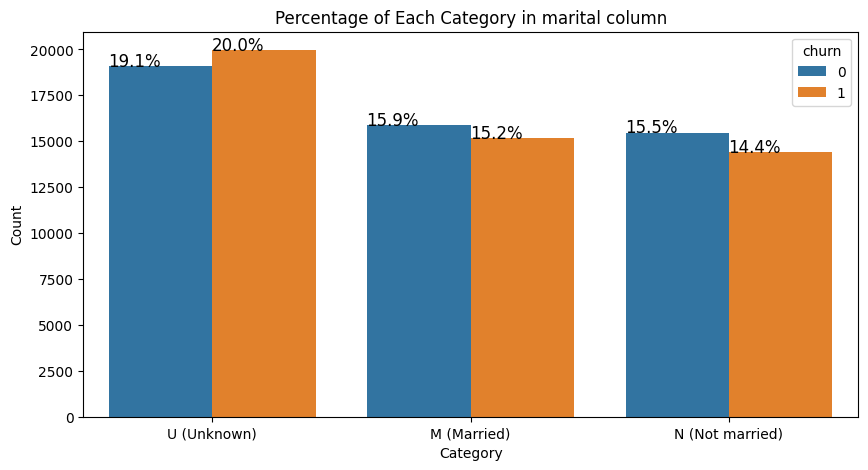

In [240]:
#count plot of the column after regrouping
plot_cont_category_col('marital',10,5,["Unknown","Married","Not married",])

**8)area**

This column gives information about the locatilities of the customer.

In [241]:
#check the missing values , count of each category and unique values in the column
chck_miss_value_category_col('area')

unique values in column area : ['NORTHWEST/ROCKY MOUNTAIN AREA' 'CHICAGO AREA' 'GREAT LAKES AREA'
 'NEW ENGLAND AREA' 'DALLAS AREA' 'CENTRAL/SOUTH TEXAS AREA'
 'TENNESSEE AREA' 'MIDWEST AREA' 'PHILADELPHIA AREA' 'OHIO AREA'
 'HOUSTON AREA' 'SOUTHWEST AREA' 'NEW YORK CITY AREA'
 'ATLANTIC SOUTH AREA' 'SOUTH FLORIDA AREA' 'CALIFORNIA NORTH AREA'
 'DC/MARYLAND/VIRGINIA AREA' 'NORTH FLORIDA AREA' nan 'LOS ANGELES AREA']
Number of missing values in area: 40
percentage of missing values in area: 0.04
count of each category in the column area :NEW YORK CITY AREA               11098
LOS ANGELES AREA                  6636
DC/MARYLAND/VIRGINIA AREA         6567
MIDWEST AREA                      6346
SOUTHWEST AREA                    6187
ATLANTIC SOUTH AREA               6132
CALIFORNIA NORTH AREA             5913
NEW ENGLAND AREA                  5452
DALLAS AREA                       5426
CHICAGO AREA                      5141
GREAT LAKES AREA                  4649
OHIO AREA                   

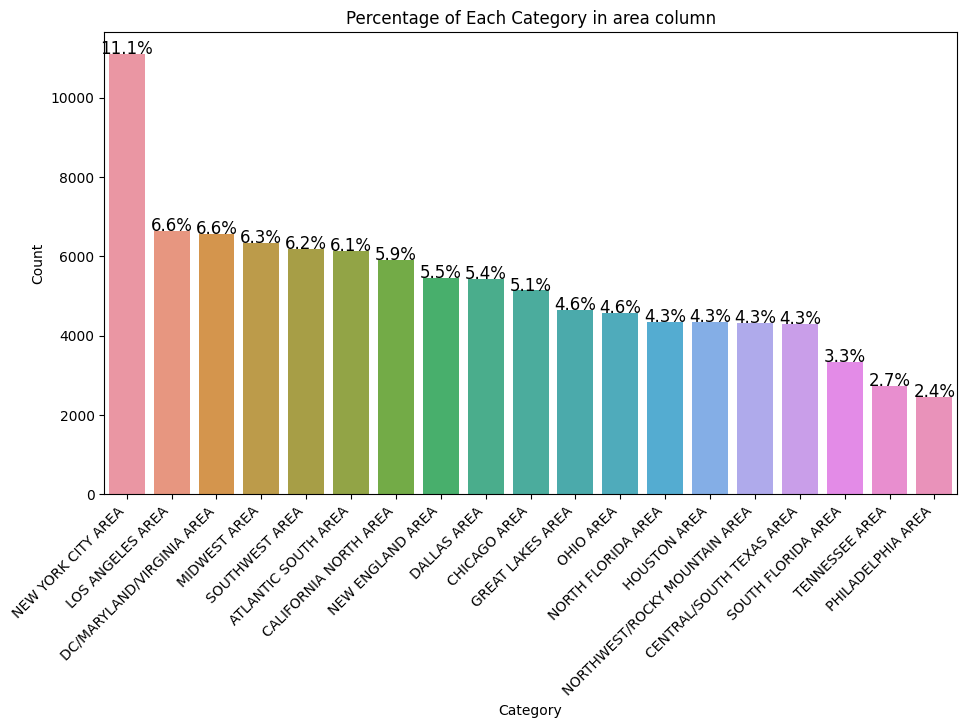

In [242]:
# Create countplot of the area column
plt.figure(figsize=(11, 6))
ax = sns.countplot(x='area', data=df, order=df['area'].value_counts().index)

# Calculate percentages
total = len(df['area'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='baseline', fontsize=12)

# Set plot labels and title
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Percentage of Each Category in area column')
plt.show()

We have 40 unknown values in 'area' column. These can be filled with mode value ,which is NEW YORK CITY AREA.

In [243]:
#check the count of 'NEW YORK CITY AREA' before filling the null values.
new_york_city_area_count = df[df['area'] == 'NEW YORK CITY AREA'].shape[0]
print(f"Number of times 'NEW YORK CITY AREA' appears in the area column: {new_york_city_area_count}")

Number of times 'NEW YORK CITY AREA' appears in the area column: 11098


We can replace the nan value with the mode value, beacuse we can consider that kind of area being most covered by the telecom service. Also only 40 values are missing which is just .04 percentage of total data, so imputation with mode value will not add any significant noise.

In [244]:
# Find the most frequent value in the 'area' column
most_frequent_area = df['area'].mode().iloc[0]

# Replace NaN values with the most frequent value
df['area'].fillna(most_frequent_area, inplace=True)
new_york_city_area_count = df[df['area'] == 'NEW YORK CITY AREA'].shape[0]
print(f"Number of times 'NEW YORK CITY AREA' appears in the area column after filling nan with the mode value: {new_york_city_area_count}")

Number of times 'NEW YORK CITY AREA' appears in the area column after filling nan with the mode value: 11138


We can see here the number of occurence of NEWYORK CITY AREA increased by 40 after replacing the nan value with the mode of the column.

We can generalize these areas into urban ,suburban and rural to get a better understanding of customer behaviour in different kind of regions.

- Urban: These areas have high population density and are typically found in large cities or metropolitan areas.
Example: 'NEW YORK CITY AREA', 'LOS ANGELES AREA', 'CHICAGO AREA', 

- Suburban: These areas are less densely populated than urban areas but still have relatively high populations. They are typically found surrounding large cities or metropolitan areas.
Example:'NORTH FLORIDA AREA', 'SOUTH FLORIDA AREA'

- Rural: These areas have lower population density and are typically found in less developed regions or smaller towns.
Example: 'NORTHWEST/ROCKY MOUNTAIN AREA', 'GREAT LAKES AREA'

we  can replace the given areas using these generalized regions

**Suburban:**

- 'GREAT LAKES AREA' - This region has a mix of urban, suburban, and rural areas, but areas like suburban Detroit, suburban Chicago, or suburban Cleveland could be considered suburban.
- 'TENNESSEE AREA' - Major cities in Tennessee like Nashville, Memphis, and Knoxville have suburban areas around them, so you could consider these as suburban.

**Rural:**

- 'NORTHWEST/ROCKY MOUNTAIN AREA' - This region includes states like Montana, Idaho, and Wyoming, which are generally known for their rural landscapes and lower population density.
- 'CENTRAL/SOUTH TEXAS AREA' - Central and South Texas have large rural areas with lower population density, especially when you move away from the major cities like Austin and San Antonio.
- 'MIDWEST AREA' - The Midwest has a mix of urban, suburban, and rural areas. However, states like Iowa, Kansas, and Nebraska are known for their large rural landscapes and lower population density.
- 'SOUTHWEST AREA' - The Southwest region includes states like Arizona, New Mexico, and Nevada. This region has a mix of urban, suburban, and rural areas, but it is also known for its large rural landscapes and lower population density.






In [245]:
def categorize_area(area):
    urban_areas = ['NEW YORK CITY AREA', 'LOS ANGELES AREA', 'CHICAGO AREA', 'PHILADELPHIA AREA', 'HOUSTON AREA', 'DC/MARYLAND/VIRGINIA AREA', 'SOUTH FLORIDA AREA', 'DALLAS AREA']
    suburban_areas = ['NORTH FLORIDA AREA','GREAT LAKES AREA','TENNESSEE AREA' , 'SOUTH FLORIDA AREA', 'CALIFORNIA NORTH AREA', 'NEW ENGLAND AREA', 'OHIO AREA', 'ATLANTIC SOUTH AREA']
    rural=['NORTHWEST/ROCKY MOUNTAIN AREA','CENTRAL/SOUTH TEXAS AREA','MIDWEST AREA','SOUTHWEST AREA']
    if area in urban_areas:
        return 'Urban'
    elif area in suburban_areas:
        return 'Suburban'
    elif area in rural:
        return 'Rural'

df['area'] = df['area'].apply(categorize_area)


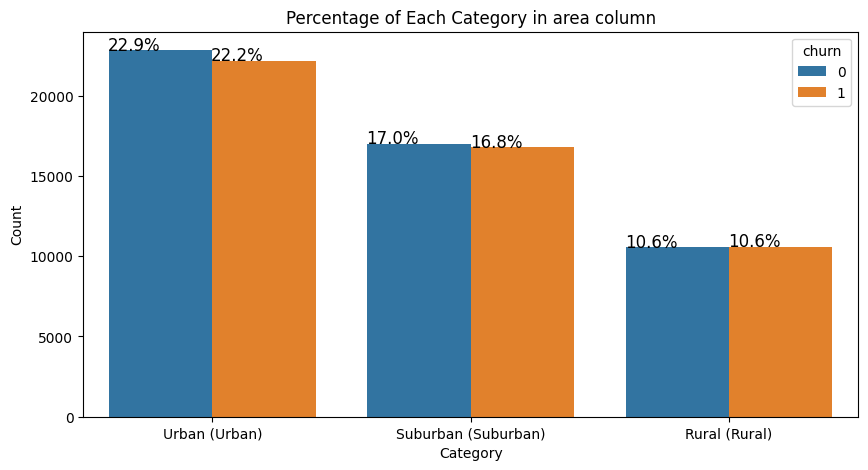

In [ ]:
plot_cont_category_col('area',10,5,['Urban','Suburban','Rural'])

**9) creditcd**

The column "creditcd" refers to the presence of a credit card in the customer's account. This column contains two values of either Y or N, where Y indicates that the customer has a credit card and N indicates that they do not have one. This information can be useful for companies in understanding the spending behavior and creditworthiness of their customers.

In [246]:
#check the missing values , count of each category and unique values in the column
chck_miss_value_category_col('creditcd')

unique values in column creditcd : ['Y' 'N' nan]
Number of missing values in creditcd: 1732
percentage of missing values in creditcd: 1.732
count of each category in the column creditcd :Y    67234
N    31034
Name: creditcd, dtype: int64
percentage of each category in the column creditcd :Y    67.234
N    31.034
Name: creditcd, dtype: float64


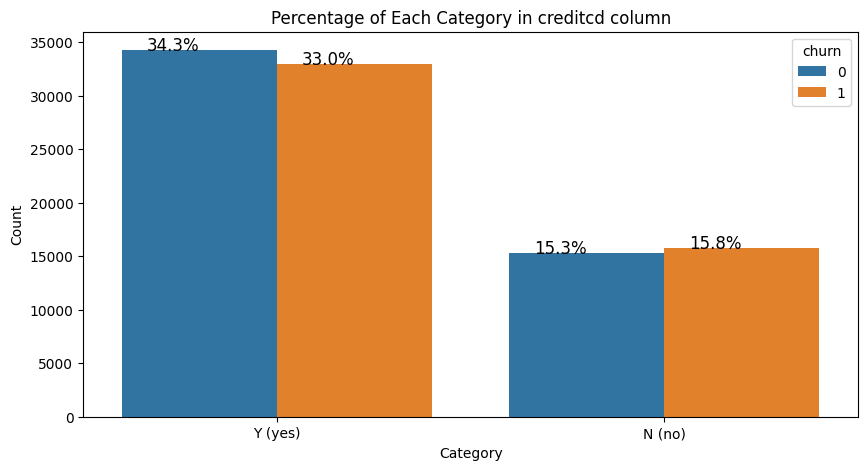

In [247]:
#plot count of each category in the column
plot_cont_category_col('creditcd',10,5,['yes','no'])

Here in creditcard column 1.732 percentage of data is missing. 'Y' and 'N' categories are 67.2 and 31 percentage respectively. Here we can divide the null value in the ratio of Y and N category.


In [248]:

# fill the missing values based on the ratio of two categories Y and N
filling_missing_value_based_ratio_cat('creditcd')


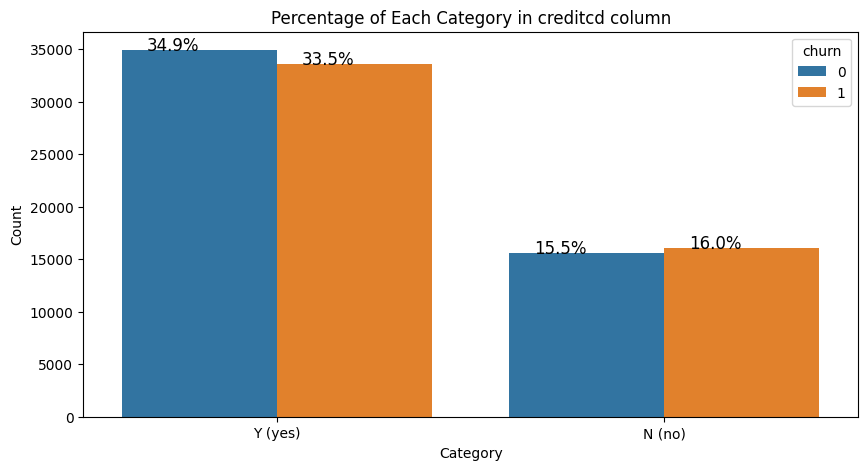

In [249]:
#count plot after filling missing values
plot_cont_category_col('creditcd',10,5,['yes','no'])

In [250]:
#map the categories into numbers
df['creditcd'] = df['creditcd'].replace({'N': 0, 'Y': 1})

**10)ethnic**

The ethnic column represents the ethnic background of the customer. This information can be used by telecom companies to understand the demographics of their customer base and tailor their marketing and customer service strategies accordingly.This information can be useful in providing customer service in languages that the customers are comfortable with. Providing service in their preferred language can improve their satisfaction with the service and lead to customer retention, which in turn can reduce the churn rate.

In [251]:
#check the missing values , count of each category and unique values in the column
chck_miss_value_category_col('ethnic')

unique values in column ethnic : ['N' 'Z' 'U' 'I' 'S' 'F' 'J' 'M' 'H' 'G' 'D' 'O' nan 'R' 'B' 'P' 'X' 'C']
Number of missing values in ethnic: 1732
percentage of missing values in ethnic: 1.732
count of each category in the column ethnic :N    33389
H    13623
S    12747
U    10945
G     5914
Z     4425
O     4198
I     3811
J     2838
F     2127
B     1374
R     1046
D      866
P      486
C      244
M      149
X       86
Name: ethnic, dtype: int64
percentage of each category in the column ethnic :N    33.389
H    13.623
S    12.747
U    10.945
G     5.914
Z     4.425
O     4.198
I     3.811
J     2.838
F     2.127
B     1.374
R     1.046
D     0.866
P     0.486
C     0.244
M     0.149
X     0.086
Name: ethnic, dtype: float64


More information about different ethnic category letters in the dataset is not available,So here we can fill the nan with mode value and keep all the values as it is.

In [252]:
#fill the missing values with mode value
df['ethnic'] = df['ethnic'].fillna('N')

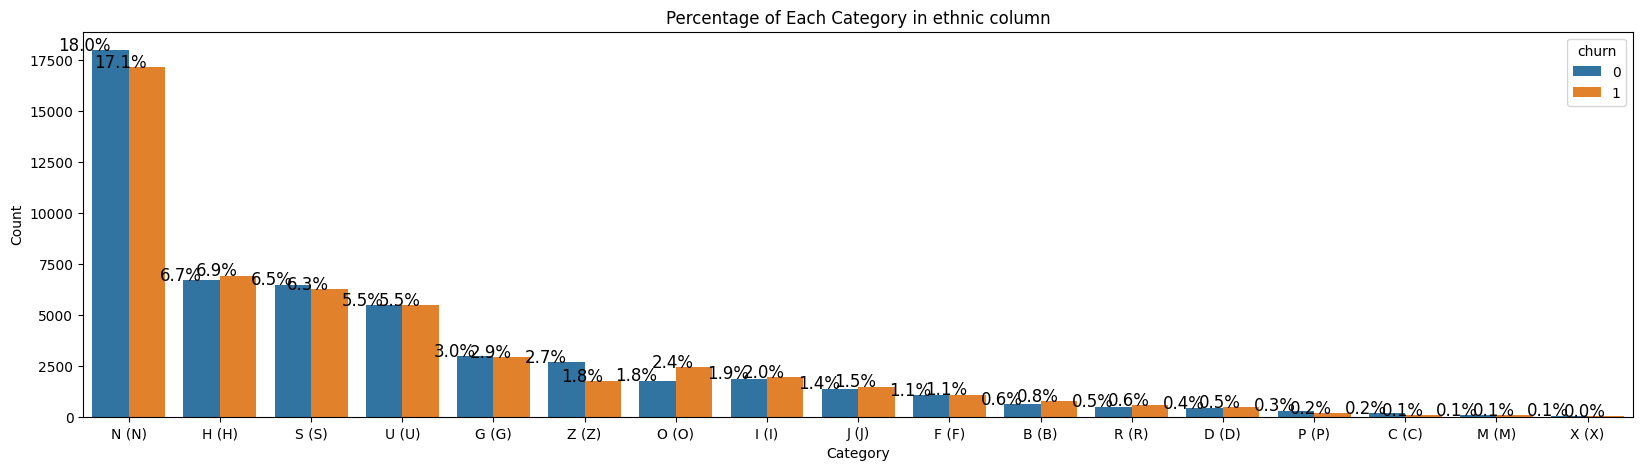

In [253]:
#count plot of each category
plot_cont_category_col('ethnic',20,5,['N', 'H','S' ,'U' ,'G', 'Z', 'O', 'I', 'J', 'F', 'B', 'R' ,'D', 'P', 'C', 'M', 'X'])

In [ ]:
# def regroup_ethnic(ethnic_code):
#     if ethnic_code == 'N':
#         return 'N'
#     else:
#         return 'O'

# # Apply the custom function to the 'ethnic' column
# df['ethnic'] = df['ethnic'].apply(regroup_ethnic)

In [ ]:
# df['ethnic'] = df['ethnic'].replace({'N': 1, 'O': 0})

**11) hnd_webcap**

The hnd_webcap column represents whether a customer has a handset (mobile phone) with web capabilities (such as browsing the internet or using web-based applications). 

In [254]:
#check the missing values , count of each category and unique values in the column
chck_miss_value_category_col('hnd_webcap')

unique values in column hnd_webcap : ['WCMB' 'WC' nan 'UNKW']
Number of missing values in hnd_webcap: 10189
percentage of missing values in hnd_webcap: 10.189
count of each category in the column hnd_webcap :WCMB    75733
WC      13843
UNKW      235
Name: hnd_webcap, dtype: int64
percentage of each category in the column hnd_webcap :WCMB    75.733
WC      13.843
UNKW     0.235
Name: hnd_webcap, dtype: float64


'WCMB','WC' and 'UNKW' are the categories present in the column.
- WCMB': This represent "Web Capable Mobile Broadband", indicating that the handset has high-speed internet capabilities, like 4G or 5G, and can access web services at faster speeds.
- 'WC': This stand for "Web Capable" or "Web Connectivity," suggesting that the handset has internet capabilities, but it might not be as advanced or as fast as the 'WCMB' category.
- 'UNKW' category , this column indicates unknown category
  we can replace  nan values with 'UNKW' category.

In [255]:
#fill nan with 'UNKW' value
df['hnd_webcap']=df['hnd_webcap'].fillna('UNKW')

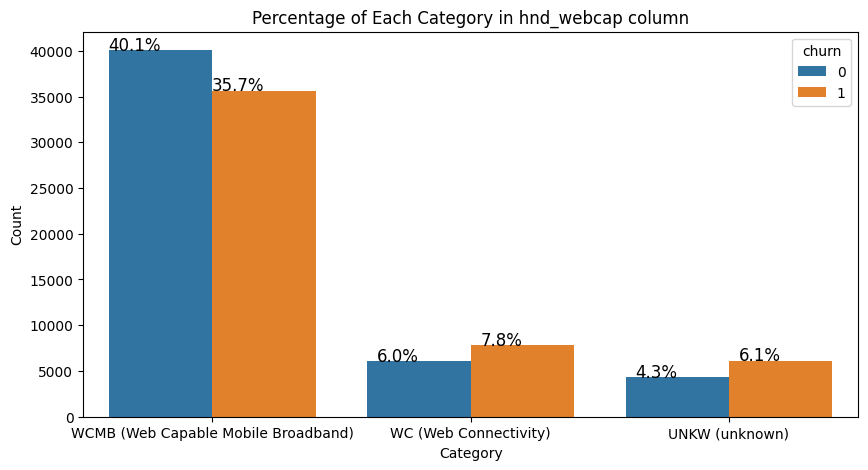

In [256]:
#count plot
plot_cont_category_col('hnd_webcap',10,5,['Web Capable Mobile Broadband','Web Connectivity','unknown'])

10.4 percentage of total value is unknown in this column. So we can divide the unknown values in the ratio of other two categories, which is 75.7% and 13.8% for 'WCMB' and 'WC' respectively.

In [257]:
# Step 1: Calculate the number of missing values
missing_values_count =10424
# Step 2: Generate a list of "own" and "rent" values based on the given percentages
choices = ['WCMB', 'WC']
probabilities = [0.757/0.895, 0.138/ 0.895]  # Adjusted probabilities considering the missing values
fill_values = np.random.choice(choices, size=missing_values_count, p=probabilities)

# Step 3: Fill the missing values in the DataFrame with the generated values
# Define a function to regroup marital status categories
fill_values_index=0
for idx, row in df.iterrows():
    if row['hnd_webcap'] == 'UNKW':
        df.loc[idx, 'hnd_webcap'] = fill_values[fill_values_index]
        fill_values_index += 1


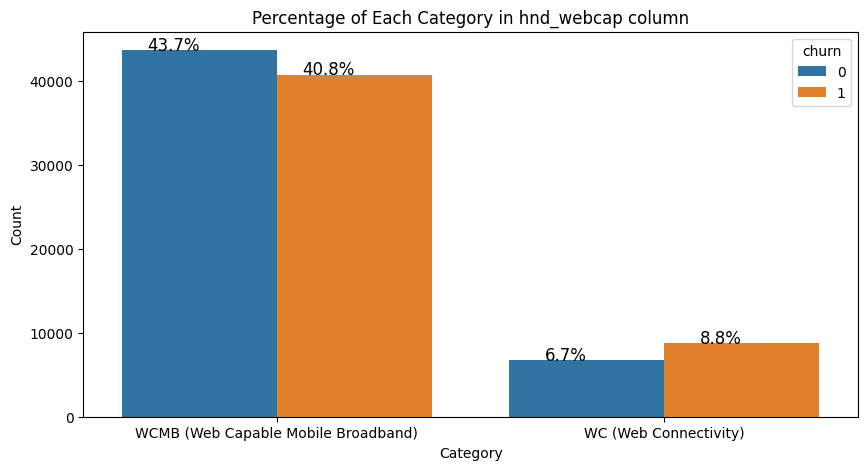

In [258]:
#count plot
plot_cont_category_col('hnd_webcap',10,5,['Web Capable Mobile Broadband','Web Connectivity'])

In [259]:
#map categories into 0 and 1
df['hnd_webcap'] = df['hnd_webcap'].replace({'WC': 0, 'WCMB': 1})

**12)infobase**

This coulmn represent that the columns in the dataset have been matched with an external infobase or database. In this case, an infobase is a collection of information about customers or any other entity, which can be used to enrich the dataset or provide additional features for analysis.
The process of matching records with records in an external infobase can help in:
Data enrichment: Adding more features or variables to the dataset, 
Data validation: Ensuring the accuracy and consistency of the data by comparing and cross-referencing it with the external infobase.
Data cleaning: Identifying and correcting any errors or inconsistencies in the data by comparing it with the external infobase.
When the columns in the telecom dataset represent an "infobase match," it means that these columns have been created or updated based on the information found in the external infobase.

In [260]:
#check the missing values , count of each category and unique values in the column
chck_miss_value_category_col('infobase')

unique values in column infobase : ['M' nan 'N']
Number of missing values in infobase: 22079
percentage of missing values in infobase: 22.079
count of each category in the column infobase :M    77697
N      224
Name: infobase, dtype: int64
percentage of each category in the column infobase :M    77.697
N     0.224
Name: infobase, dtype: float64


'M': "Matched" - This could mean that the customer's information is available in an external database and can be matched with the existing records. Additional demographic or behavioral information about the customer might be available for analysis.

'N': "Not Matched" - This could mean that the customer's information is not available in the external database or cannot be matched with existing records. In this case, there might be limited or no additional information about the customer available for analysis.

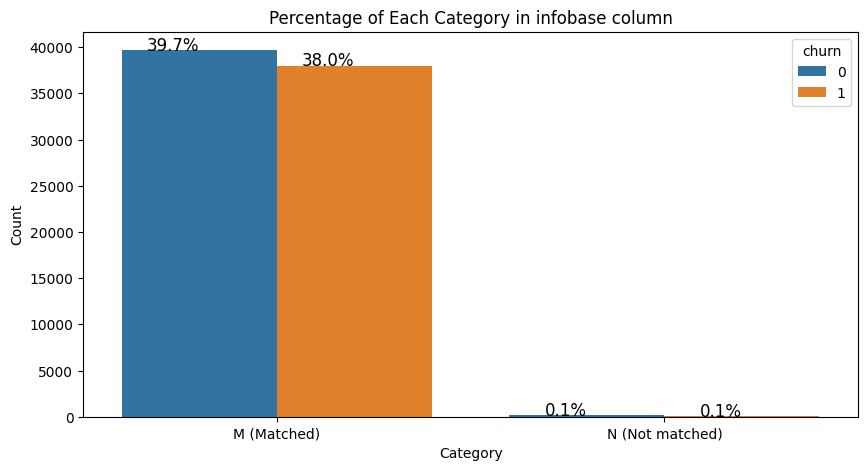

In [261]:
#count plot of the column
plot_cont_category_col('infobase',10,5,['Matched','Not matched'])

22 percentage of information is missing in the dataset.So let's fill it in the ratio of available categories.

In [262]:
# fill the missing values based on the ratio of two categories M and N
filling_missing_value_based_ratio_cat('infobase')

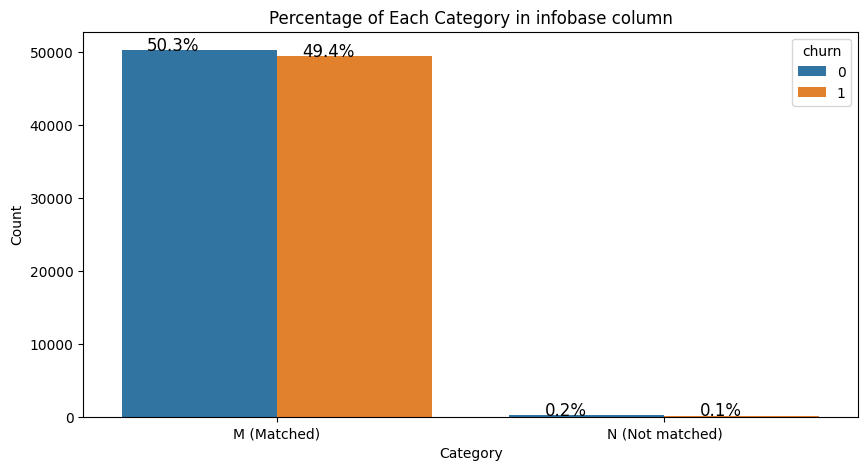

In [263]:
#count plot of the column
plot_cont_category_col('infobase',10,5,['Matched','Not matched'])

We can remove this column ,since 99.7 percentage of the values are same category,which means it wont contribute much information for prediction of output.

In [264]:
#drop the column
df.drop('infobase',axis=1,inplace=True)

**13)HHstatin**

The "hhstatin" column in a customer churn prediction dataset typically refers to the "Household Status Indicator." This column might contain information about the customer's household status, such as whether they are the head of the household, a spouse, a dependent, or another role within the household. This information can be useful in understanding the customer's demographic profile and predicting their likelihood to churn.

In [265]:
#check the missing values , count of each category and unique values in the column
chck_miss_value_category_col('HHstatin')

unique values in column HHstatin : ['C' 'I' nan 'B' 'A' 'G' 'H']
Number of missing values in HHstatin: 37923
percentage of missing values in HHstatin: 37.923
count of each category in the column HHstatin :C    39124
I    12352
A     4666
B     3246
G     1766
H      923
Name: HHstatin, dtype: int64
percentage of each category in the column HHstatin :C    39.124
I    12.352
A     4.666
B     3.246
G     1.766
H     0.923
Name: HHstatin, dtype: float64


Different categories in HH statin column is given below.
- A: Head of Household
- B: Spouse
- C: Child/Dependent
- G: Parent/Parent-in-law
- H: Other Relative
- I: Non-relative

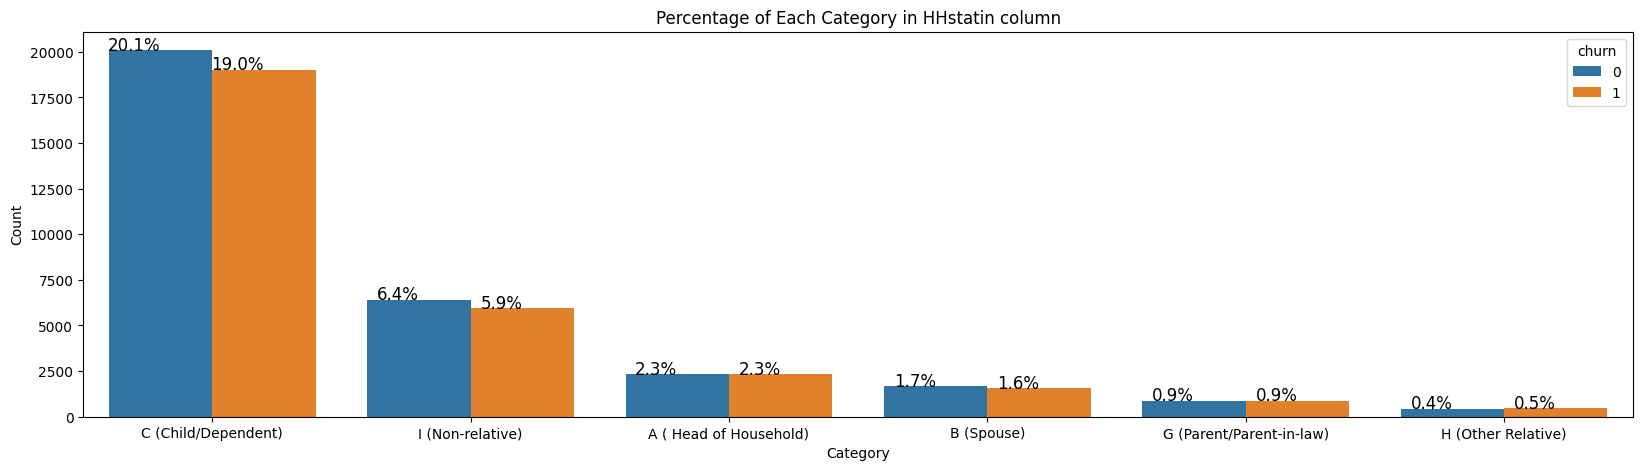

In [266]:
#plot the count of category
plot_cont_category_col('HHstatin',20,5,["Child/Dependent","Non-relative"," Head of Household","Spouse","Parent/Parent-in-law","Other Relative"])

In [267]:
#fill the missing values
# fill the missing values based on the ratio of two categories M and N
filling_missing_value_based_ratio_cat('HHstatin')

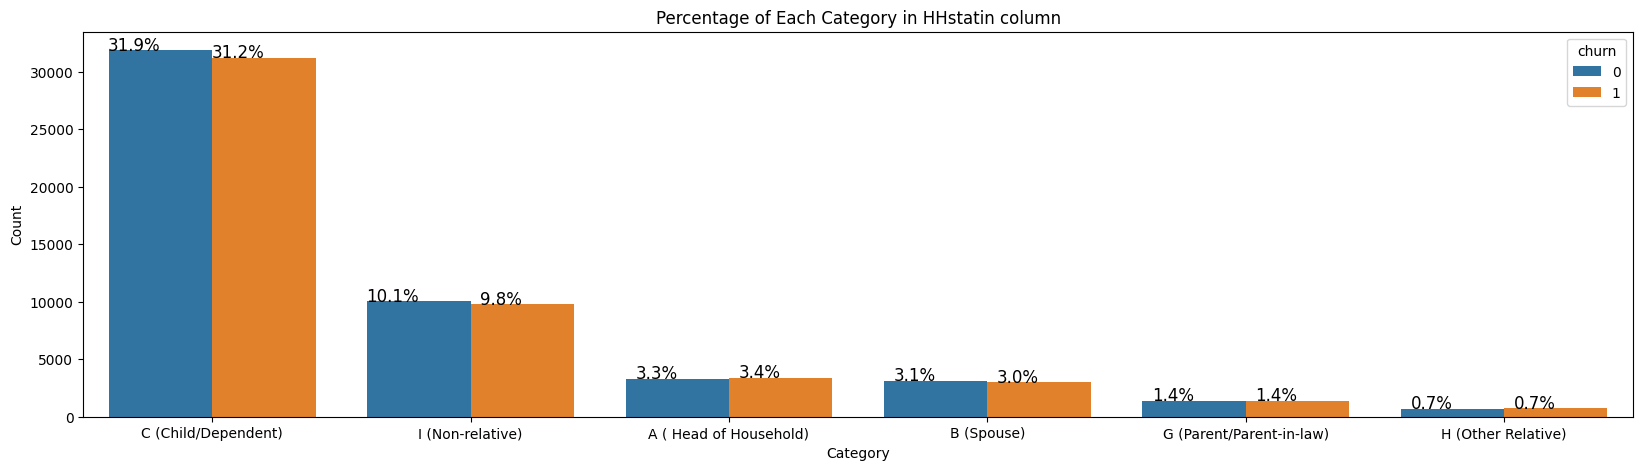

In [268]:
#plot the count of category
plot_cont_category_col('HHstatin',20,5,["Child/Dependent","Non-relative"," Head of Household","Spouse","Parent/Parent-in-law","Other Relative"])

**14)dwllsize**

dwelling size indicate the size of the customer's residence. The size of a residence might be represented by the number of rooms, square footage, or another relevant metric.
Dwelling size can be used as a feature to help predict customer churn because it can be correlated with other customer attributes or behaviors. For example:
Customers living in larger residences might have higher income levels and be more likely to afford premium services or additional features, making them less likely to churn.
Dwelling size can also be related to family size, which could influence the number of devices or the amount of data usage, ultimately impacting churn probability.
The type and size of a dwelling could be associated with the customer's lifestyle or preferences, which might have an impact on their satisfaction with the telecom service.
It is essential to note that the relationship between dwelling size and customer churn might not be straightforward and can vary depending on other factors. Including dwelling size as a feature in a churn prediction model helps capture additional information about customers and can potentially improve the model's accuracy when combined with other relevant features.

In [269]:
#check the missing values , count of each category and unique values in the column
chck_miss_value_category_col('dwllsize')

unique values in column dwllsize : ['A' 'D' 'O' nan 'E' 'J' 'C' 'B' 'I' 'N' 'K' 'L' 'G' 'H' 'M' 'F']
Number of missing values in dwllsize: 38308
percentage of missing values in dwllsize: 38.308
count of each category in the column dwllsize :A    47205
B     5205
C     1497
J     1430
O     1172
N     1000
D      747
K      661
E      543
L      512
F      410
M      375
G      365
H      302
I      268
Name: dwllsize, dtype: int64
percentage of each category in the column dwllsize :A    47.205
B     5.205
C     1.497
J     1.430
O     1.172
N     1.000
D     0.747
K     0.661
E     0.543
L     0.512
F     0.410
M     0.375
G     0.365
H     0.302
I     0.268
Name: dwllsize, dtype: float64


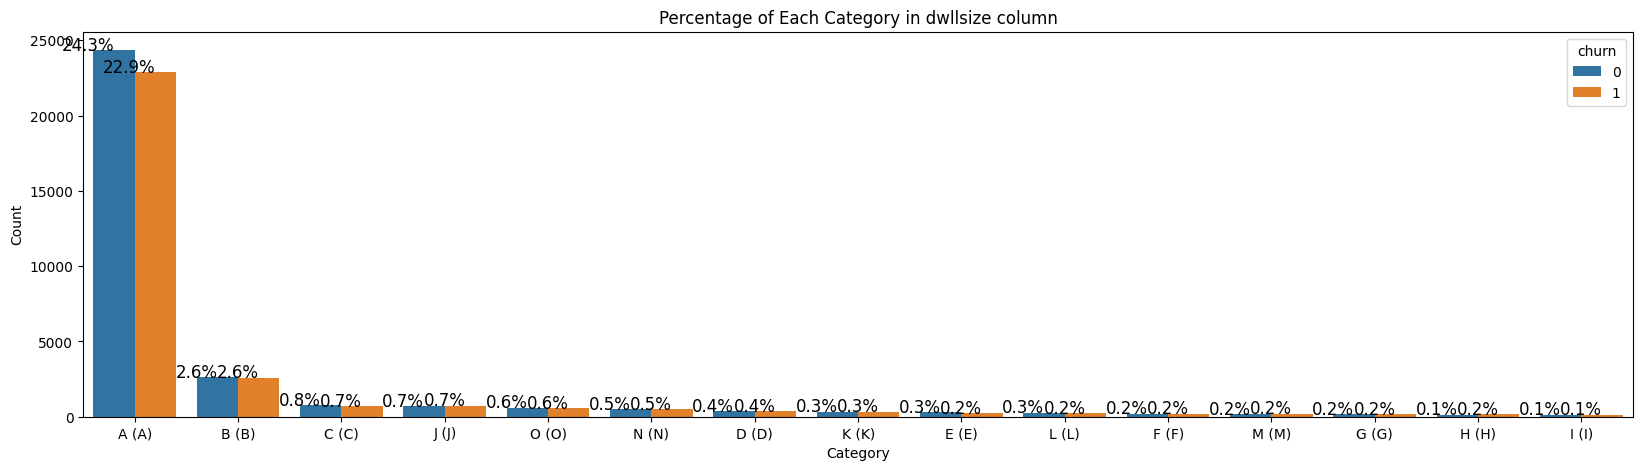

In [270]:
#countplot
plot_cont_category_col('dwllsize',20,5,['A' ,'B' ,'C' ,'J', 'O','N','D', 'K', 'E','L', 'F' ,'M', 'G', 'H', 'I'])

In [271]:
# fill the missing values based on the ratio of other categories
filling_missing_value_based_ratio_cat('dwllsize')

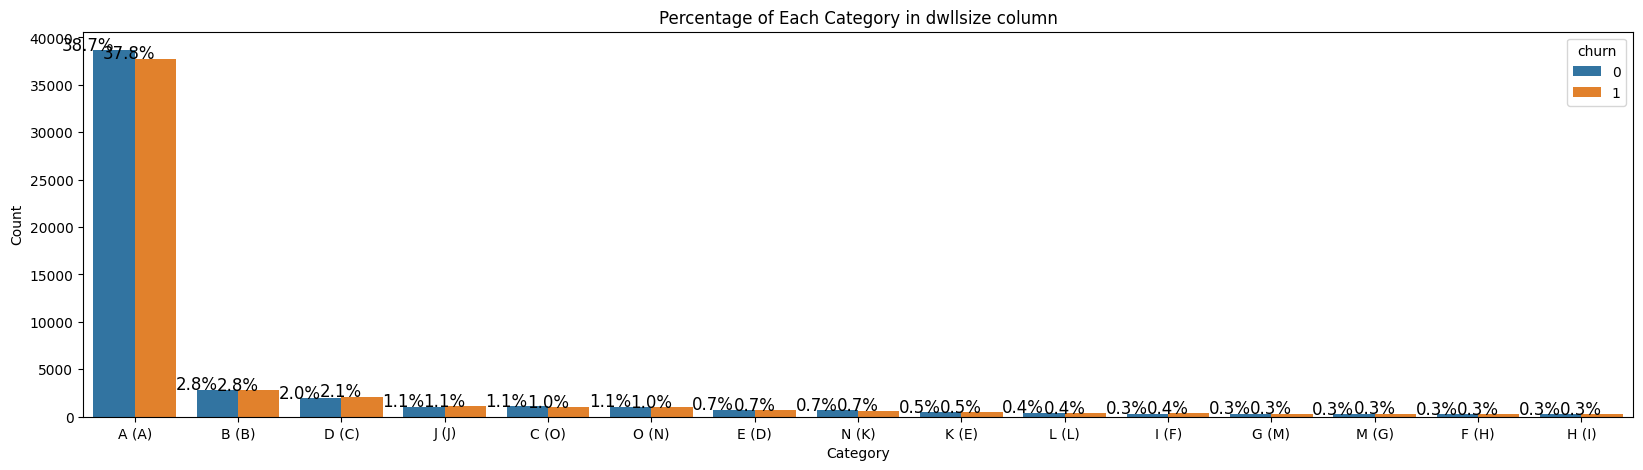

In [272]:
#countplot
plot_cont_category_col('dwllsize',20,5,['A' ,'B' ,'C' ,'J', 'O','N','D', 'K', 'E','L', 'F' ,'M', 'G', 'H', 'I'])

**15)new_cell**

"new_cell" column that indicates whether a customer is a new cell phone user.
the "new_cell" feature can be related to churn in the following ways:
Customers with new devices might be more satisfied with their telecom provider if they received a device upgrade or special offer, making them less likely to churn.
Conversely, if customers have recently switched to a new device and are experiencing technical issues or dissatisfaction with the device, they might be more likely to churn.
Customers who have recently purchased a new device could be locked into a contract, making it less likely for them to switch providers until the contract ends.
Using the "new_cell" feature in a churn prediction model can help capture additional information about customers' recent experiences and how those experiences might impact their likelihood to churn. As with any feature, it is essential to combine "new_cell" with other relevant features to create a robust and accurate churn prediction model.

In [273]:
#check the missing values , count of each category and unique values in the column
chck_miss_value_category_col('new_cell')

unique values in column new_cell : ['U' 'N' 'Y']
Number of missing values in new_cell: 0
percentage of missing values in new_cell: 0.0
count of each category in the column new_cell :U    66914
Y    19301
N    13785
Name: new_cell, dtype: int64
percentage of each category in the column new_cell :U    66.914
Y    19.301
N    13.785
Name: new_cell, dtype: float64


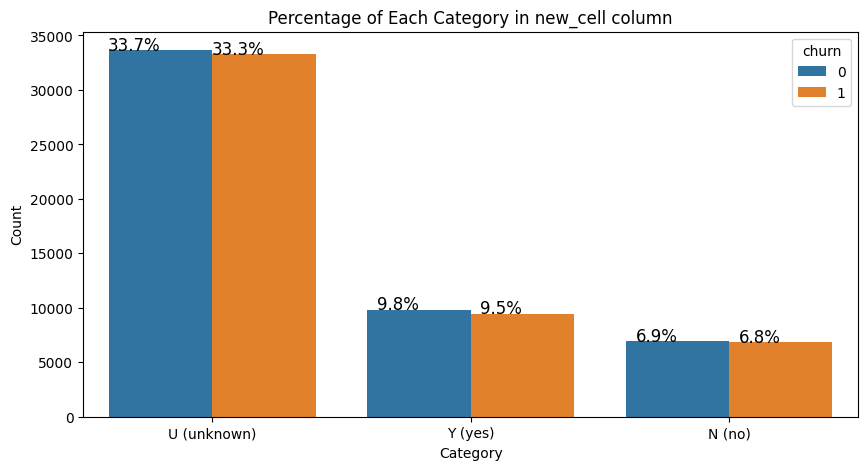

In [274]:
#count plot
plot_cont_category_col('new_cell',10,5,['unknown','yes','no'])

**16)crclscod**

The "circlcod" column in a telecom churn dataset might represent a code associated with the customer's geographical location or service area, such as a circle or region where the telecom provider offers services. These codes can be useful in understanding regional patterns in customer churn and analyzing the performance of different service areas.

The crclscod column in a telecom customer churn prediction dataset typically represents the "circle code" or "service area code" associated with the customer's service region. In a telecom network, the country is divided into various zones, known as circles or service areas, and each zone is assigned a unique code. This code helps the telecom company manage and track services, billing, and other customer-related information specific to each region. In the context of a churn prediction dataset, this information can be useful in understanding regional patterns or trends related to customer churn.

In [275]:
#check the unique values
chck_miss_value_category_col('crclscod')

unique values in column crclscod : ['A' 'EA' 'C' 'B' 'BA' 'D' 'G' 'CA' 'I' 'AA' 'J' 'U' 'Z' 'K' 'E' 'E4' 'W'
 'DA' 'Y' 'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'B2' 'IF' 'Z1' 'O' 'M' 'L'
 'U1' 'Z4' 'A2' 'V' 'TP' 'EM' 'C2' 'C5' 'S' 'EC' 'Z5' 'D2' 'GY' 'ZY' 'E2'
 'A3' 'V1' 'EF' 'Z2' 'CY' 'P1' 'ZF']
Number of missing values in crclscod: 0
percentage of missing values in crclscod: 0.0
count of each category in the column crclscod :AA    36509
A     16996
BA    12667
CA     8334
EA     6419
B      4110
DA     3669
ZA     3493
C      1456
A2      861
E4      833
U       480
E       339
D4      301
GA      281
Z4      253
D       247
I       243
G       241
JF      194
Z       191
J       190
CY      190
C2      180
M       169
ZY      119
D5      114
B2      109
K       106
W        97
C5       81
V1       70
U1       66
EM       57
Z5       56
Y        54
EC       48
GY       34
O        25
CC       25
E2       21
IF       14
Z1       12
H         9
L         6
P1        6
D2        5
TP        5


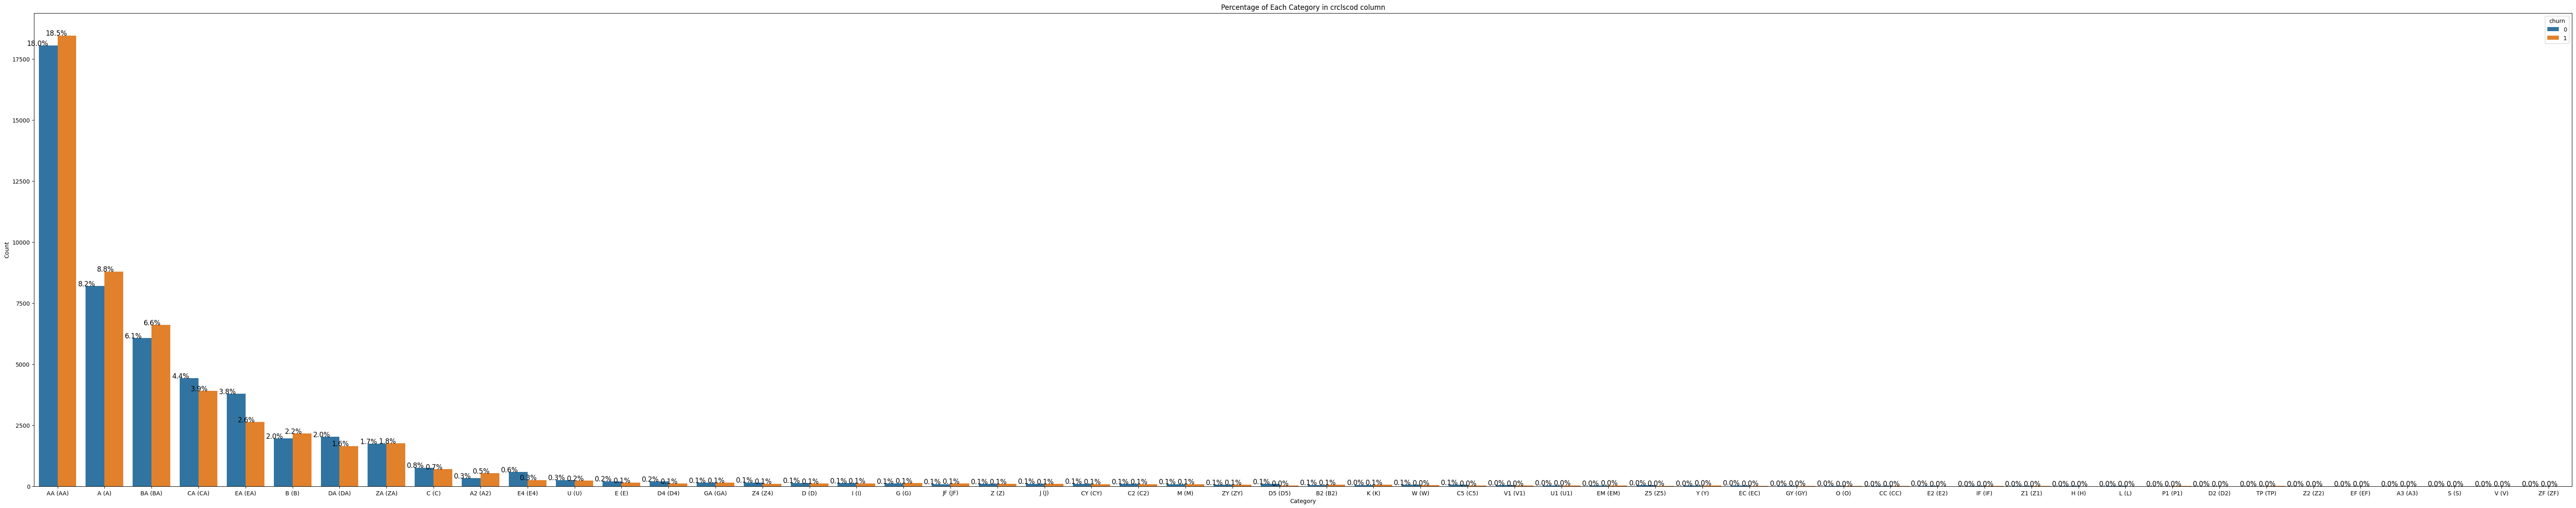

In [276]:
#count plot
plot_cont_category_col('crclscod',80,15,["AA", "A", "BA", "CA", "EA", "B", "DA", "ZA", "C", "A2", "E4", "U", 
                                         "E", "D4", "GA", "Z4", "D", "I", "G", "JF", "Z", "J", "CY",
                                         "C2", "M", "ZY", "D5", "B2", "K", "W", "C5", "V1", "U1", "EM", "Z5", 
                                         "Y", "EC", "GY", "O", "CC", "E2", "IF", "Z1", "H", "L", "P1", "D2", "TP", 
                                         "Z2", "EF", "A3", "S", "V", "ZF"])

To generalize and regroup the circle codes in the telecom churn prediction dataset, you can follow these steps:

Analyze the frequency of each circle code to identify the most common ones.
Based on the frequency analysis, decide on the number of groups we want to create.
Assign each circle code to one of the groups based on the similarity of their frequency in the dataset.
Create a dictionary that maps the original circle codes to the new group codes.
Replace the original circle codes in the dataset with the new group codes using the dictionary.

we can regroup these circlecodes based on the frequency of customers in each cell

In [277]:
categories = {
    'AA': 36509, 'A': 16996, 'BA': 12667, 'CA': 8334, 'EA': 6419, 'B': 4110, 'DA': 3669, 'ZA': 3493, 'C': 1456, 'A2': 861,
    'E4': 833, 'U': 480, 'E': 339, 'D4': 301, 'GA': 281, 'Z4': 253, 'D': 247, 'I': 243, 'G': 241, 'JF': 194, 'Z': 191,
    'J': 190, 'CY': 190, 'C2': 180, 'M': 169, 'ZY': 119, 'D5': 114, 'B2': 109, 'K': 106, 'W': 97, 'C5': 81, 'V1': 70,
    'U1': 66, 'EM': 57, 'Z5': 56, 'Y': 54, 'EC': 48, 'GY': 34, 'O': 25, 'CC': 25, 'E2': 21, 'IF': 14, 'Z1': 12, 'H': 9,
    'L': 6, 'P1': 6, 'D2': 5, 'TP': 5, 'Z2': 5, 'EF': 4, 'A3': 3, 'S': 1, 'V': 1, 'ZF': 1
}

sorted_categories = dict(sorted(categories.items(), key=lambda item: item[1], reverse=True))


In [278]:
#grouping based on frequency
group_a = ['AA', 'A', 'BA', 'CA']
group_b = ['EA', 'B', 'DA', 'ZA']
group_c = ['C', 'A2', 'E4', 'U', 'E', 'D4', 'GA', 'Z4', 'D', 'I', 'G', 'JF', 'Z', 'J', 'CY', 'C2', 'M']
group_d = list(set(sorted_categories.keys()) - set(group_a) - set(group_b) - set(group_c))

# Create the mapping dictionary
circle_code_mapping = {code: 'A' for code in group_a}
circle_code_mapping.update({code: 'B' for code in group_b})
circle_code_mapping.update({code: 'C' for code in group_c})
circle_code_mapping.update({code: 'D' for code in group_d})


In [279]:
# Replace the original circle codes with the new group codes
df['crclscod'] = df['crclscod'].map(circle_code_mapping)


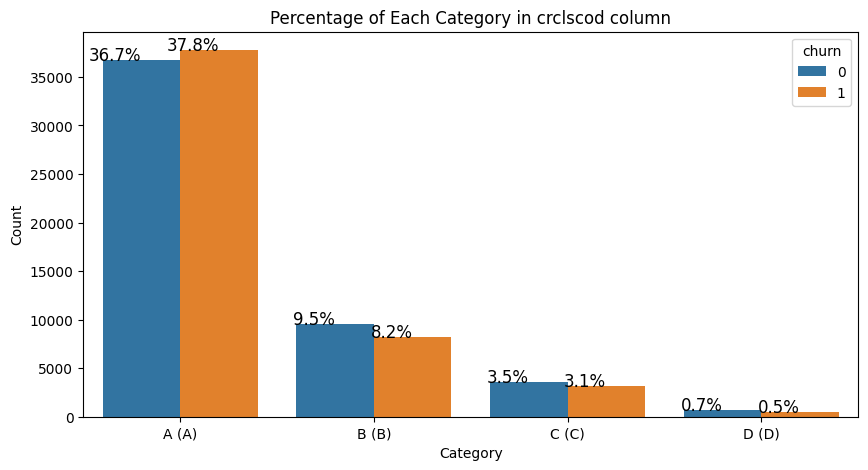

In [280]:
#count plot
plot_cont_category_col('crclscod',10,5,['A','B','C','D'])

**17)asl_flag**

asl_flag represents "account spending limit",which is  the maximum amount a customer is allowed to spend on their telecom services within a given billing period. This spending limit can be set by the telecom provider based on various factors, such as the customer's credit history, payment patterns, or the type of plan they have.
The account spending limit can be a useful feature in predicting customer churn for several reasons:
- Customers with lower spending limits may be more price-sensitive and could be more likely to churn if they perceive better offers or lower prices from competitors.
- If a customer's usage frequently exceeds their spending limit, they may experience service restrictions, additional fees, or other inconveniences, which could lead to dissatisfaction and a higher likelihood of churn.
- A higher spending limit could be associated with customers who have a longer history with the telecom provider or a better credit standing, which might indicate greater loyalty and a lower likelihood of churn.
- Incorporating the account spending limit feature in a churn prediction model can help capture information about customers' financial constraints and their satisfaction with their current plans. Combining this feature with other relevant data, such as usage patterns, demographic information, and customer service interactions, can help create a more accurate and robust churn prediction model.

In [281]:
#check the unique values
chck_miss_value_category_col('asl_flag')

unique values in column asl_flag : ['N' 'Y']
Number of missing values in asl_flag: 0
percentage of missing values in asl_flag: 0.0
count of each category in the column asl_flag :N    86064
Y    13936
Name: asl_flag, dtype: int64
percentage of each category in the column asl_flag :N    86.064
Y    13.936
Name: asl_flag, dtype: float64


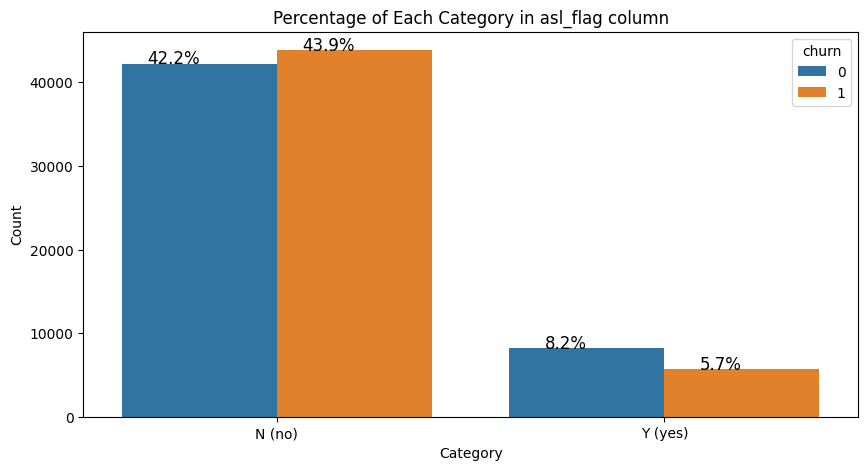

In [282]:
plot_cont_category_col('asl_flag',10,5,['no','yes'])

In [283]:
#map the categories to 0 and 1
df['asl_flag'] = df['asl_flag'].replace({'N': 0, 'Y': 1})

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 86 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          100000 non-null  float64
 1   mou_Mean          100000 non-null  float64
 2   totmrc_Mean       100000 non-null  float64
 3   da_Mean           100000 non-null  float64
 4   ovrmou_Mean       100000 non-null  float64
 5   ovrrev_Mean       100000 non-null  float64
 6   vceovr_Mean       100000 non-null  float64
 7   datovr_Mean       100000 non-null  float64
 8   roam_Mean         100000 non-null  float64
 9   change_mou        100000 non-null  float64
 10  change_rev        100000 non-null  float64
 11  drop_vce_Mean     100000 non-null  float64
 12  blck_vce_Mean     100000 non-null  float64
 13  unan_vce_Mean     100000 non-null  float64
 14  plcd_vce_Mean     100000 non-null  float64
 15  plcd_dat_Mean     100000 non-null  float64
 16  recv_vce_Mean     100

In [285]:
#save the cleaned data frame into a new csv file 'new_churn_dataset'
df.to_csv('cleaned_data_output.csv')

### **Conclusion**<a name="conclusion"></a>

Data cleaning is important to ensure that the data used for analysis is accurate and relevant. It involves identifying and correcting errors and inconsistencies in the data. In the case of customer churn prediction in the telecom sector, accurate data can help companies understand the factors that contribute to customer churn and take appropriate measures to prevent it.

Exploratory data analysis is another important step in the data analysis process. It involves visualizing and summarizing data to gain insights into its underlying patterns and distributions. This can help companies identify key factors that contribute to customer churn and develop effective strategies to retain customers.

In some cases, missing values in columns can be predicted using KNN algorithm, taking into account related columns. Columns with too many missing values or too many similar values may be dropped, as they may not provide any meaningful information.

Overall, data cleaning and exploratory data analysis play a critical role in customer churn prediction in the telecom sector. By using these techniques effectively, companies can gain valuable insights into customer behavior and take steps to improve their services and reduce customer churn.

### **References**<a name="ref"></a>
https://environicsanalytics.com/docs/default-source/us---data-product-support-documents/claritas-prizm-premier-segment-narratives-ea.pdf